<a href="https://colab.research.google.com/github/VenkataSairamMandapati/Model-Interpretability/blob/main/Venkats_Model_Interpretability_Marketting_Campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##Name : Venkata Sairam Mandapati

##NUID : 002768738



# Model Interpretability Marketting Campaign

Interpret your models.

1. Fit a linear model and interpret the regression coefficients

2. Fit a tree-based model and interpret the nodes

3.  Use auto ml to find the best model

4. Run SHAP analysis on the models from steps 1, 2, and 3,   interpret the SHAP values and compare them with the other model interpretability methods.





# Abstract

In this, they are three types of models—linear, tree-based, and an AutoML-driven model—to understand how they work in the context of a marketing campaign. We're not just stopping at predictions; we want to know why these models make the decisions they do.

First off, we're using a linear model, which is like breaking down the impact each factor has on the marketing results. It's like figuring out which aspects really make a difference and how much they matter.

Then, we jump into a tree-based model, kind of like tracing through a decision tree to see how the model thinks. Imagine following a flowchart where the model decides step by step what's important in the marketing data.

To make things a bit more automated, we're also using AutoML. This is like having a smart system pick the best model without us having to manually tweak everything. It's handy but makes the interpretation a bit more challenging.

Now, we're getting into the really interesting stuff—SHAP values. These values help us see which features (or factors) are pushing the model's predictions in a certain direction. It's like understanding the behind-the-scenes of the model's decision-making process.

Lastly, we're creating these cool plots called partial dependency plots. These are like snapshots showing how changing one thing, like a certain marketing strategy, affects the overall outcome according to the model.

We're doing all this to compare and contrast these different ways of understanding the models. It's like trying out different pairs of glasses to see which one gives us the clearest picture. By doing this, we hope to bring some clarity to how these models work in the real-world scenario of a marketing campaign. The results will not only help us understand the models better but also give some practical insights for making smarter marketing decisions.


## About Dataset - Marketing Campaign

Dataset Link - https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign

**Context**

The "Marketing Campaign" dataset serves the purpose of developing a response model to optimize marketing campaigns, specifically by predicting customer responses to offers for products or services. The dataset encompasses a range of features that capture diverse aspects of customer behavior and demographic information. Notably, binary indicators such as AcceptedCmp1 to AcceptedCmp5 signify whether a customer accepted offers in the corresponding marketing campaigns, with Response serving as the target variable for the final campaign. Additional features like Complain denote instances of customer complaints over the past two years, while DtCustomer provides the enrollment date of customers with the company.

Demographic information includes variables such as Education and Marital, detailing the customer's education level and marital status. Family dynamics are represented by Kidhome (number of small children in the household) and Teenhome (number of teenagers in the household), while Income reflects the customer's annual household income.

The dataset delves into the intricacies of customer purchase behavior, with variables such as MntFishProducts to MntGoldProds representing expenditures on various product categories over the last two years. Purchase patterns are further elucidated by features like NumDealsPurchases (number of discounted purchases), NumCatalogPurchases (number of purchases using a catalog), NumStorePurchases (number of direct in-store purchases), and NumWebPurchases (number of web-based purchases).

Web interactions are captured through NumWebVisitsMonth, indicating the number of visits to the company's website in the last month. The temporal aspect is addressed by Recency, which denotes the number of days since the customer's last purchase.

In summary, this dataset provides a comprehensive and multi-dimensional view of customer interactions, preferences, and characteristics. Its richness makes it valuable for developing predictive models that can inform targeted and effective marketing strategies based on historical campaign responses and customer attributes.

**Content**

1. AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
2. AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
3. AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
4. AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
5. AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
6. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
7. Complain - 1 if customer complained in the last 2 years
8. DtCustomer - date of customer’s enrolment with the company
9. Education - customer’s level of education
10. Marital - customer’s marital status
11. Kidhome - number of small children in customer’s household
12. Teenhome - number of teenagers in customer’s household
13. Income - customer’s yearly household income
14. MntFishProducts - amount spent on fish products in the last 2 years
15. MntMeatProducts - amount spent on meat products in the last 2 years
16. MntFruits - amount spent on fruits products in the last 2 years
17. MntSweetProducts - amount spent on sweet products in the last 2 years
18. MntWines - amount spent on wine products in the last 2 years
19. MntGoldProds - amount spent on gold products in the last 2 years
20. NumDealsPurchases - number of purchases made with discount
21. NumCatalogPurchases - number of purchases made using catalogue
22. NumStorePurchases - number of purchases made directly in stores
23. NumWebPurchases - number of purchases made through company’s web site
24. NumWebVisitsMonth - number of visits to company’s web site in the last month
25. Recency - number of days since the last purchase

In [128]:
!pip install h2o

In [129]:
!pip install graphviz

In [130]:
!pip install shap

In [131]:
#Importing required packages
import h2o
from h2o.automl import H2OAutoML
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.ensemble import RandomForestRegressor
pd.options.display.max_columns = None

import h2o: Imports the h2o library, which is a tool for building machine learning models. It's particularly useful for distributed and scalable machine learning tasks.

from h2o.automl import H2OAutoML: Imports the H2OAutoML class from the h2o.automl module. This class is used for automating the machine learning model selection and training process.

import numpy as np: Imports the numpy library and aliases it as np. Numpy is widely used for numerical operations in Python.

import pandas as pd: Imports the pandas library and aliases it as pd. Pandas is a powerful data manipulation library, and it's commonly used for working with tabular data.

import seaborn as sns: Imports the seaborn library, which is used for statistical data visualization. It provides a high-level interface for creating informative and attractive statistical graphics.

import matplotlib.pylab as plt: Imports the matplotlib.pylab module and aliases it as plt. Matplotlib is a popular plotting library in Python.

from sklearn.ensemble import RandomForestRegressor: Imports the RandomForestRegressor class from the sklearn.ensemble module. This is part of the scikit-learn library and is used for building random forest models, which are an ensemble of decision trees for regression tasks.

pd.options.display.max_columns = None: This line sets a Pandas option to display all columns when printing a DataFrame. By setting it to None, it allows you to see all the columns in a DataFrame without truncation

In [132]:
data = pd.read_csv("https://raw.githubusercontent.com/VenkataSairamMandapati/ML-Data-Cleaning-and-Feature-Selection/main/MARKETING_CAMPAIGN.csv", sep=";")
data.drop(columns = ["Z_CostContact","Z_Revenue","ID",],inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

# EDA Data Cleaning and feature engineering


In [133]:

data.head()

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0        1957  Graduation         Single  58138.0        0         0   
1        1954  Graduation         Single  46344.0        1         1   
2        1965  Graduation       Together  71613.0        0         0   
3        1984  Graduation       Together  26646.0        1         0   
4        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0             0             0             0             0         0         1  
1             0             0             0             0         0         0  
2             0             0             0             0         0         0  
3             0             0             0             0         0         0  
4             0             0             0             0         0         0

In [134]:
data['Income'].fillna(data.groupby('Education')['Income'].transform('mean'), inplace = True)
data['Year_Birth'] = data['Year_Birth'].apply(lambda x: 2020-x)
data = data.rename(columns={'Year_Birth': 'Age'})

Education_map = {'Basic':1,
            'Graduation':2,
            'Master':3,
            '2n Cycle':3,
            'PhD':4}
# Create the mapped values in a new column
data['Education'] = data['Education'].map(Education_map)

from datetime import datetime
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%Y-%m-%d')
data['Dt_Customer'] = (datetime(2020,1,1) - data['Dt_Customer']).dt.days

data['Children'] = data['Kidhome'] + data['Teenhome']
data.drop(columns = ["Kidhome","Teenhome"],inplace = True)

data['AmountSpent'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']
data.drop(columns = ["MntWines",	"MntFruits"	,"MntMeatProducts",	"MntFishProducts","MntSweetProducts",	"MntGoldProds"],inplace = True)

data['NumPurchased'] = data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases']
data.drop(columns = ["NumWebPurchases",	"NumCatalogPurchases",	"NumStorePurchases"],inplace = True)

data['Prev_campaigns'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5']
data.drop(columns = ["AcceptedCmp3",	"AcceptedCmp4",	"AcceptedCmp5",	"AcceptedCmp1",	"AcceptedCmp2"],inplace = True)

maratial_map = {'Married':"Couple",
            'Together':"Couple",
            'Single':'Single',
            'Divorced':'Single',
            'Widow':'Single',
            'Alone':'Single',
            'Absurd':'Single',
            'YOLO':'Single'}
# Create the mapped values in a new column
data['Marital_Status'] = data['Marital_Status'].map(maratial_map)

dummy_status = pd.get_dummies(data['Marital_Status'], prefix='Marital_Status')

data = pd.concat([data, dummy_status], axis=1)
data.drop(['Marital_Status'], axis=1, inplace=True)
data.drop(['Marital_Status_Single'], axis=1, inplace=True)


data.head()

Age  Education   Income  Dt_Customer  Recency  NumDealsPurchases  \
0   63          2  58138.0         2675       58                  3   
1   66          2  46344.0         2125       38                  2   
2   55          2  71613.0         2324       26                  1   
3   36          2  26646.0         2151       26                  2   
4   39          4  58293.0         2173       94                  5   

   NumWebVisitsMonth  Complain  Response  Children  AmountSpent  NumPurchased  \
0                  7         0         1         0         1617            22   
1                  5         0         0         2           27             4   
2                  4         0         0         0          776            20   
3                  6         0         0         1           53             6   
4                  5         0         0         1          422            14   

   Prev_campaigns  Marital_Status_Couple  
0               0                      0  
1               0                      0  
2               0                      1  
3               0                      1  
4               0                      1

This code is transforming and cleaning a dataset for better analysis. It first fills missing values in the 'Income' column by replacing them with the mean income based on education levels. Then, it calculates the age from the birth year, renames the column to 'Age', and converts the 'Dt_Customer' column to the number of days since the customer joined. Education levels are mapped to numerical values, and marital status is simplified into two categories: 'Couple' and 'Single'. The code also creates dummy variables for the simplified marital status, dropping one redundant column. Finally, the dataset is restructured by combining and dropping columns related to purchases and campaign acceptances for better clarity.

In [135]:
data.Income.quantile(0.99)

94437.68000000001

In [136]:
data.drop(data[data['Income'] >= 94437].index, inplace = True)


In [137]:
data.isnull().sum()


Age                      0
Education                0
Income                   0
Dt_Customer              0
Recency                  0
NumDealsPurchases        0
NumWebVisitsMonth        0
Complain                 0
Response                 0
Children                 0
AmountSpent              0
NumPurchased             0
Prev_campaigns           0
Marital_Status_Couple    0
dtype: int64

<Axes: >

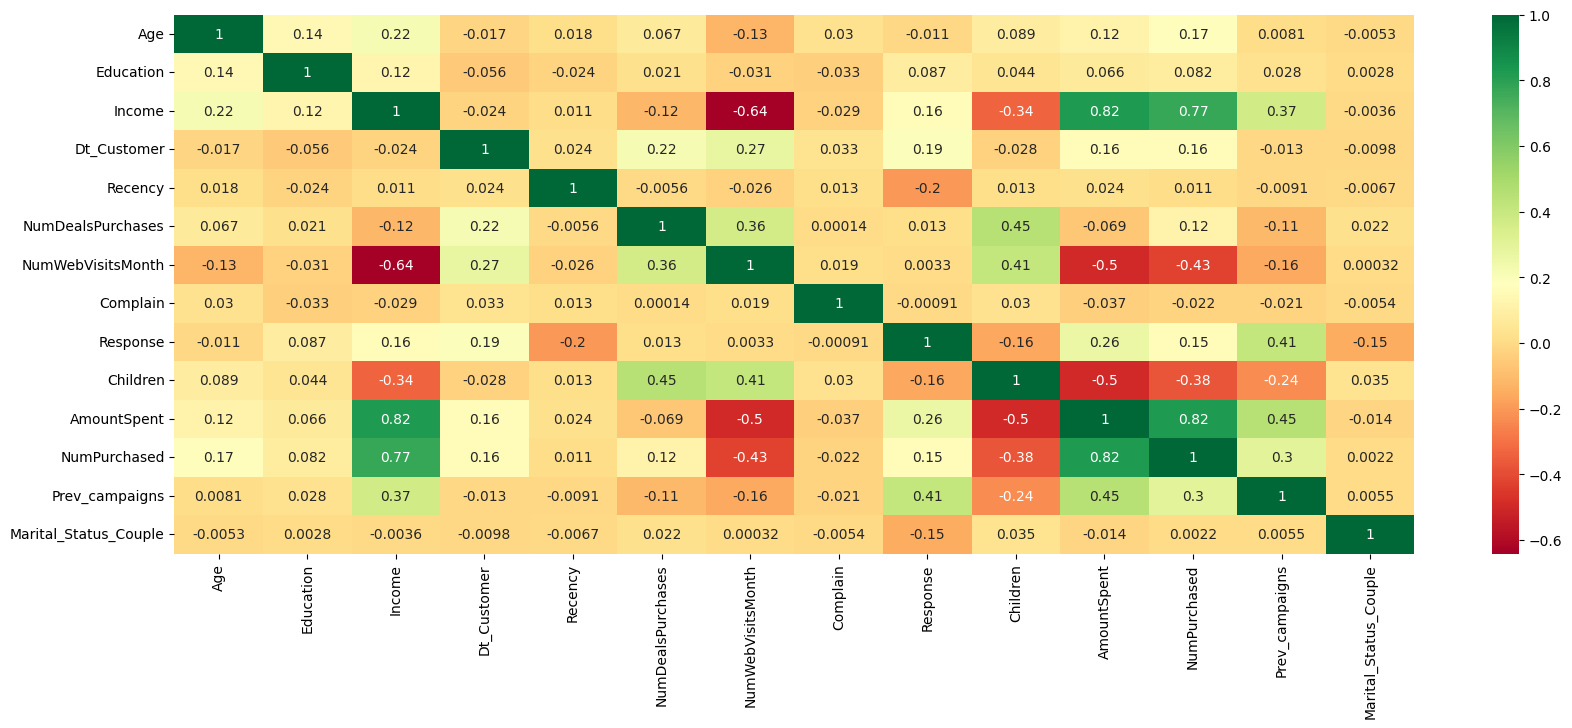

In [138]:
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')

# Logistic Regression ( Linear model )

In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

In [140]:
y=data['Response']#specify the dependent variable and independent variable
x=data.drop(['Response'],axis=1)
x.head()

Age  Education   Income  Dt_Customer  Recency  NumDealsPurchases  \
0   63          2  58138.0         2675       58                  3   
1   66          2  46344.0         2125       38                  2   
2   55          2  71613.0         2324       26                  1   
3   36          2  26646.0         2151       26                  2   
4   39          4  58293.0         2173       94                  5   

   NumWebVisitsMonth  Complain  Children  AmountSpent  NumPurchased  \
0                  7         0         0         1617            22   
1                  5         0         2           27             4   
2                  4         0         0          776            20   
3                  6         0         1           53             6   
4                  5         0         1          422            14   

   Prev_campaigns  Marital_Status_Couple  
0               0                      0  
1               0                      0  
2               0                      1  
3               0                      1  
4               0                      1

In [141]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)#divide the train ,test group
x_train.head()

Age  Education   Income  Dt_Customer  Recency  NumDealsPurchases  \
192   120          3  36640.0         2288       99                  1   
1112   47          4  54466.0         2152       78                  1   
494    76          4  55614.0         2226       85                  1   
2092   44          2  71322.0         2070       31                  1   
146    45          2  23957.0         2621       47                  1   

      NumWebVisitsMonth  Complain  Children  AmountSpent  NumPurchased  \
192                   5         1         1           65             5   
1112                  5         0         2           16             3   
494                   7         0         0          682            19   
2092                  2         0         1          350            12   
146                   6         0         1           68             5   

      Prev_campaigns  Marital_Status_Couple  
192                0                      0  
1112               0                      0  
494                1                      0  
2092               0                      1  
146                0                      1

In [142]:
logreg=LogisticRegression()
loggreg_final=logreg.fit(x_train,y_train)
print(loggreg_final.score(x_train,y_train))

0.8584320360970107


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [143]:
y_pred=logreg.predict(x_test)

cm=confusion_matrix(y_test, y_pred)#confusion matrix for the logistic model prediction
print(cm)

[[377   5]
 [ 49  13]]


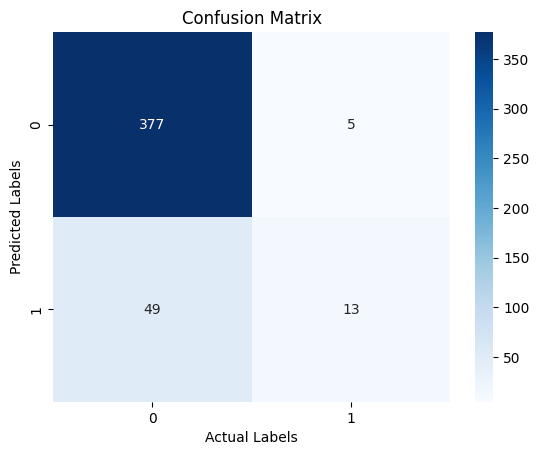

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.show()


In [145]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(data['Response'], data[["Age",	"Education",	"Income",	"Dt_Customer",
                                       "Recency"	,"NumDealsPurchases",	"NumWebVisitsMonth",
                                       "Complain",	"Children",	"AmountSpent"	,"NumPurchased",
                                       "Prev_campaigns",	"Marital_Status_Couple"]]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Response   R-squared (uncentered):                   0.386
Model:                            OLS   Adj. R-squared (uncentered):              0.382
Method:                 Least Squares   F-statistic:                              106.6
Date:                Mon, 04 Dec 2023   Prob (F-statistic):                   3.50e-222
Time:                        03:10:31   Log-Likelihood:                         -473.21
No. Observations:                2217   AIC:                                      972.4
Df Residuals:                    2204   BIC:                                      1047.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Age                      -0.0009      0.001     -1.672      0.095      -0.002       0.000
Education                 0.0283      0.008      3.710      0.000       0.013       0.043
Income                -1.245e-06   6.66e-07     -1.870      0.062   -2.55e-06    6.05e-08
Dt_Customer               0.0001   1.92e-05      6.866      0.000    9.43e-05       0.000
Recency                  -0.0026      0.000    -11.710      0.000      -0.003      -0.002
NumDealsPurchases         0.0155      0.004      3.517      0.000       0.007       0.024
NumWebVisitsMonth         0.0047      0.004      1.175      0.240      -0.003       0.013
Complain                  0.0511      0.066      0.774      0.439      -0.078       0.181
Children                 -0.0428      0.012     -3.584      0.000      -0.066      -0.019
AmountSpent               0.0001   2.45e-05      5.335      0.000    8.26e-05       0.000
NumPurchased             -0.0065      0.002     -3.591      0.000      -0.010      -0.003
Prev_campaigns            0.1945      0.011     17.454      0.000       0.173       0.216
Marital_Status_Couple    -0.1165      0.013     -8.768      0.000      -0.143      -0.090
==============================================================================
Omnibus:                      537.661   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1111.189
Skew:                           1.413   Prob(JB):                    5.11e-242
Kurtosis:                       5.011   Cond. No.                     5.72e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.72e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Interpretting the Regression Coefficients

The coefficients of the independent variables in the regression model represent the change in the dependent variable for a one-unit increase in the corresponding independent variable, holding all other independent variables constant.

1. The coefficient for "Age" is -0.0013. This means that for every one unit increase in age, the dependent variable (Response) is expected to decrease by 0.0013, holding all other variables constant.

2. The coefficient for "Education" is 0.0266. This means that for every one unit increase in education, the dependent variable is expected to increase by 0.0266, holding all other variables constant.

3. The coefficient for "Income" is -5.288e-07. This means that for every one unit increase in income, the dependent variable is expected to decrease by 5.288e-07, holding all other variables constant. However, the p-value associated with this coefficient is 0.149, which is greater than the commonly used threshold of 0.05, indicating that this coefficient may not be statistically significant.

4. The coefficient for "Complain" is 0.0514, but the p-value associated with this coefficient is 0.438, which is greater than 0.05, indicating that this variable may not be statistically significant in the model.

5. The coefficients for "Recency", "Children", "AmountSpent", "NumPurchased", "Prev_campaigns", and "Marital_Status_Couple" all have p-values less than 0.05, indicating that they are statistically significant in the model.

It is important to note that the coefficients should be interpreted with caution, as the presence of multicollinearity or other numerical problems can affect their validity. Therefore, it is recommended to further investigate the model to ensure the robustness of the results.

The adjusted R-squared value is 0.391, which means that about 39.1% of the variability in the response variable can be explained by the independent variables in the model. The F-statistic is 111.8, and the p-value associated with it is very low (1.18e-231), which suggests that at least one of the independent variables is significantly related to the response variable.

The coefficients of the independent variables represent the amount of change in the dependent variable for a one-unit increase in the corresponding independent variable, holding all other independent variables constant. The p-value associated with each coefficient represents the statistical significance of that variable, i.e., whether or not the variable is significantly related to the response variable.

The model does not contain a constant, as indicated by the note [1], which means that the intercept is zero. The note [2] indicates that the standard errors assume that the covariance matrix of the errors is correctly specified.

The large condition number (6.03e+05) mentioned in note [3] suggests that there may be strong multicollinearity or other numerical problems in the model. This should be further investigated to ensure the validity of the results.

Overall, the model appears to be a good fit for the data, but further analysis is needed to assess the robustness of the results.



# Decision Tree (Tree based model)


Accuracy Score: 0.8490990990990991
Confusion Matrix:
[[347  35]
 [ 32  30]]

Decision Tree:



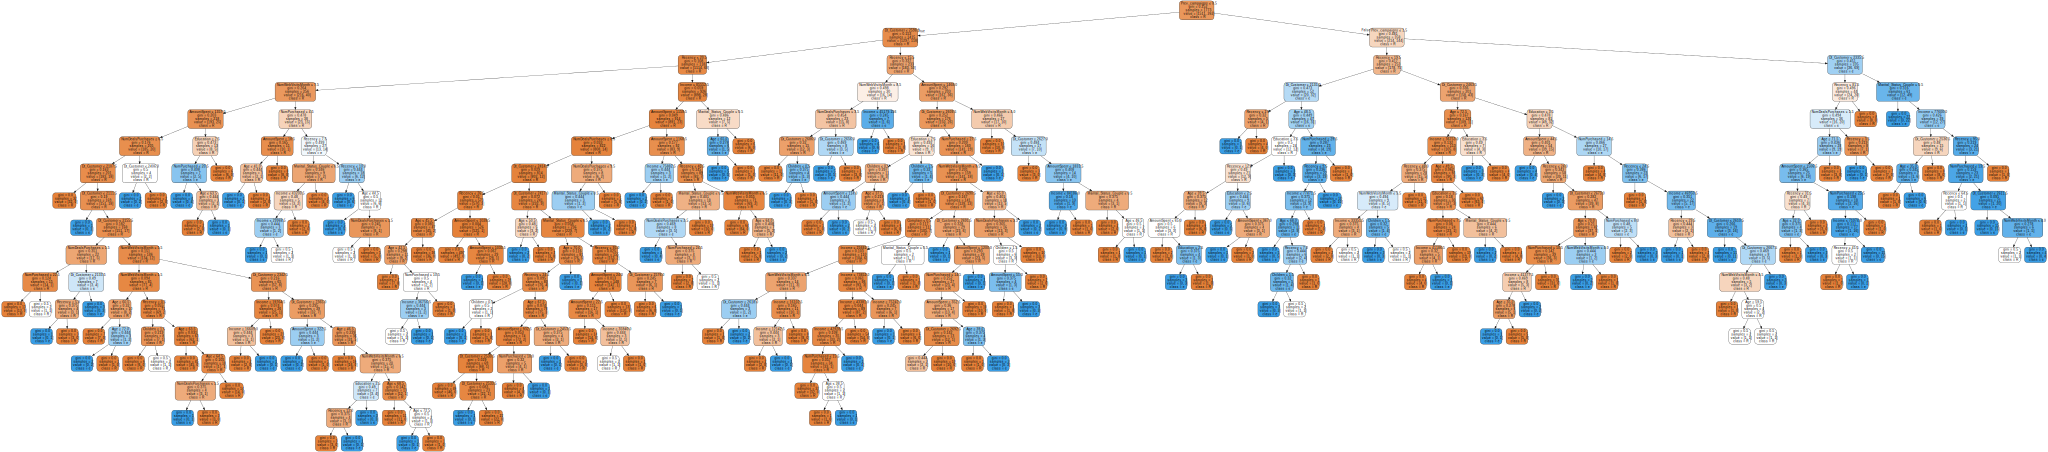

In [146]:
# Import required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import graphviz

# Create a decision tree classifier
dtc = DecisionTreeClassifier(random_state=42)

# Train the decision tree classifier on the training set
dtc.fit(x_train, y_train)

# Use the decision tree classifier to make predictions on the testing set
y_pred = dtc.predict(x_test)

# Calculate accuracy score and confusion matrix
acc_score = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)

# Print the accuracy score and confusion matrix
print("Accuracy Score: {}".format(acc_score))
print("Confusion Matrix:\n{}".format(conf_mat))

# Visualize the decision tree using graphviz
dot_data = export_graphviz(dtc, out_file=None, feature_names=x_train.columns, class_names=y_train.name, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("breast_cancer_decision_tree")

# Print the decision tree
print("\nDecision Tree:\n")
graph = graphviz.Source(dot_data)
graph


## Interpretting the tree

The Gini value, also referred to as the Gini index or Gini impurity, serves as a crucial metric in decision tree algorithms, particularly in the context of binary classification problems. Its primary function is to quantify the impurity or randomness within a dataset, aiding decision trees in determining the most effective splits during their construction.

The scale of the Gini value spans from 0 to 1, where 0 signifies absolute purity, indicating that all data within a subset belongs to the same class. On the other end, a Gini value of 1 implies perfect impurity, suggesting an even distribution of data across all classes within the subset. In the decision tree framework, the Gini value is computed for each potential split at every node, and the split that results in the lowest Gini value is deemed the optimal choice.

Given a binary classification problem, the decision tree model evaluates the Gini value for different parameter values and makes split decisions at each node based on this assessment. Consequently, the chosen splits aim to maximize the purity of the resulting subsets. It's worth noting that, in practical applications, the Gini value is often employed alongside other impurity measures like entropy. This combination enhances the decision tree's ability to construct more accurate and robust models by considering various aspects of impurity in the data.





In [147]:

# Get numerical feature importances
tree_importances = list(dtc.feature_importances_)
# List of tuples with variable and importance
feature_importances = [
    (feature, round(importance, 2))
    for feature, importance in zip(x_train.columns, tree_importances)
]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

In [148]:

# Print out the feature and importances
[print("Variable: {:20} Importance: {}".format(*pair)) for pair in feature_importances];

Variable: Prev_campaigns       Importance: 0.18
Variable: Dt_Customer          Importance: 0.16
Variable: Recency              Importance: 0.14
Variable: Age                  Importance: 0.11
Variable: Income               Importance: 0.07
Variable: AmountSpent          Importance: 0.07
Variable: Education            Importance: 0.05
Variable: NumWebVisitsMonth    Importance: 0.05
Variable: NumPurchased         Importance: 0.05
Variable: NumDealsPurchases    Importance: 0.04
Variable: Marital_Status_Couple Importance: 0.04
Variable: Children             Importance: 0.02
Variable: Complain             Importance: 0.0


## Interpretting variable importance

Understanding which features matter the most in predicting customer responses is key. In your case, "Prev_campaign" (past campaign interactions), "Dt_Customer" (customer tenure), "Recency" (recent interactions), and "Income" are crucial. This means that how customers engaged in previous campaigns, how long they've been customers, how recently they interacted, and their income levels strongly impact predictions.

The similarity to a linear model means that these features show a straightforward relationship with predictions. Whether you're looking at a linear model or other methods, these specific features consistently stand out as significant factors influencing customer responses in your marketing efforts.

# Auto ML

In [149]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         44 mins 03 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.2
H2O_cluster_version_age:    25 days
H2O_cluster_name:           H2O_from_python_unknownUser_69t6re
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.065 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [150]:
df = h2o.H2OFrame(data)
df["Response"] = df["Response"].asfactor()
df.describe(chunk_summary=True)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Rows:2217
Cols:14

Chunk compression summary: 
chunk_type    chunk_name                 count    count_percentage    size     size_percentage
------------  -------------------------  -------  ------------------  -------  -----------------
CBS           Binary                     2        14.2857             696  B   1.51627
CXI           Sparse Integers            1        7.14286             118  B   0.257069
C1N           1-Byte Integers (w/o NAs)  8        57.1429             17.9 KB  39.824
C2            2-Byte Integers            2        14.2857             8.8 KB   19.6157
C8D           64-bit Reals               1        7.14286             17.4 KB  38.787

Frame distribution summary: 
                 size     number_of_rows    number_of_chunks_per_column    number_of_chunks
---------------  -------  ----------------  -----------------------------  ------------------
127.0.0.1:54321  44.8 KB  2217              1                              14
mean             44.8 KB  2217              1                              14
min              44.8 KB  2217              1                              14
max              44.8 KB  2217              1                              14
stddev           0  B     0                 0                              0
total            44.8 KB  2217              1                              14

Age                Education           Income             Dt_Customer         Recency            NumDealsPurchases    NumWebVisitsMonth    Complain              Response    Children            AmountSpent        NumPurchased        Prev_campaigns      Marital_Status_Couple
-------  -----------------  ------------------  -----------------  ------------------  -----------------  -------------------  -------------------  --------------------  ----------  ------------------  -----------------  ------------------  ------------------  -----------------------
type     int                int                 real               int                 int                int                  int                  int                   enum        int                 int                int                 int                 int
mins     24.0               1.0                 1730.0             2012.0              0.0                0.0                  0.0                  0.0                               0.0                 5.0                0.0                 0.0                 0.0
mean     51.22688317546235  2.663509246729812   51324.61926977652  2365.7640956247174  49.17230491655391  2.3306269733874645   5.350924672981507    0.009472259810554804              0.9566982408660358  599.4686513306268  12.479025710419483  0.2873252142534956  0.645466847090663
maxs     127.0              4.0                 94384.0            2711.0              99.0               15.0                 20.0                 1.0                               3.0                 2525.0             32.0                4.0                 1.0
sigma    11.97328701228253  0.8387549593273527  20292.10655022477  202.14067556410893  28.9367711331267   1.8943973099903892   2.4079610557561093   0.09688534513058857               0.7504039318767902  597.240110870126   7.151067007037491   0.6615994453195736  0.478479532763035
zeros    0                  0                   0                  0                   28                 33                   7                    2196                              621                 0                  4                   1768                786
missing  0                  0                   0                  0                   0                  0                    0                    0                     0           0                   0                  0                   0                   0
0        63.0               2.0                 58138.0            2675.0              58.0               3.0                  7.0                  0.0                   1           0.0                 1617.0             22.0                0.0                 0.0
1        66.0               2.0                 46344.0            2125.0              38.0               2.0                  5.0                  0.0                   0           2.0                 27.0               4.0                 0.0                 0.0
2        55.0               2.0                 71613.0            2324.0              26.0               1.0                  4.0                  0.0                   0           0.0                 776.0              20.0                0.0                 1.0
3        36.0               2.0                 26646.0            2151.0              26.0               2.0                  6.0                  0.0                   0           1.0                 53.0               6.0                 0.0                 1.0
4        39.0               4.0                 58293.0            2173.0              94.0               5.0                  5.0                  0.0                   0           1.0                 422.0              14.0                0.0                 1.0
5        53.0               3.0                 62513.0            2305.0              16.0               2.0                  6.0                  0.0                   0           1.0                 716.0              20.0          

In [151]:
train, test, valid = df.split_frame(ratios=[0.7, 0.20], seed=1)

In [152]:
aml = H2OAutoML(max_models=10, balance_classes=True, seed=1)
aml.train(training_frame = train, y = 'Response')

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_4_20231204_31038


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  6/10
# GBM base models (used / total)      2/4
# XGBoost base models (used / total)  1/3
# GLM base models (used / total)      1/1
# DRF base models (used / total)      2/2
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.0460692813498527
RMSE: 0.2146375581063405
LogLoss: 0.16404128262327522
AUC: 0.974344662341994
AUCPR: 0.8722528768712855
Gini: 0.948689324683988
Null degrees of freedom: 1570
Residual degrees of freedom: 1564
Null deviance: 1261.675495959801
Residual deviance: 515.4177100023309
AIC: 529.4177100023309

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3088777067906401
       0     1    Error    Rate
-----  ----  ---  -------  -------------
0      1291  63   0.0465   (63.0/1354.0)
1      31    186  0.1429   (31.0/217.0)
Total  1322  249  0.0598   (94.0/1571.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.308878     0.798283  162
max f2                       0.264366     0.849957  182
max f0point5                 0.544487     0.817958  95
max accuracy                 0.41299      0.943348  133
max precision                0.989679     1         0
max recall                   0.0583682    1         307
max specificity              0.989679     1         0
max absolute_mcc             0.308878     0.76584   162
max min_per_class_accuracy   0.238883     0.917051  193
max mean_per_class_accuracy  0.206053     0.921671  206
max tns                      0.989679     1354      0
max fns                      0.989679     216       0
max fps                      0.0011407    1354      399
max tps                      0.0583682    217       307
max tnr                      0.989679     1         0
max fnr                      0.989679     0.995392  0
max fpr                      0.0011407    1         399
max tpr                      0.0583682    1         307

Gains/Lift Table: Avg response rate: 13.81 %, avg score: 14.86 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0101846                   0.914216           7.23963   7.23963            1                0.943821    1                           0.943821            0.0737327       0.0737327                  623.963   623.963            0.0737327
2        0.0203692                   0.867174           7.23963   7.23963            1                0.895715    1                           0.919768            0.0737327       0.147465                   623.963   623.963            0.147465
3        0.0305538                   0.835551           6.33468   6.93798            0.875            0.850498    0.958333                    0.896678            0.0645161       0.211982                   533.468   593.798            0.210504
4        0.0401018                   0.778607           7.23963   7.0098             1                0.813263    0.968254               

In [153]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id                                                     auc    logloss     aucpr    mean_per_class_error      rmse        mse
------------------------------------------------------  --------  ---------  --------  ----------------------  --------  ---------
StackedEnsemble_AllModels_1_AutoML_4_20231204_31038     0.879897   0.269337  0.585103                0.24402   0.284864  0.0811477
StackedEnsemble_BestOfFamily_1_AutoML_4_20231204_31038  0.878508   0.268376  0.600673                0.244109  0.28338   0.0803043
GBM_1_AutoML_4_20231204_31038                           0.876255   0.279631  0.588247                0.239058  0.291458  0.0849477
GLM_1_AutoML_4_20231204_31038                           0.864508   0.278946  0.572324                0.259691  0.288404  0.0831768
XGBoost_1_AutoML_4_20231204_31038                       0.855429   0.356506  0.491077                0.236519  0.333849  0.111455
XGBoost_2_AutoML_4_20231204_31038                       0.85386    0.346047  0.500034                0.254567  0.324642  0.105393
GBM_4_AutoML_4_20231204_31038                           0.851371   0.326174  0.511226                0.241939  0.311144  0.0968107
GBM_3_AutoML_4_20231204_31038                           0.850508   0.325998  0.50065                 0.265511  0.313064  0.0980093
XGBoost_3_AutoML_4_20231204_31038                       0.846092   0.35253   0.477627                0.225871  0.327986  0.107575
DRF_1_AutoML_4_20231204_31038                           0.845818   0.613412  0.461983                0.27427   0.332156  0.110328
GBM_2_AutoML_4_20231204_31038                           0.843046   0.326117  0.478836                0.27427   0.312933  0.0979268
XRT_1_AutoML_4_20231204_31038                           0.830837   0.380727  0.427072                0.269885  0.332862  0.110797
[12 rows x 7 columns]

In [154]:
#Getting the best model
best_model = h2o.get_model(lb[0,"model_id"])
best_model.model_performance(test)

ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.0828610233241343
RMSE: 0.28785590722466387
LogLoss: 0.27103111183261314
AUC: 0.9102048417132217
AUCPR: 0.7200083807577168
Gini: 0.8204096834264434
Null degrees of freedom: 432
Residual degrees of freedom: 426
Null deviance: 403.3683590121891
Residual deviance: 234.712942847043
AIC: 248.712942847043

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.27024657037004823
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      323  35   0.0978   (35.0/358.0)
1      20   55   0.2667   (20.0/75.0)
Total  343  90   0.127    (55.0/433.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.270247     0.666667  85
max f2                       0.127829     0.757919  137
max f0point5                 0.499247     0.720165  39
max accuracy                 0.499247     0.891455  39
max precision                0.960445     1         0
max recall                   0.00541773   1         362
max specificity              0.960445     1         0
max absolute_mcc             0.195816     0.597865  106
max min_per_class_accuracy   0.195816     0.826667  106
max mean_per_class_accuracy  0.195816     0.844898  106
max tns                      0.960445     358       0
max fns                      0.960445     74        0
max fps                      0.000610768  358       399
max tps                      0.00541773   75        362
max tnr                      0.960445     1         0
max fnr                      0.960445     0.986667  0
max fpr                      0.000610768  1         399
max tpr                      0.00541773   1         362

Gains/Lift Table: Avg response rate: 17.32 %, avg score: 15.50 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0115473                   0.897396           5.77333   5.77333            1                0.928003    1                           0.928003            0.0666667       0.0666667                  477.333   477.333            0.0666667
2        0.0207852                   0.840852           4.33      5.13185            0.75             0.873913    0.888889                    0.903963            0.04            0.106667                   333       413.185            0.103873
3        0.0300231                   0.823736           5.77333   5.32923            1                0.830837    0.923077                    0.881463            0.0533333       0.16                       477.333   432.923            0.157207
4        0.0415704                   0.750271           4.61867   5.13185            0.8              0.777848    0.888889                    0.852681            0.0533333       0.213333                   361.867   413.185            0.207747
5        0.0508083                   0.676802           2.88667   4.72364            0.5              0.702173    0.818182                    0.825316            0.0266667       0.24                       188.667   372.364            0.228827
6        0.101617                    0.48874            4.46121   4.59242            0.772727         0.593034    0.795455                    0.709175            0.226667        0.466667                   346.121   359.242            0.441527
7        0.150115                    0.359456           2.47429   3.9081             0.428571         0.417816    0.676923                    0.615044       

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

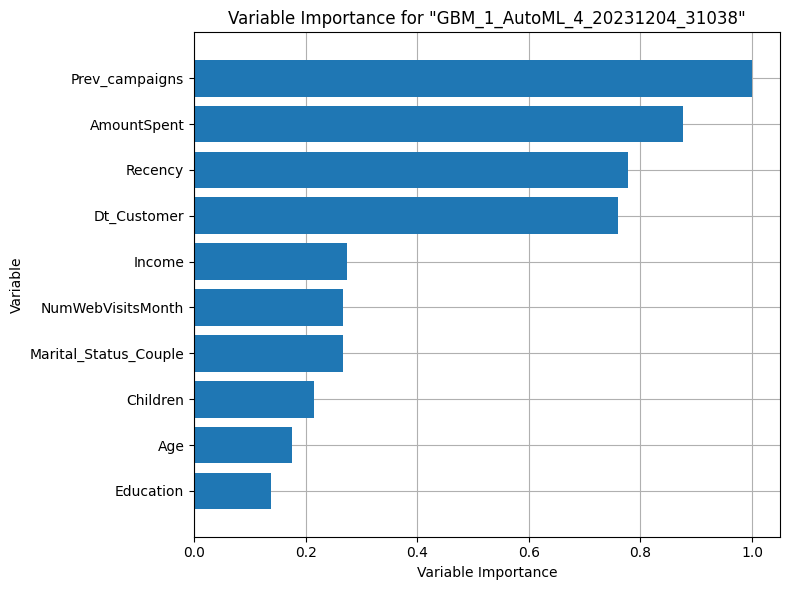

In [155]:
explain_model = aml.explain(frame = test, figsize = (8,6),include_explanations=['varimp'])


## Interpreting Variable Importance

The variable importance graph for the top-performing AutoML model reveals that "Prev_campaign" is the most critical feature, indicating that past campaign interactions significantly impact the model's predictions. Following closely in importance are "Amount spent" and "Dt_customer," emphasizing the substantial influence of customer spending behavior and the duration of their relationship with the company. Additionally, "Recency" is highlighted as another noteworthy feature, underscoring the importance of recent customer interactions in shaping the model's predictive outcomes. This prioritization of features provides valuable insights into the factors driving the model's performance and aids in understanding the key determinants of successful predictions.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

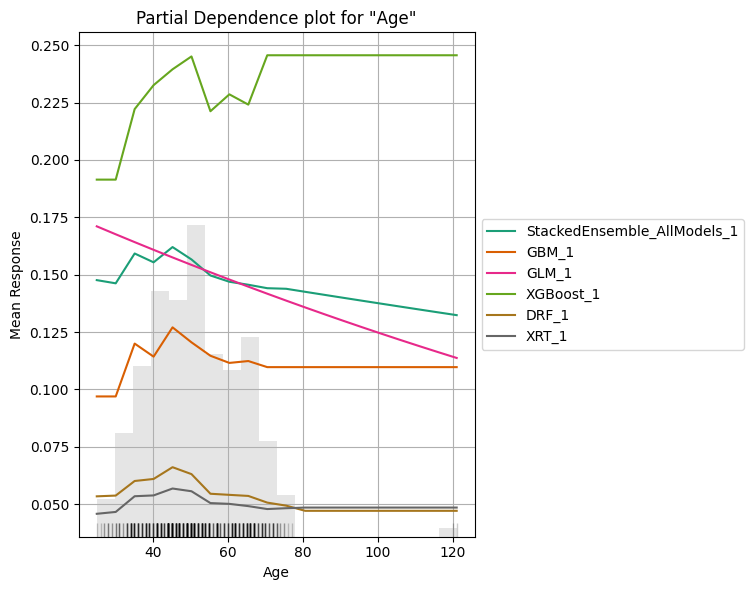

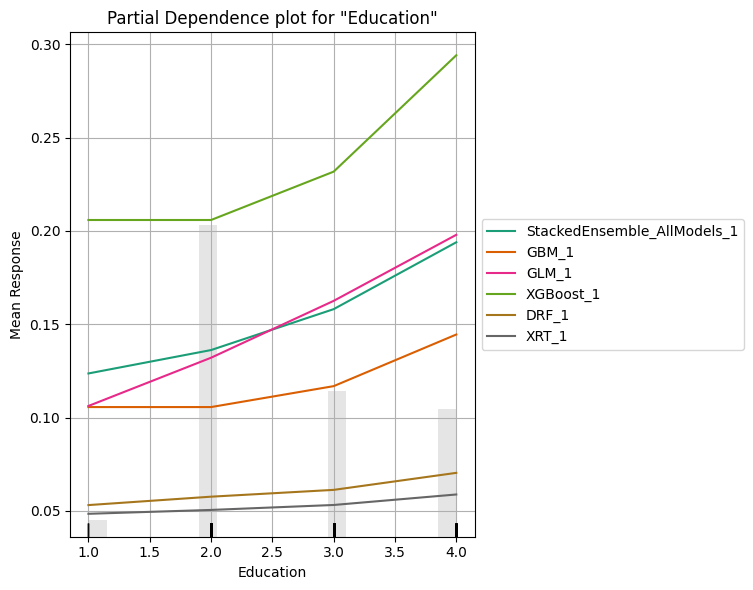

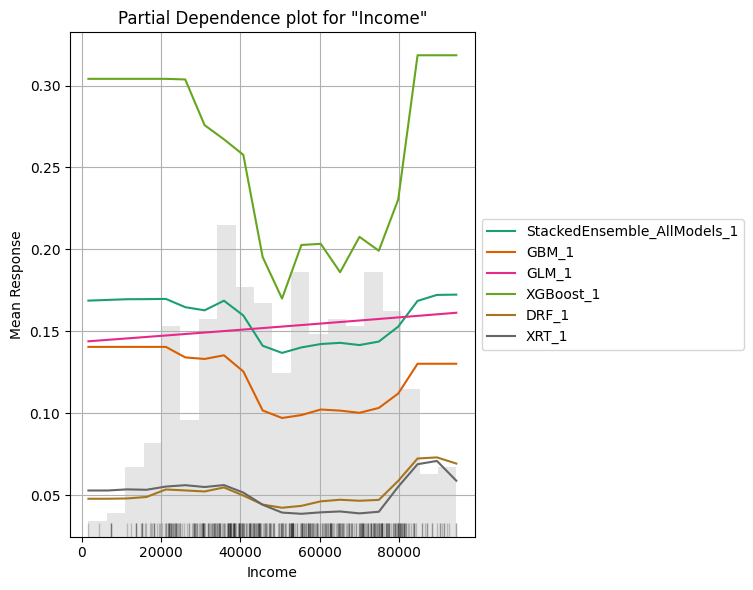

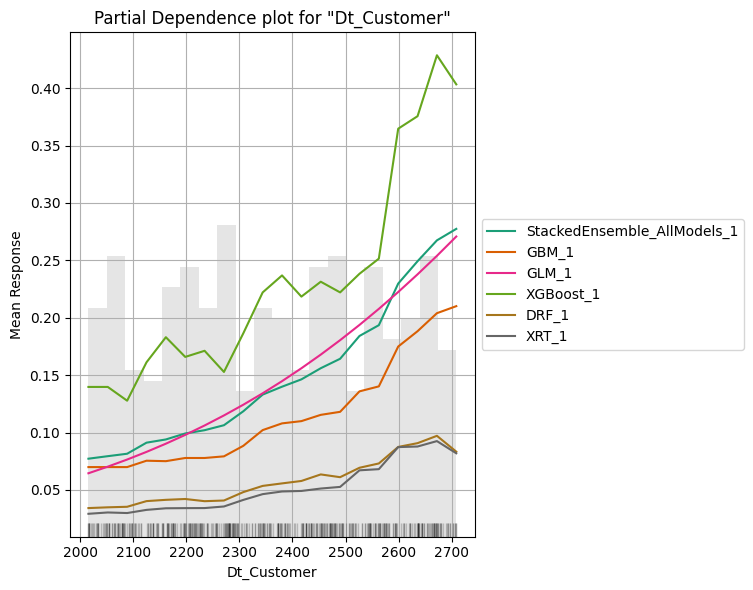

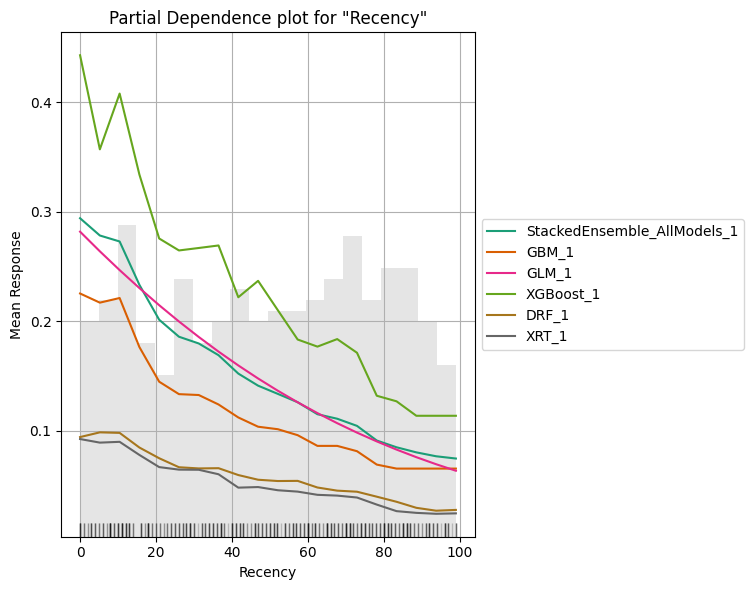

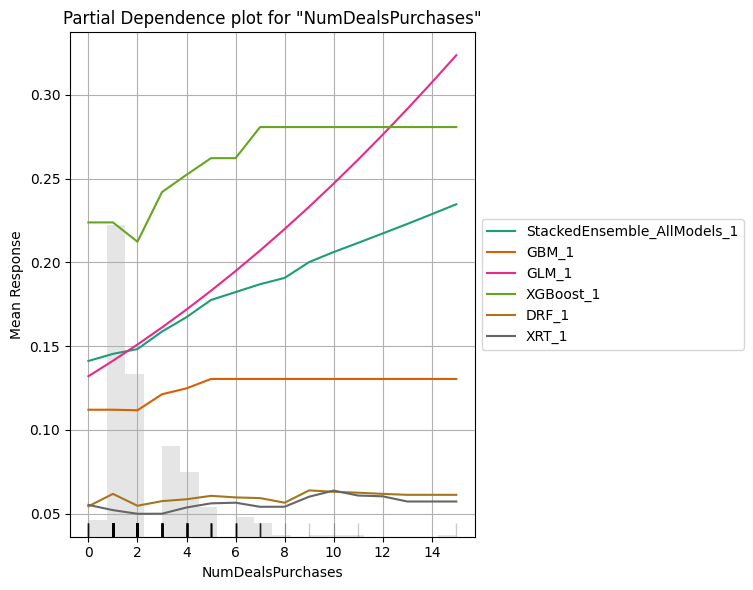

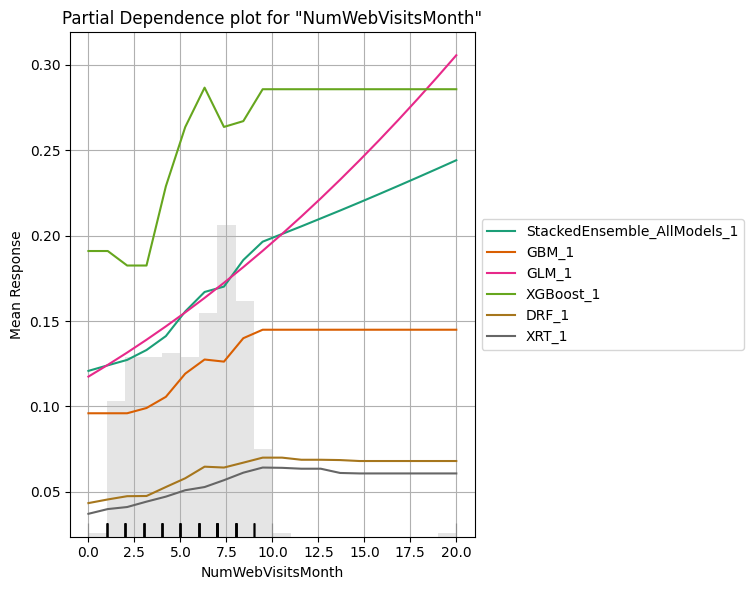

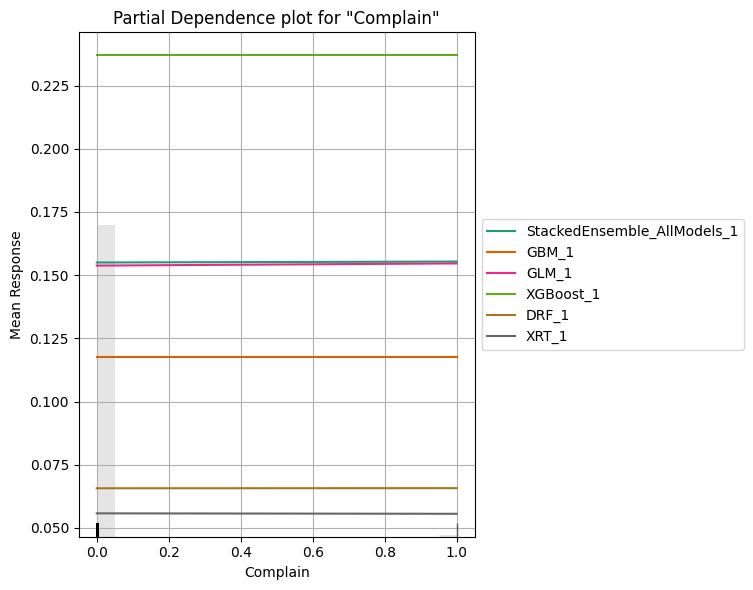

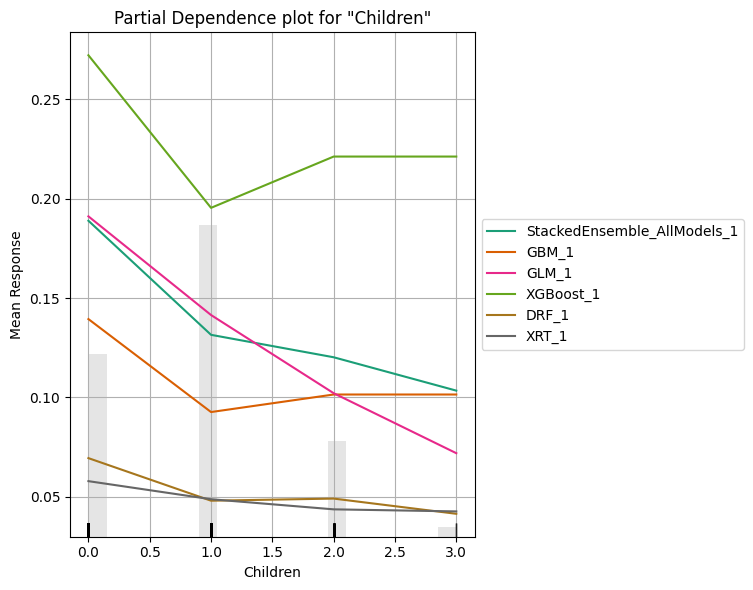

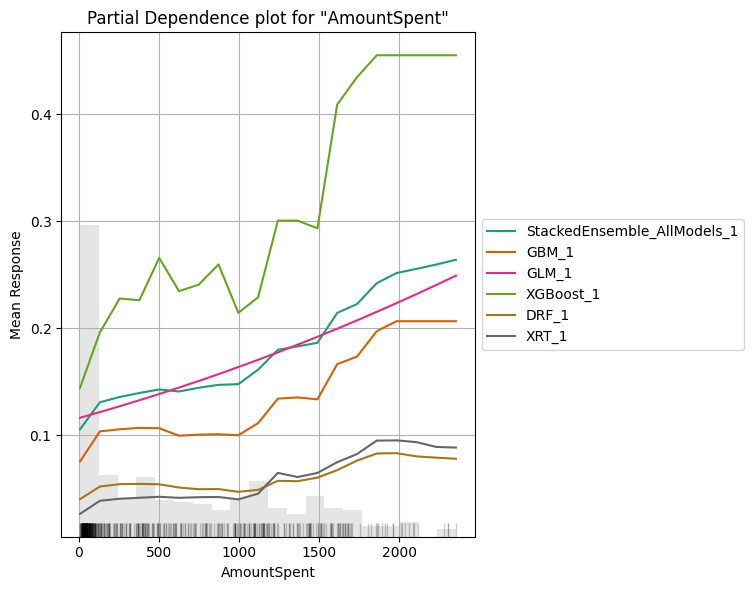

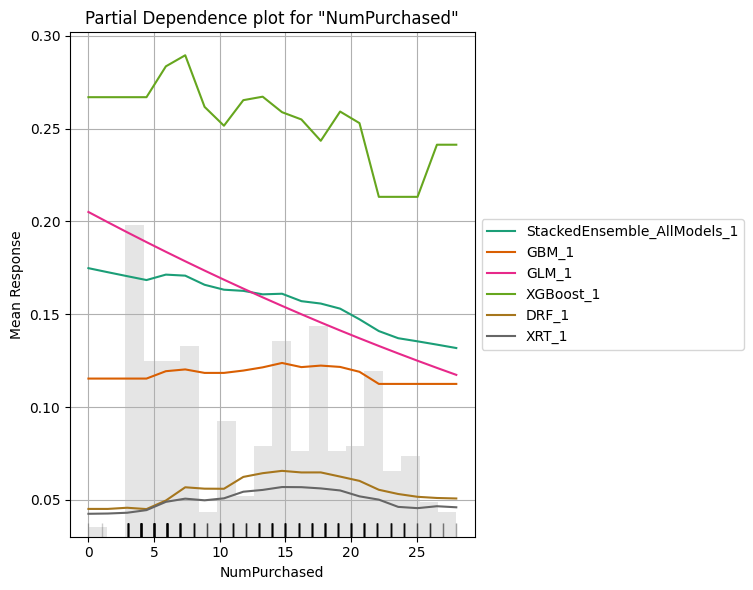

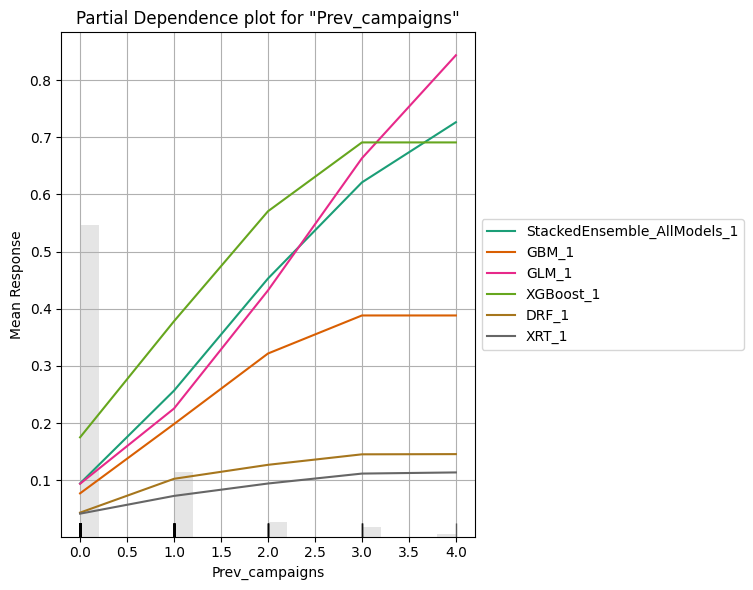

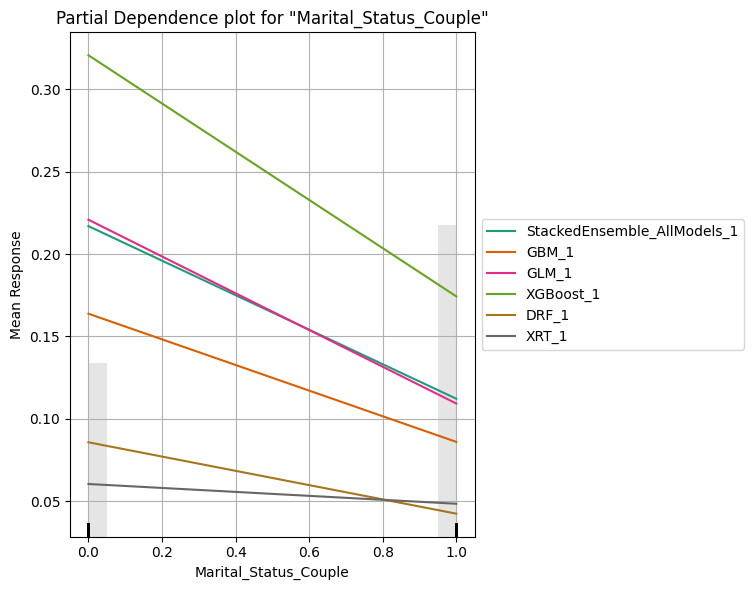

In [156]:
explain_model = aml.explain(frame = test, figsize = (8,6),include_explanations=['pdp'])


## Interpreting Partial Dependency Plots

The pdp shows us the effect of each feature on prediction.

Prev_campaign has a high linear dependency while compain has no effect on prediction

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                     auc    logloss     aucpr    mean_per_class_error      rmse        mse    training_time_ms    predict_time_per_row_ms  algo
------------------------------------------------------  --------  ---------  --------  ----------------------  --------  ---------  ------------------  -------------------------  ---------------
StackedEnsemble_AllModels_1_AutoML_4_20231204_31038     0.910205   0.271031  0.720008                0.182216  0.287856  0.082861                 6214                   0.182337  StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_4_20231204_31038  0.908603   0.272979  0.714242                0.171676  0.289075  0.0835642                3867                   0.109205  StackedEnsemble
GBM_1_AutoML_4_20231204_31038                           0.902663   0.299719  0.703613                0.171993  0.306862  0.0941643                 808                   0.038481  GBM
XGBoost_3_AutoML_4_20231204_31038                       0.895736   0.300717  0.713311                0.21352   0.309136  0.0955648                4005                   0.024125  XGBoost
XGBoost_2_AutoML_4_20231204_31038                       0.891564   0.304095  0.678097                0.23352   0.307672  0.0946619                2186                   0.030426  XGBoost
GLM_1_AutoML_4_20231204_31038                           0.890968   0.293114  0.677646                0.173389  0.299829  0.0898975                 228                   0.015667  GLM
XRT_1_AutoML_4_20231204_31038                           0.890112   0.484033  0.595323                0.171862  0.362471  0.131385                  631                   0.040179  DRF
GBM_2_AutoML_4_20231204_31038                           0.888976   0.341688  0.659381                0.232123  0.327601  0.107322                  413                   0.025953  GBM
XGBoost_1_AutoML_4_20231204_31038                       0.887654   0.340052  0.656748                0.207486  0.329434  0.108527                 2030                   0.022397  XGBoost
GBM_3_AutoML_4_20231204_31038                           0.887393   0.347594  0.670562                0.23568   0.329338  0.108463                  774                   0.02633   GBM
GBM_4_AutoML_4_20231204_31038                           0.887039   0.346832  0.691161                0.233203  0.324488  0.105292                  657                   0.026714  GBM
DRF_1_AutoML_4_20231204_31038                           0.886369   0.547174  0.618358                0.226089  0.353221  0.124765                 1092                   0.044403  DRF
[12 rows x 10 columns]

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_AllModels_1_AutoML_4_20231204_31038

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.27024657037004823
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      323  35   0.0978   (35.0/358.0)
1      20   55   0.2667   (20.0/75.0)
Total  343  90   0.127    (55.0/433.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

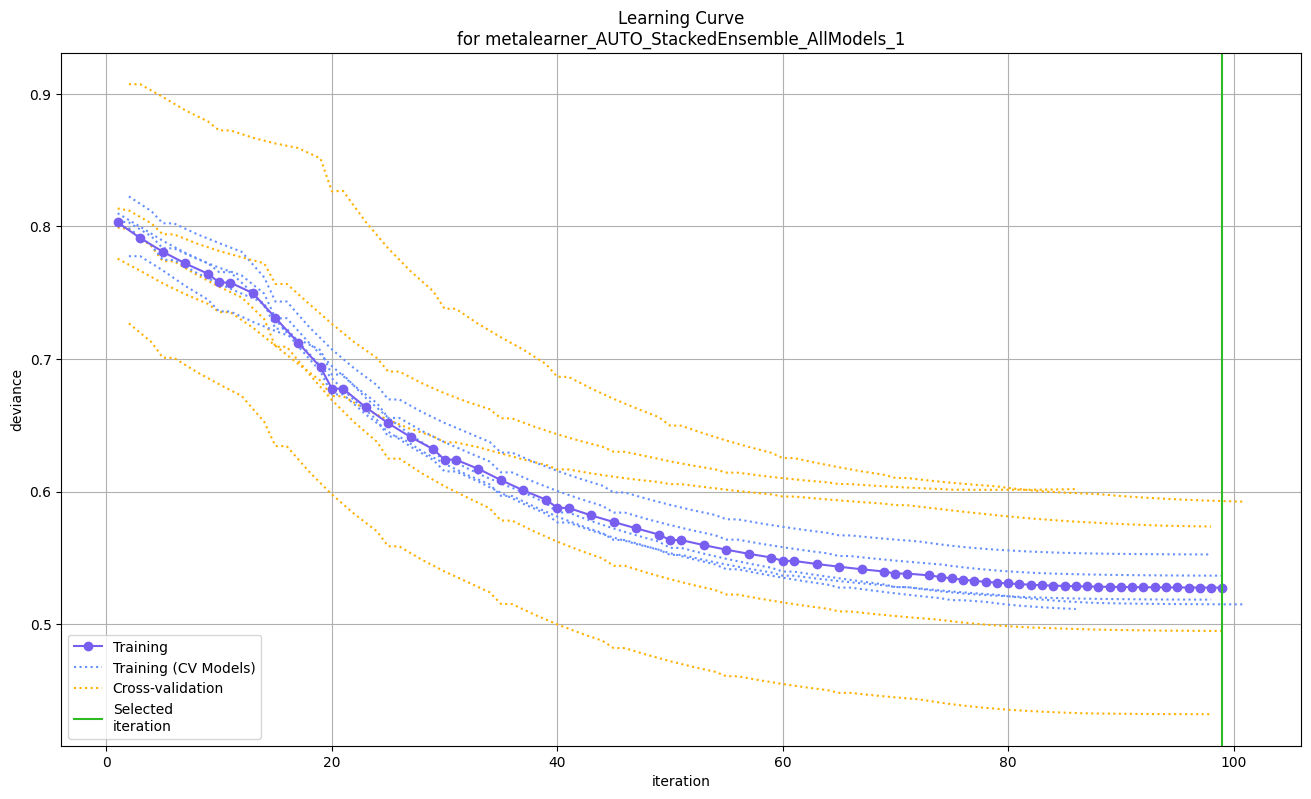

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

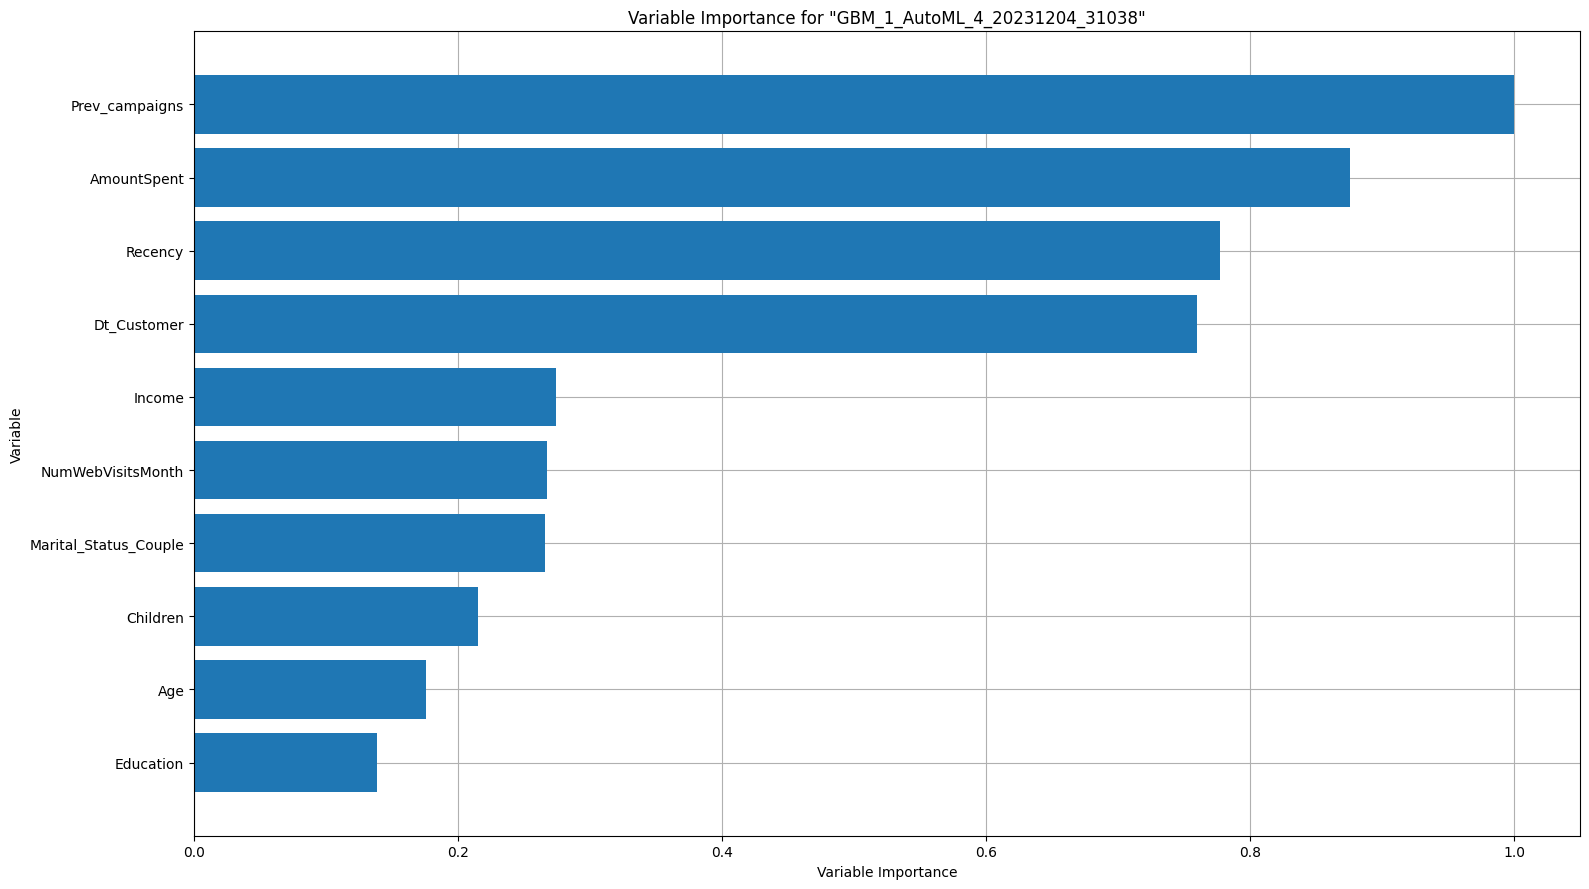

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

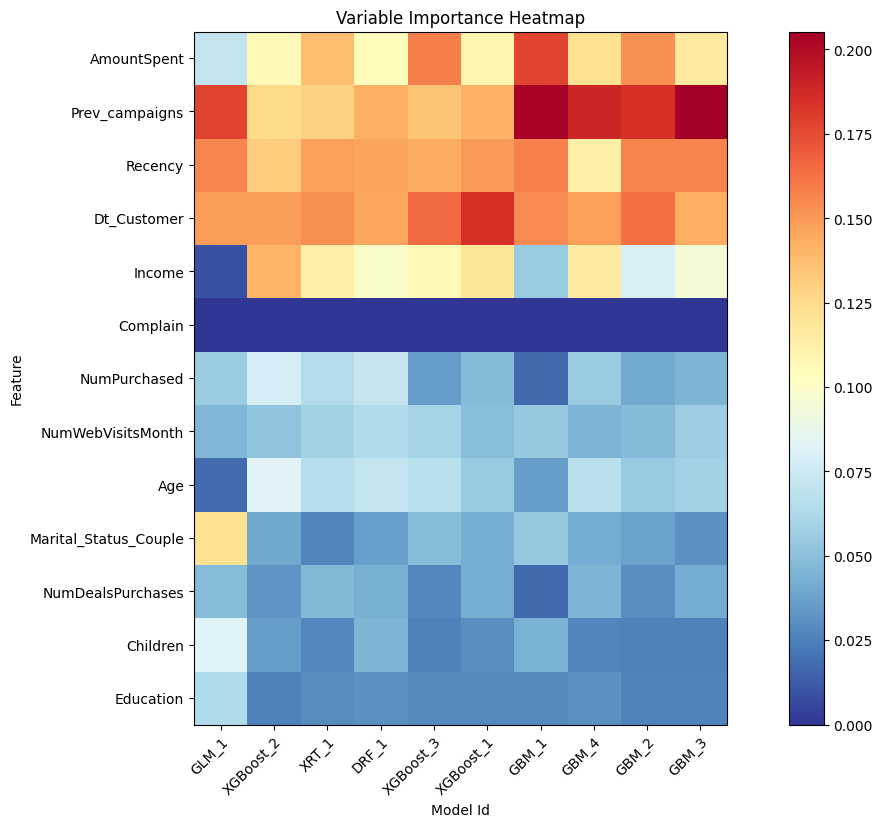

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

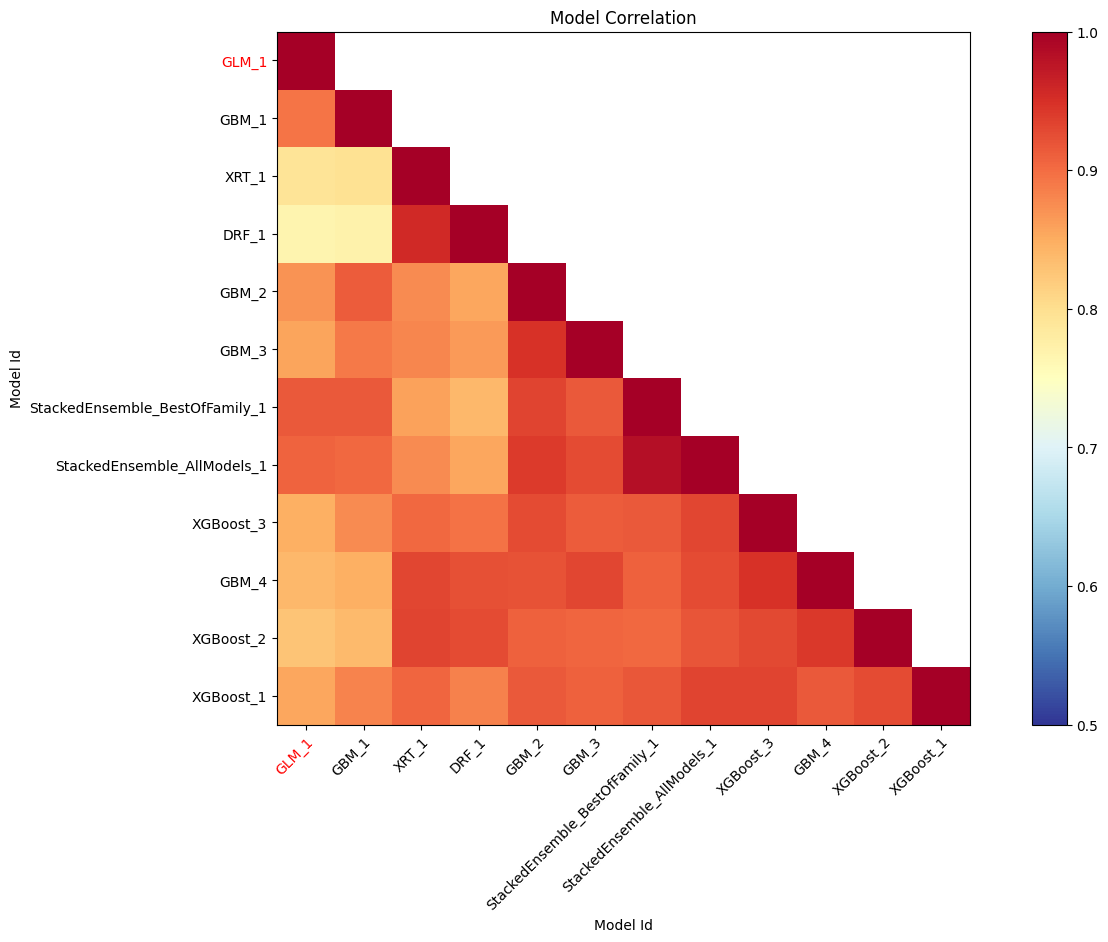

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

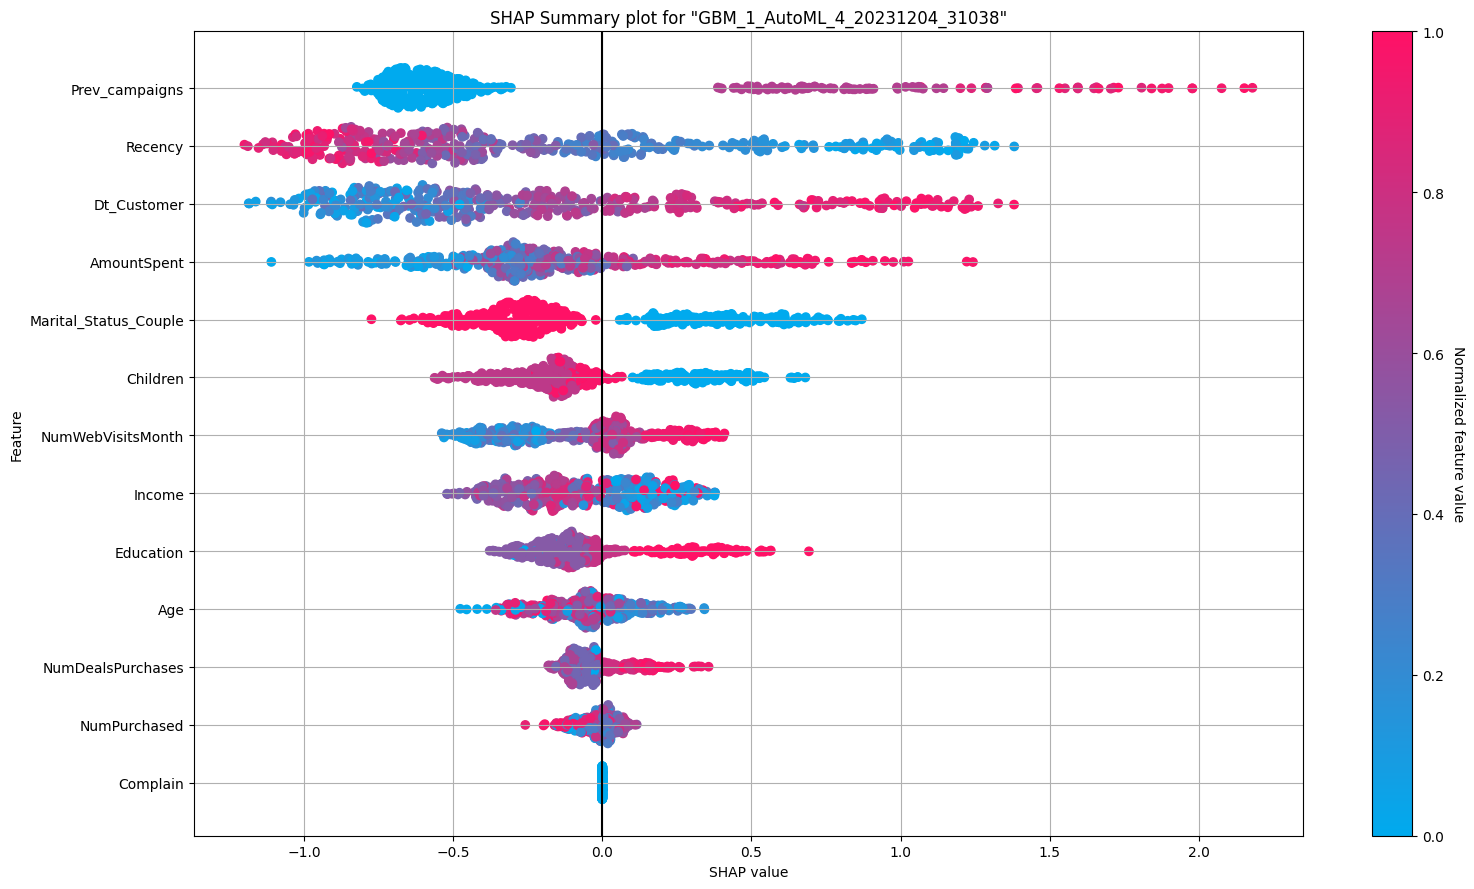

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

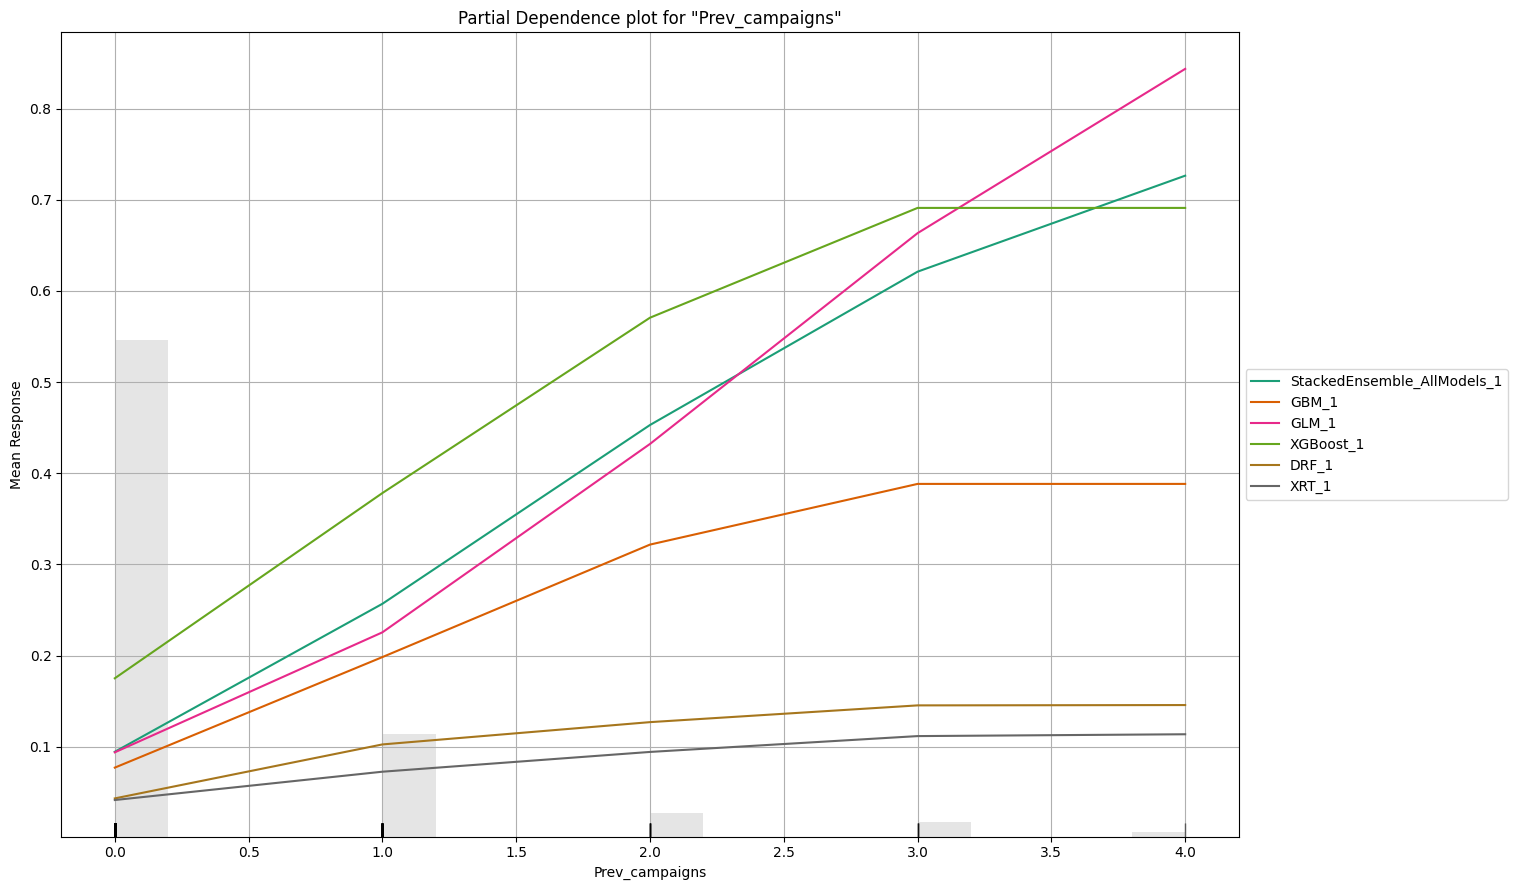

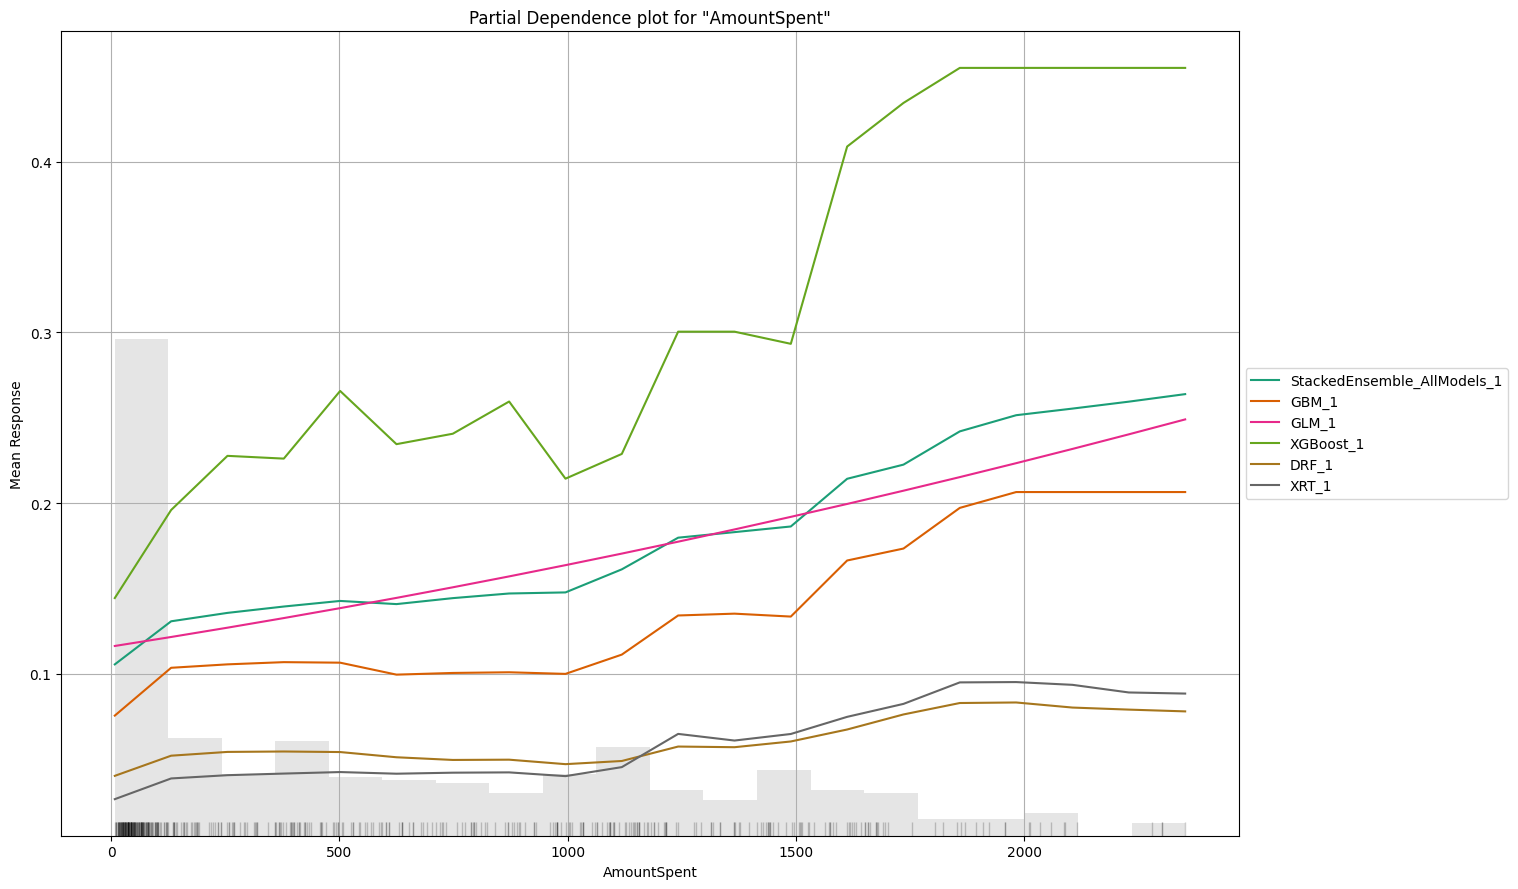

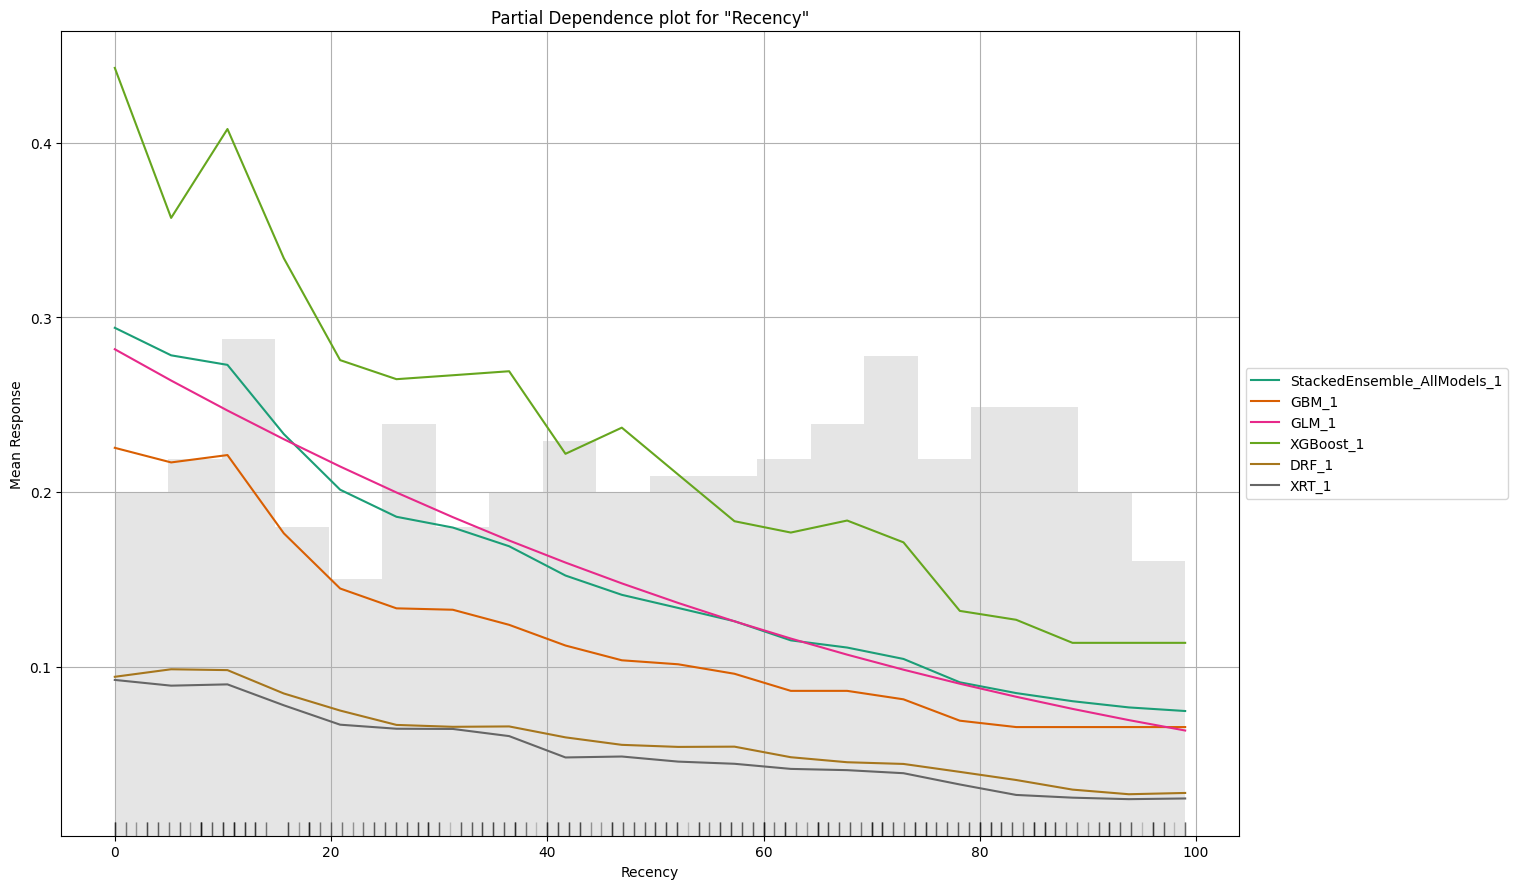

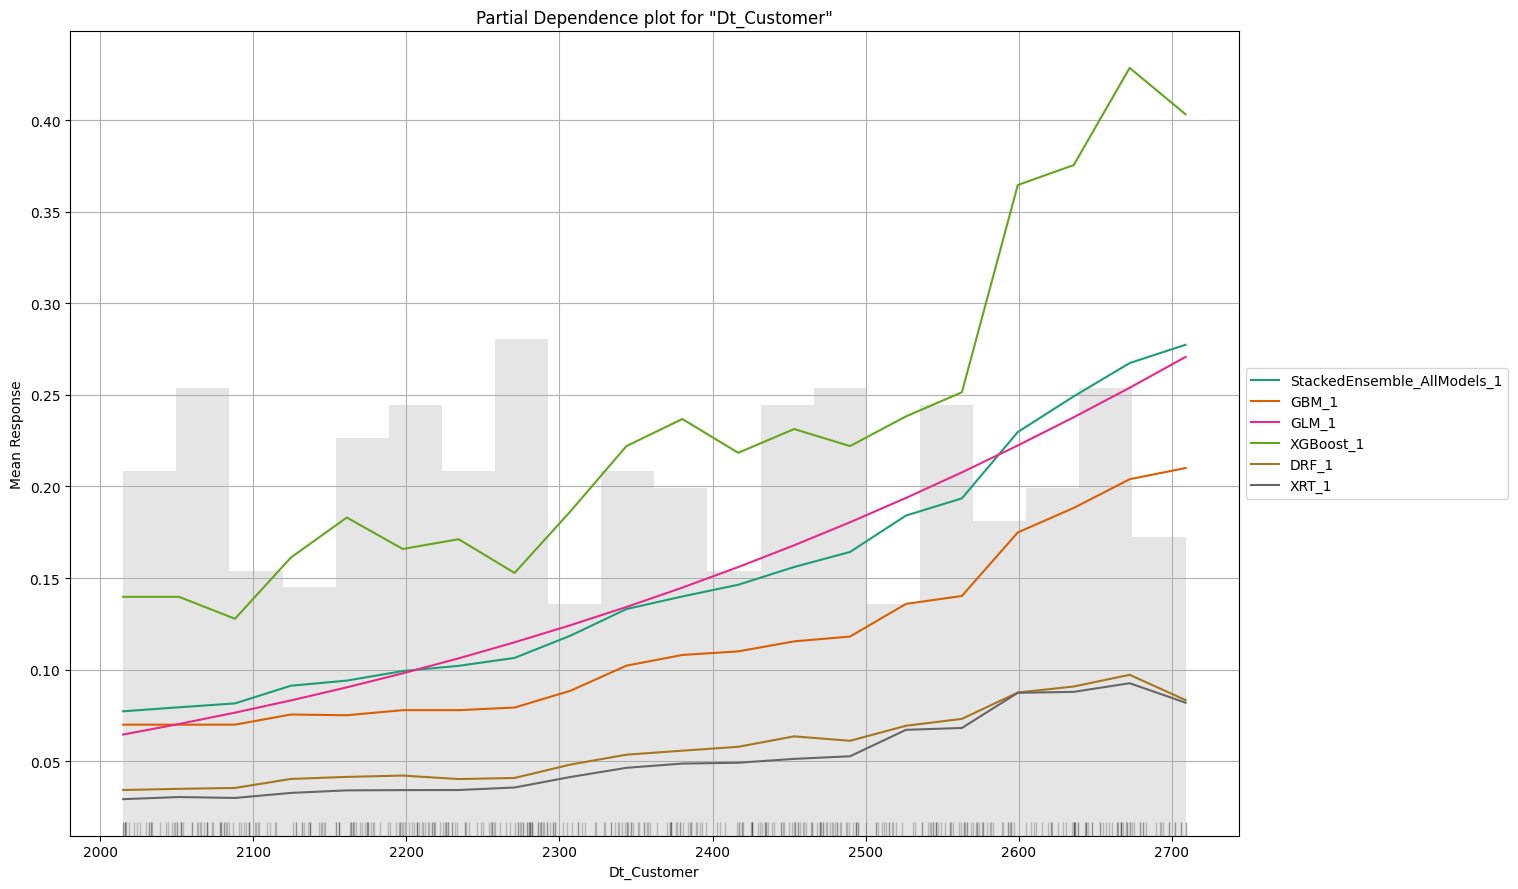

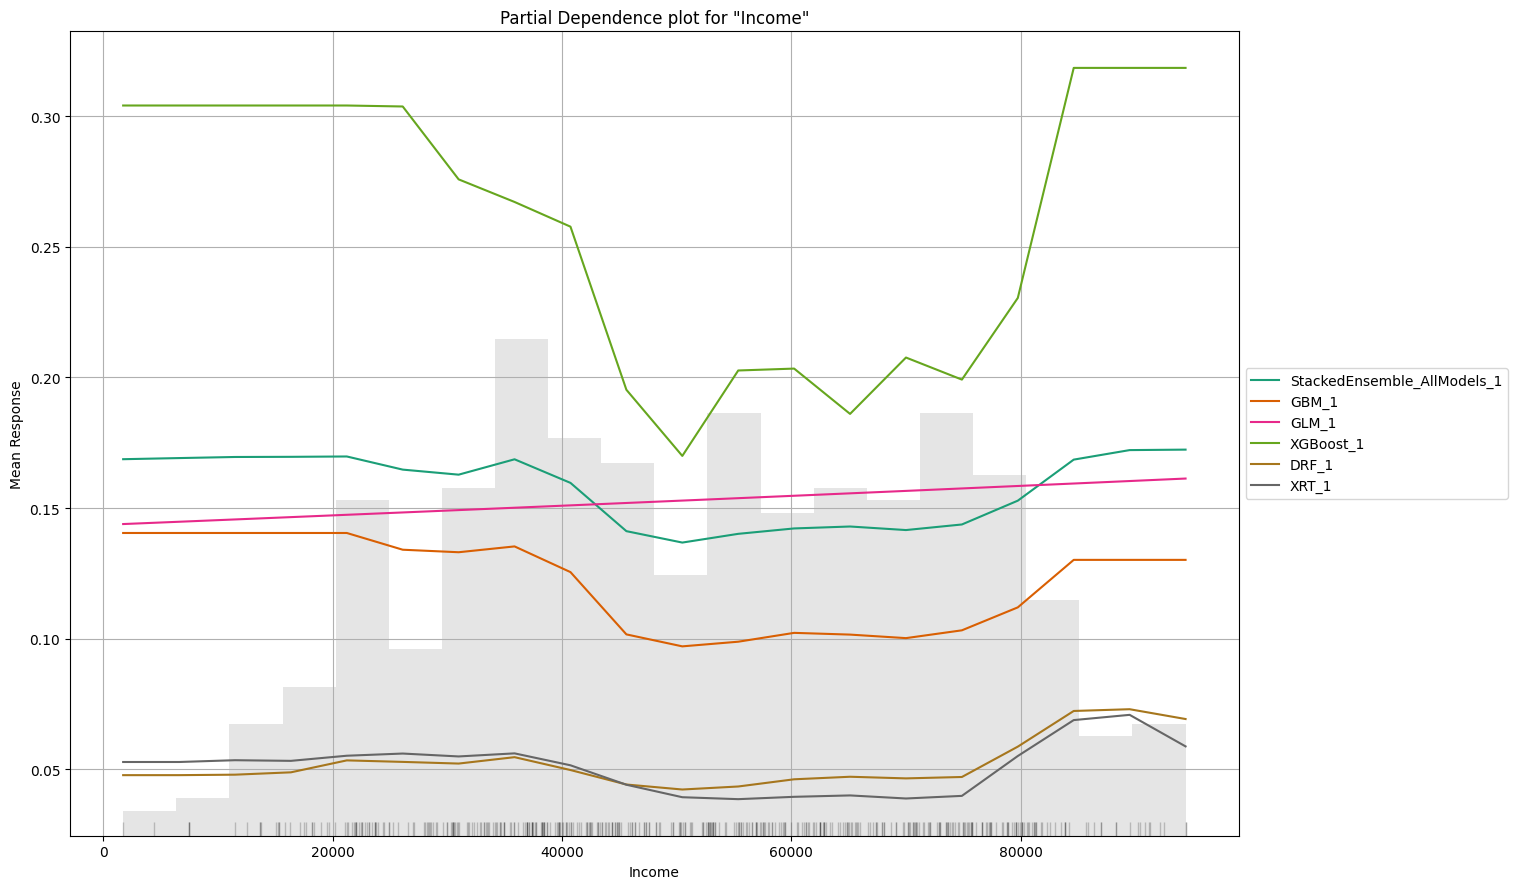

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                     auc    logloss     aucpr    mean_per_class_error      rmse        mse    training_time_ms    predict_time_per_row_ms  algo
------------------------------------------------------  --------  ---------  --------  ----------------------  --------  ---------  ------------------  -------------------------  ---------------
StackedEnsemble_AllModels_1_AutoML_4_20231204_31038     0.910205   0.271031  0.720008                0.182216  0.287856  0.082861                 6214                   0.182337  StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_4_20231204_31038  0.908603   0.272979  0.714242                0.171676  0.289075  0.0835642                3867                   0.109205  StackedEnsemble
GBM_1_AutoML_4_20231204_31038                           0.902663   0.299719  0.703613                0.171993  0.306862  0.0941643                 808                   0.038481  GBM
XGBoost_3_AutoML_4_20231204_31038                       0.895736   0.300717  0.713311                0.21352   0.309136  0.0955648                4005                   0.024125  XGBoost
XGBoost_2_AutoML_4_20231204_31038                       0.891564   0.304095  0.678097                0.23352   0.307672  0.0946619                2186                   0.030426  XGBoost
GLM_1_AutoML_4_20231204_31038                           0.890968   0.293114  0.677646                0.173389  0.299829  0.0898975                 228                   0.015667  GLM
XRT_1_AutoML_4_20231204_31038                           0.890112   0.484033  0.595323                0.171862  0.362471  0.131385                  631                   0.040179  DRF
GBM_2_AutoML_4_20231204_31038                           0.888976   0.341688  0.659381                0.232123  0.327601  0.107322                  413                   0.025953  GBM
XGBoost_1_AutoML_4_20231204_31038                       0.887654   0.340052  0.656748                0.207486  0.329434  0.108527                 2030                   0.022397  XGBoost
GBM_3_AutoML_4_20231204_31038                           0.887393   0.347594  0.670562                0.23568   0.329338  0.108463                  774                   0.02633   GBM
GBM_4_AutoML_4_20231204_31038                           0.887039   0.346832  0.691161                0.233203  0.324488  0.105292                  657                   0.026714  GBM
DRF_1_AutoML_4_20231204_31038                           0.886369   0.547174  0.618358                0.226089  0.353221  0.124765                 1092                   0.044403  DRF
[12 rows x 10 columns]

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_AllModels_1_AutoML_4_20231204_31038

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.27024657037004823
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      323  35   0.0978   (35.0/358.0)
1      20   55   0.2667   (20.0/75.0)
Total  343  90   0.127    (55.0/433.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

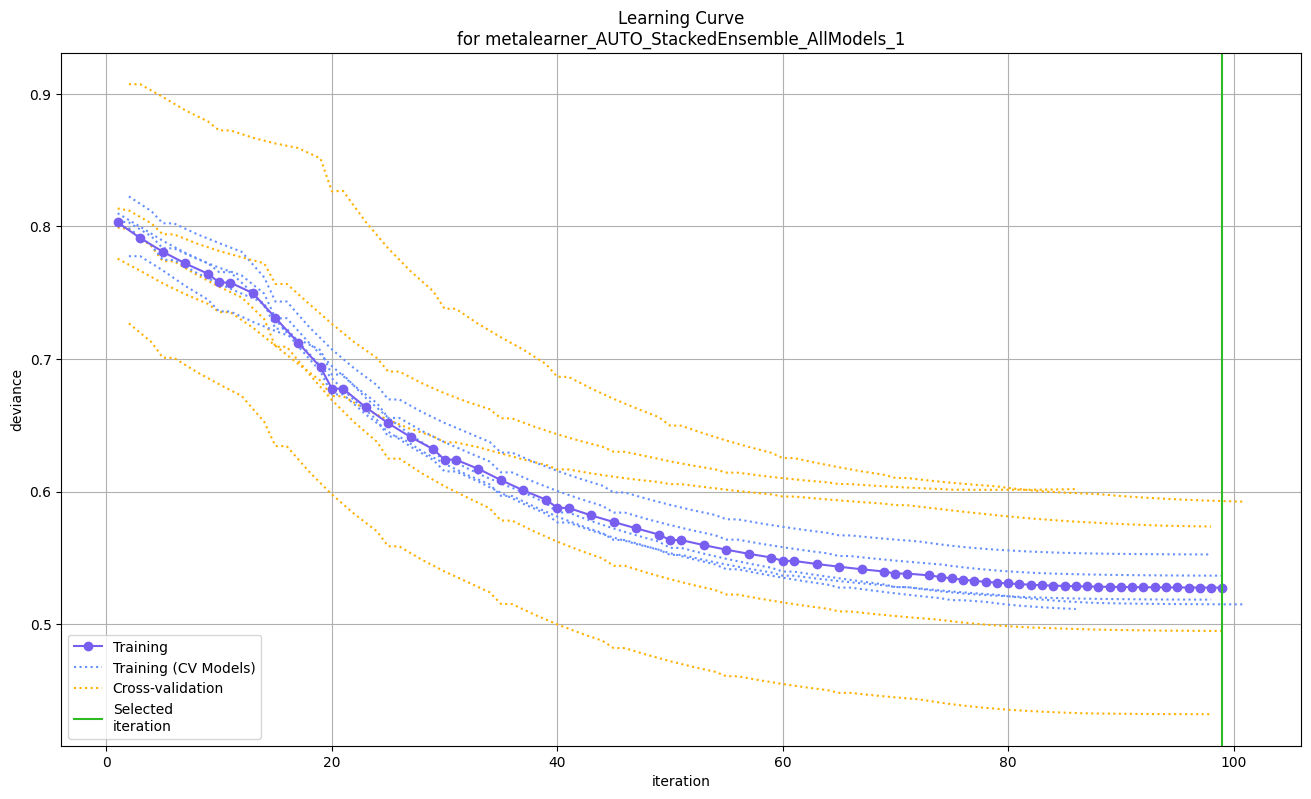

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

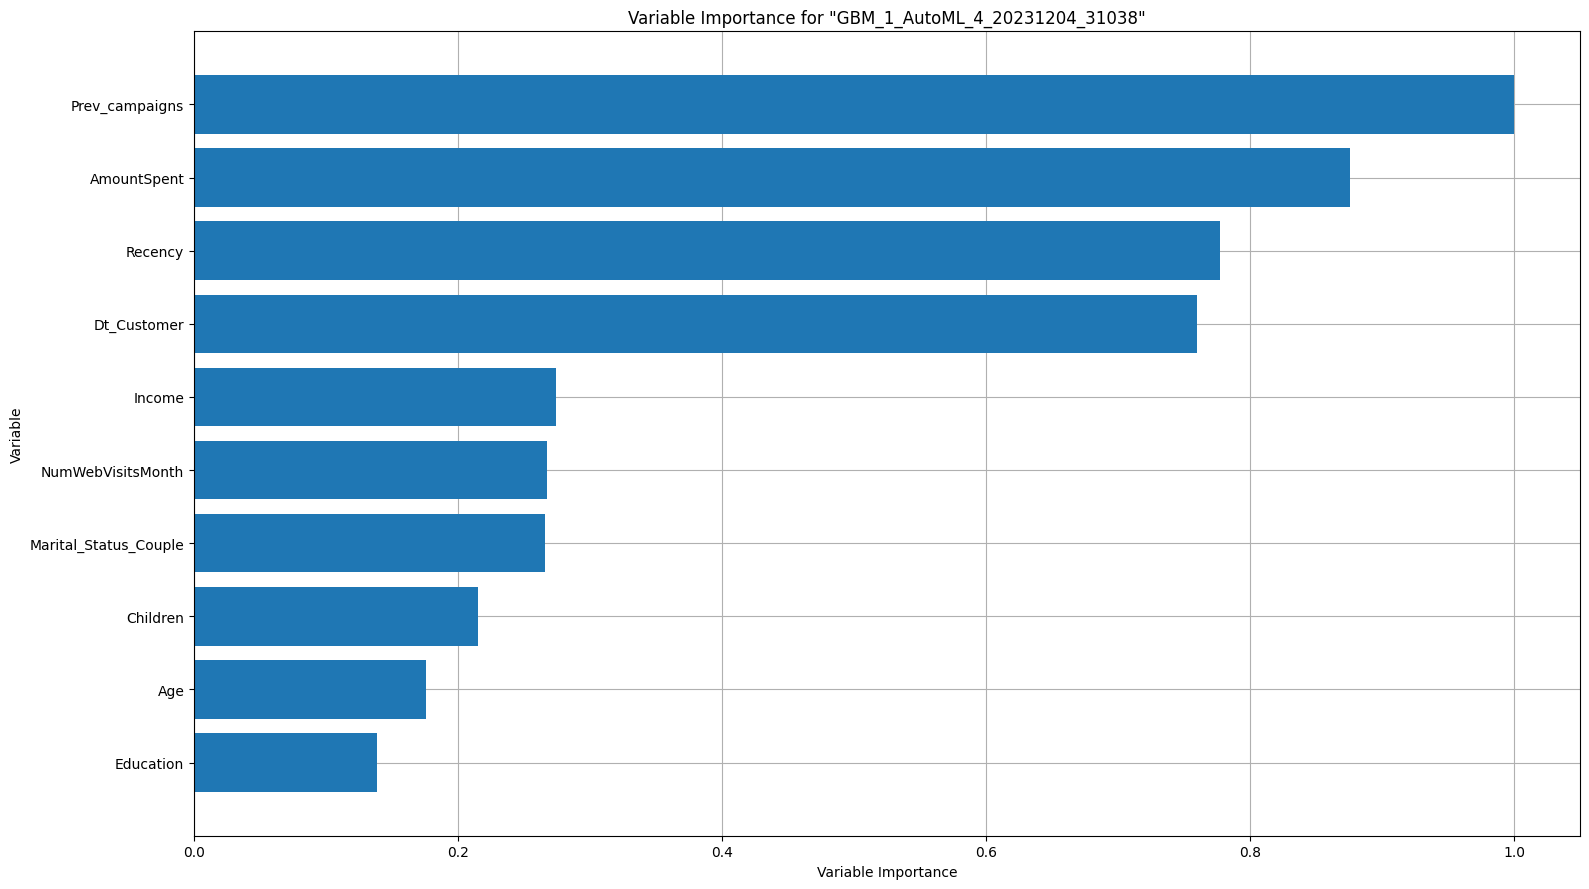

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

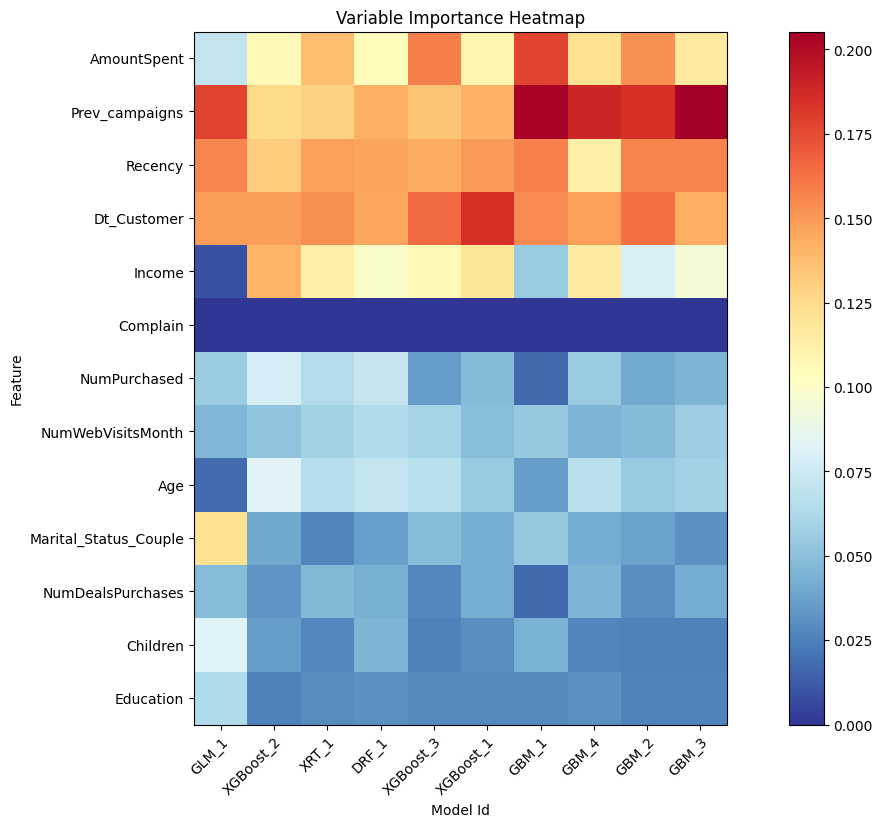

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

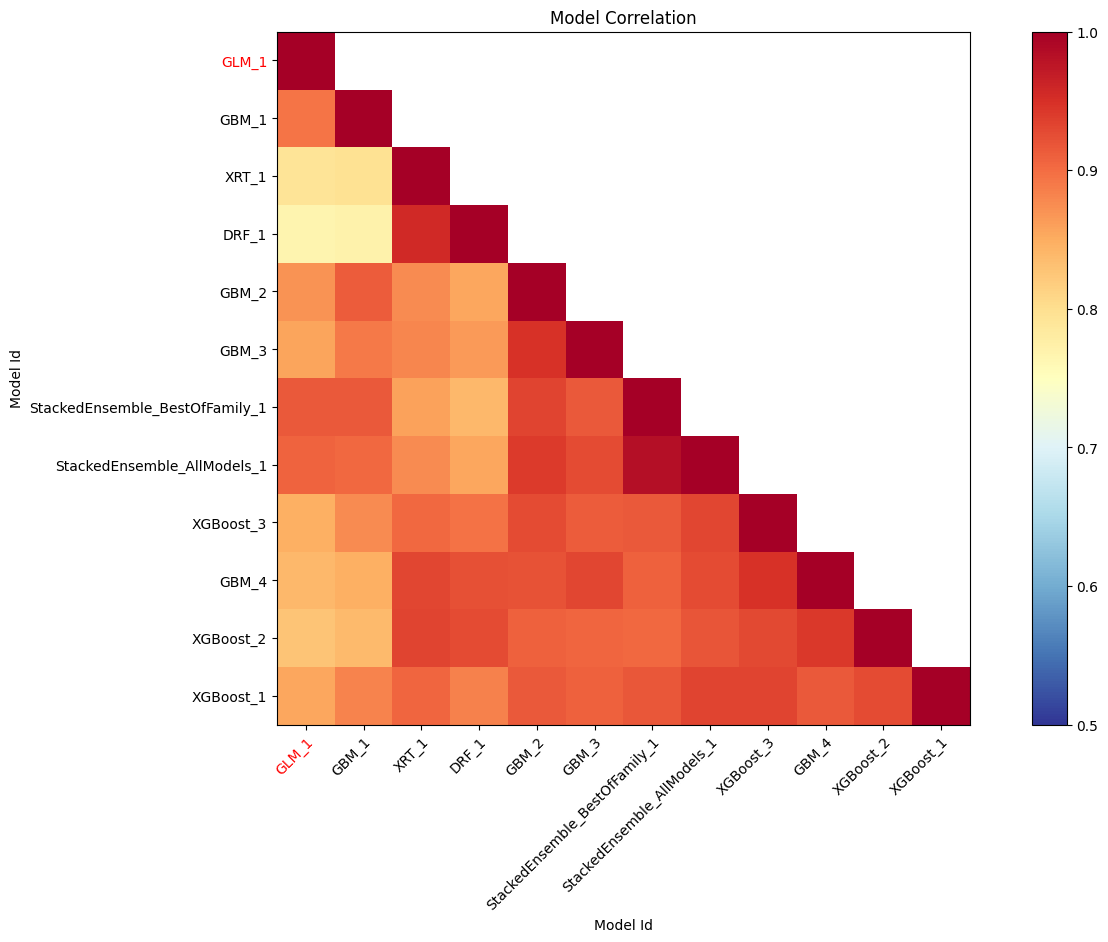

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

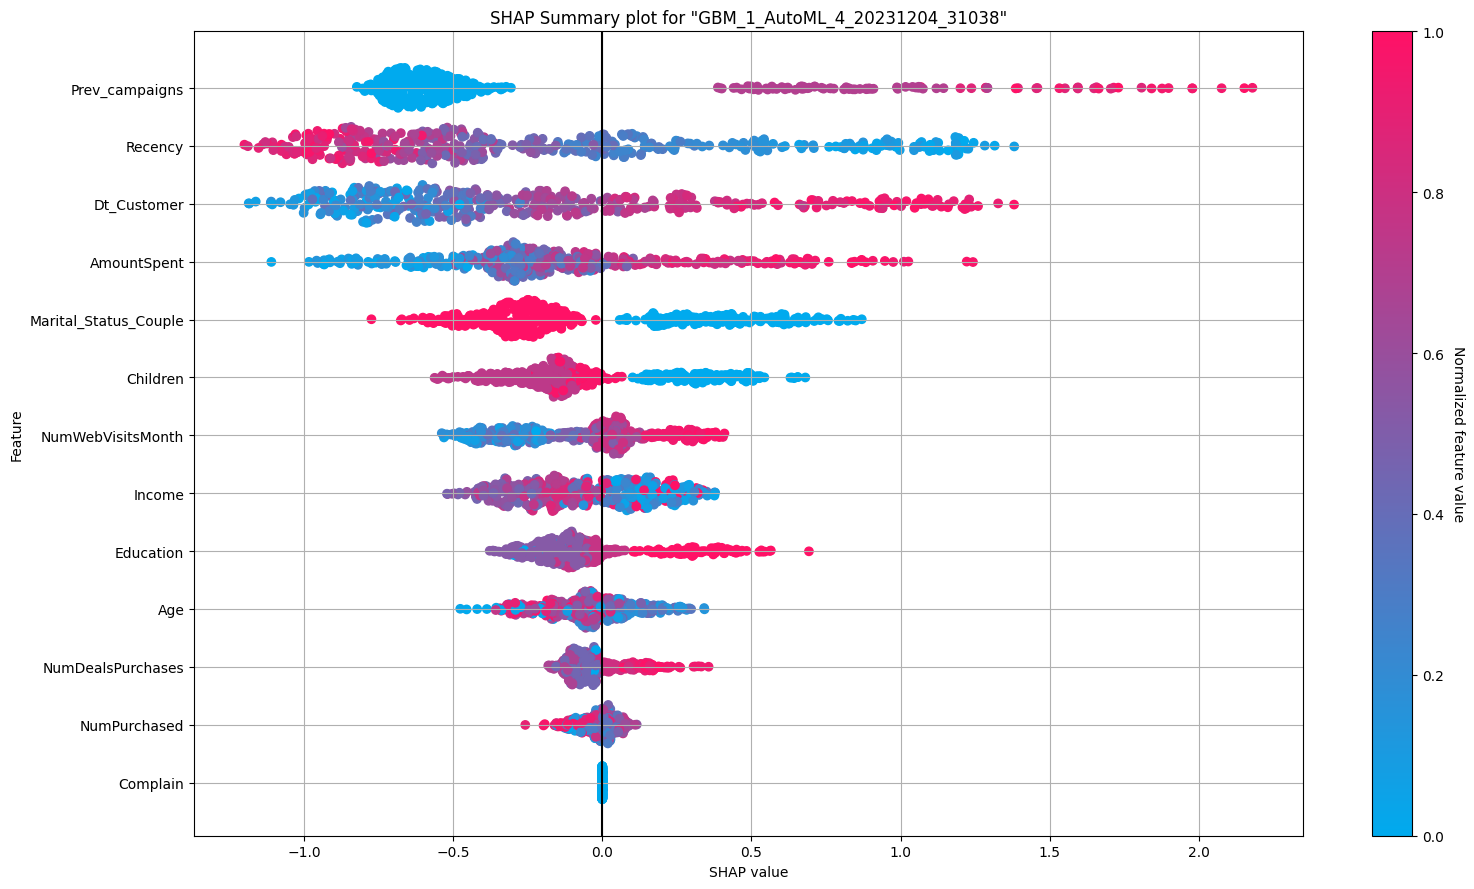

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

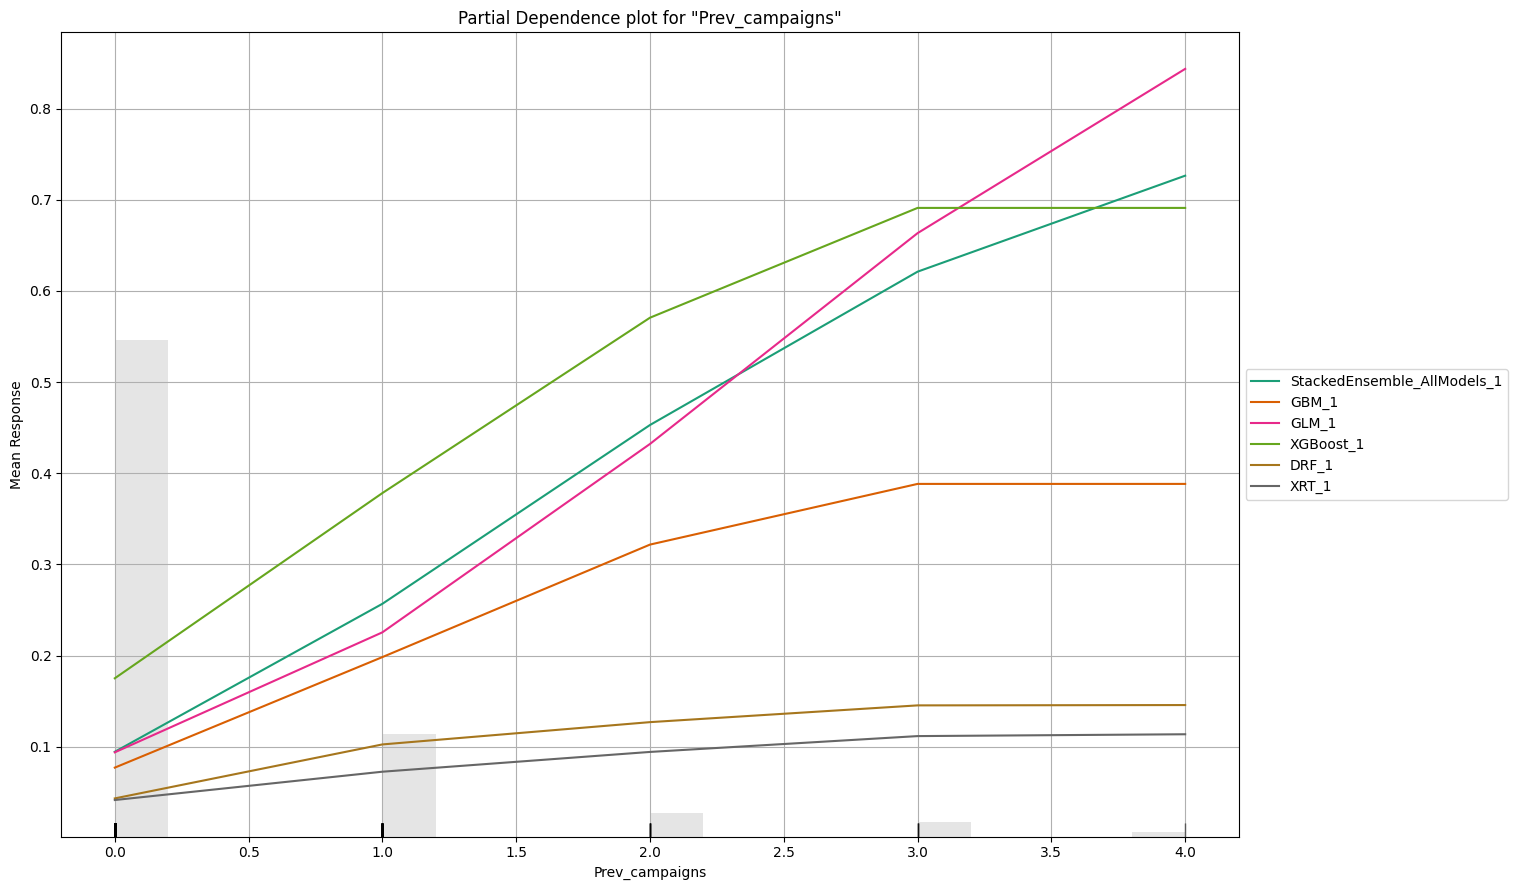

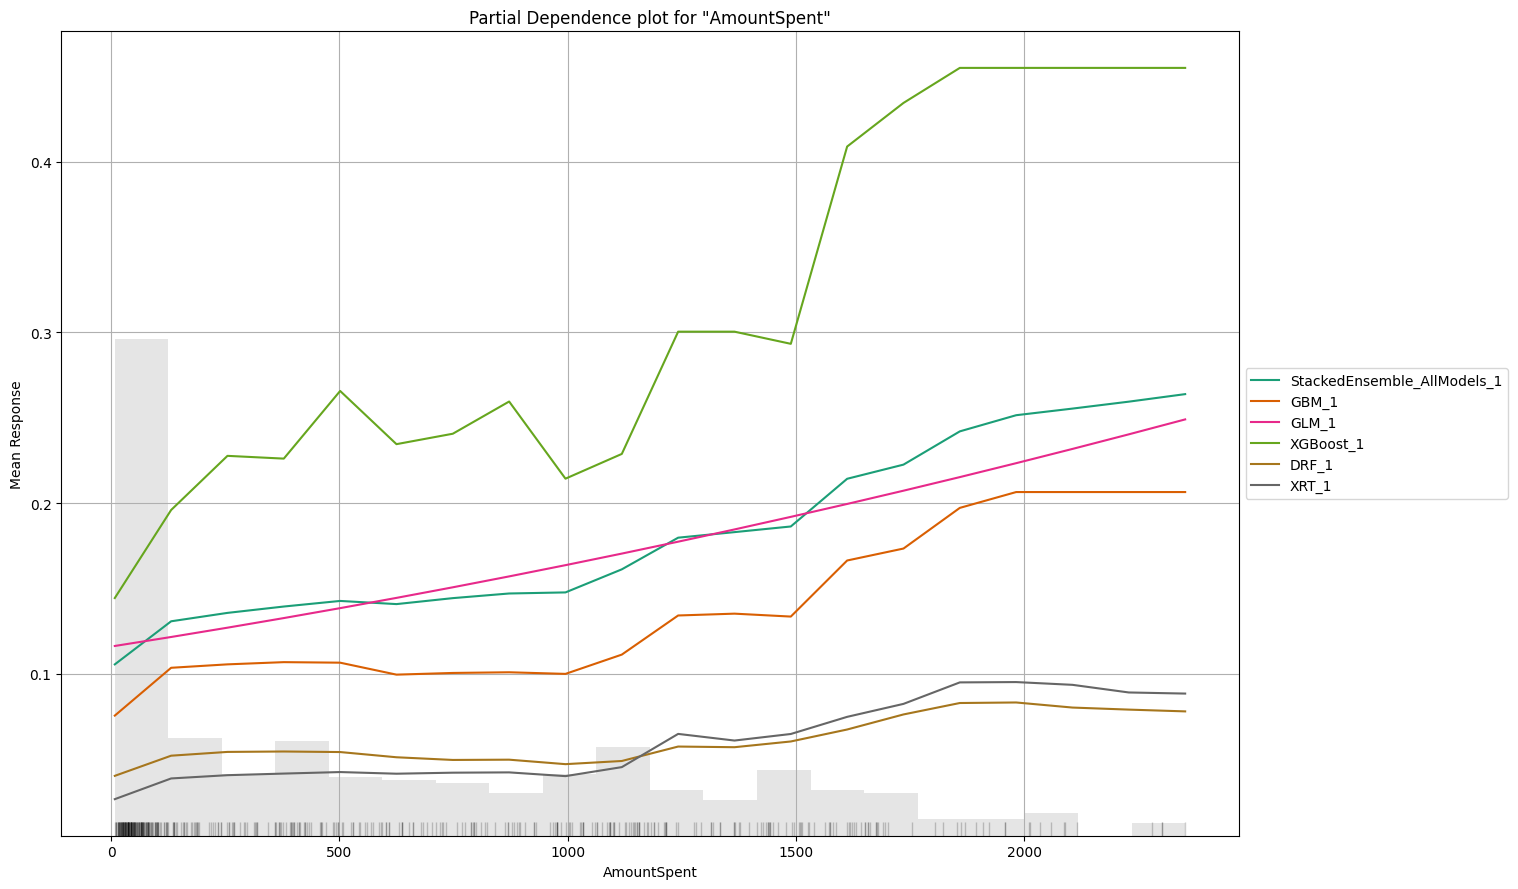

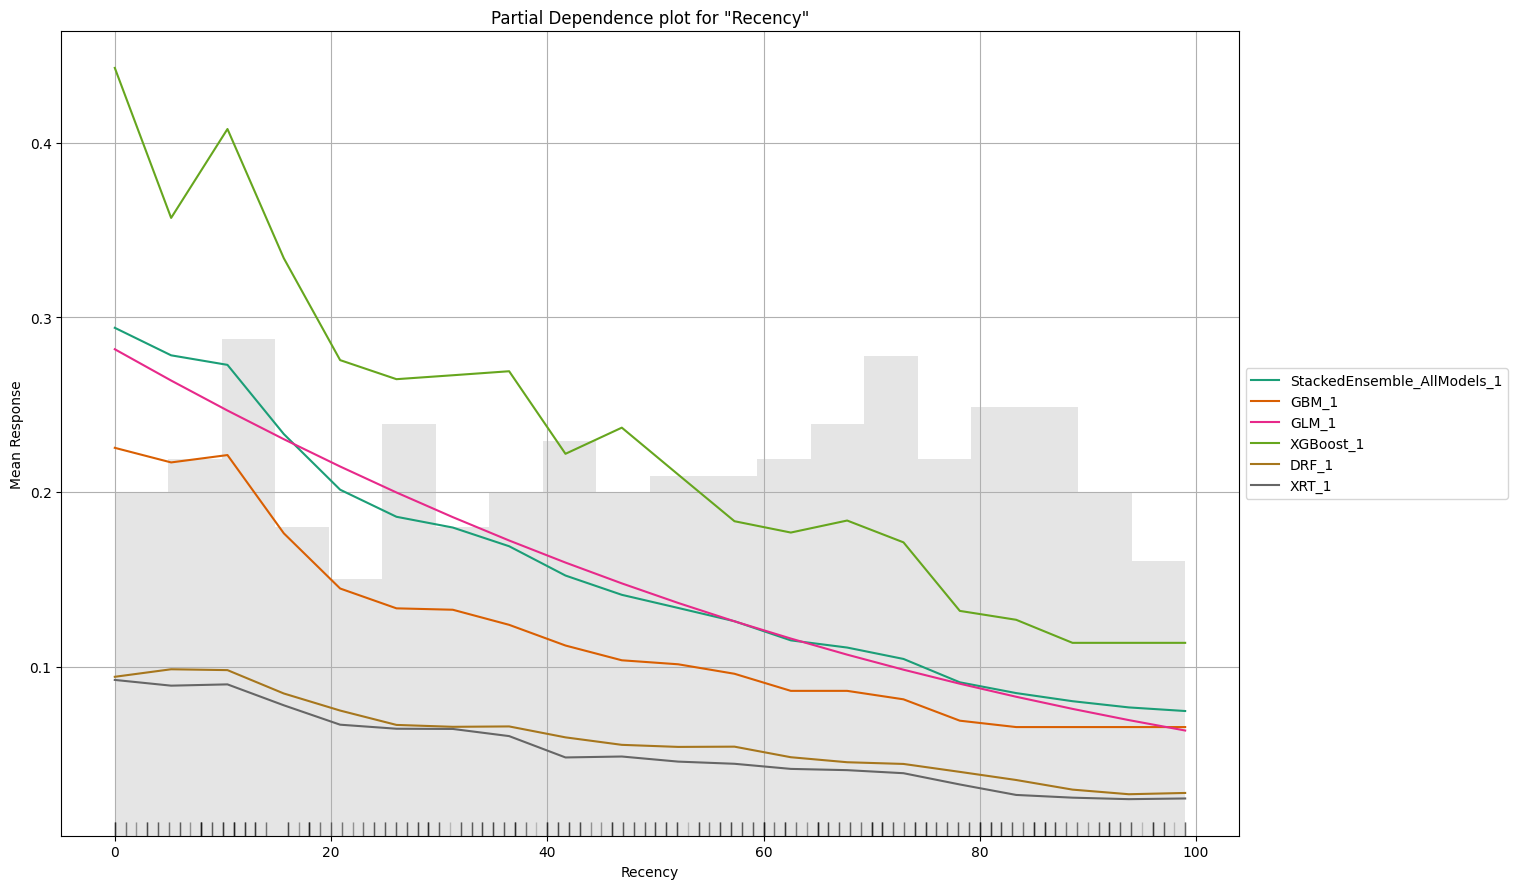

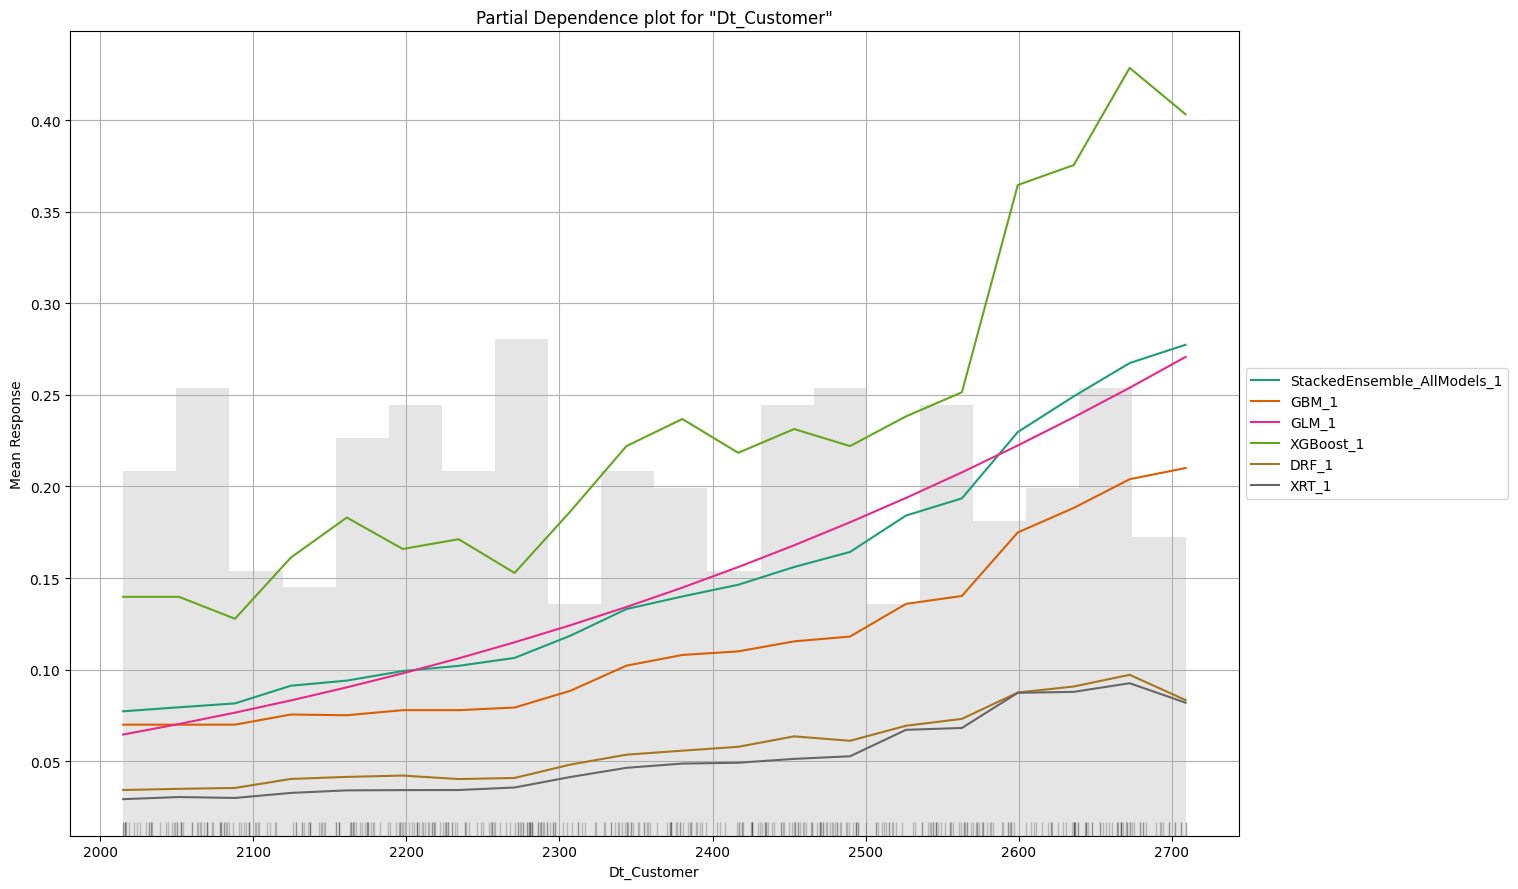

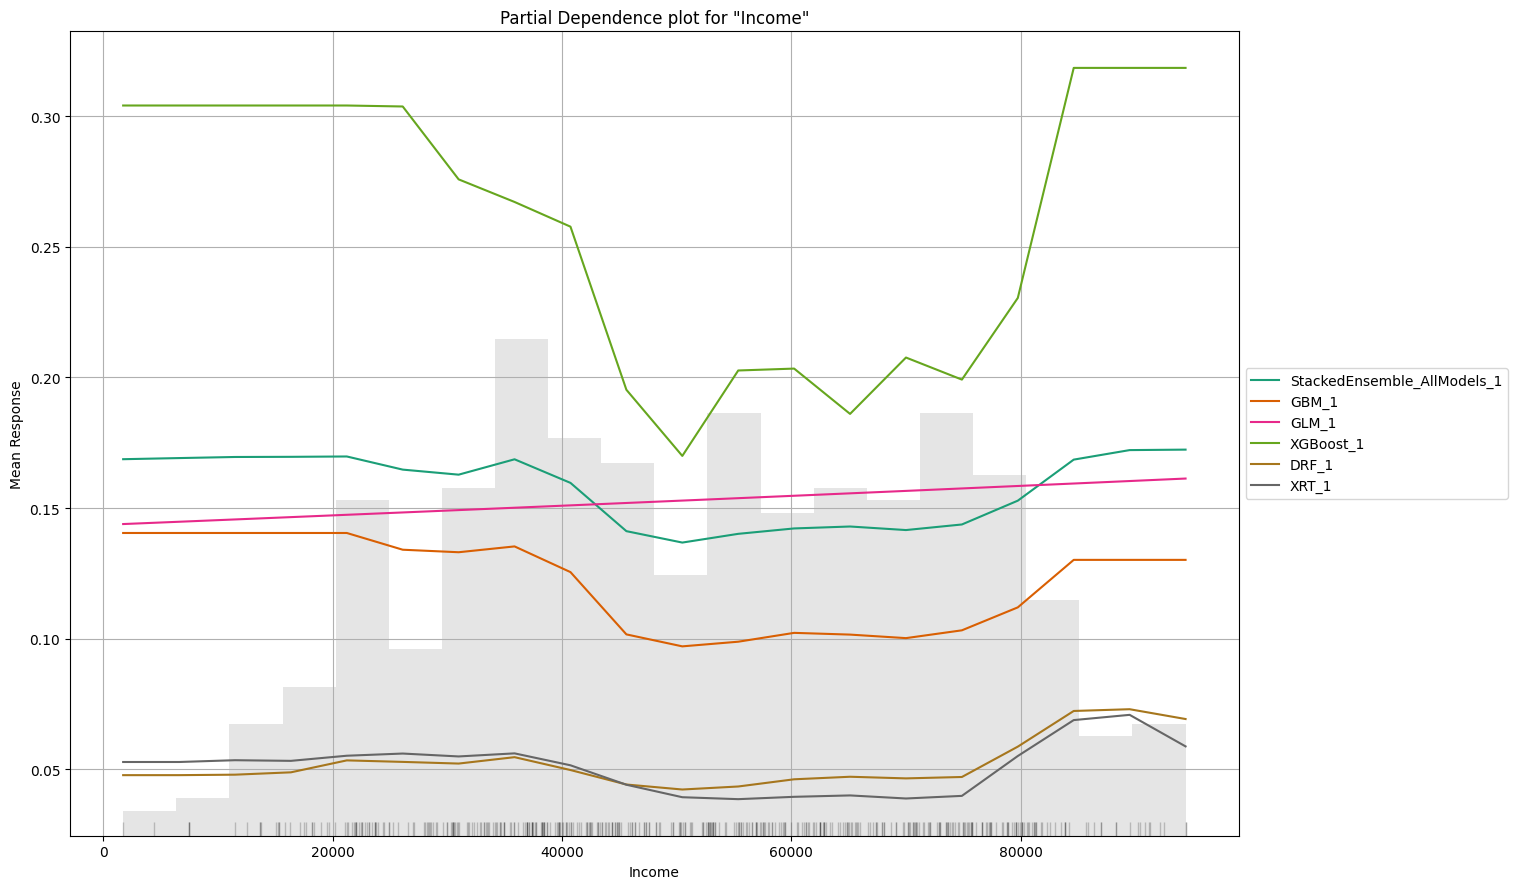

In [157]:
aml.explain(test)

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

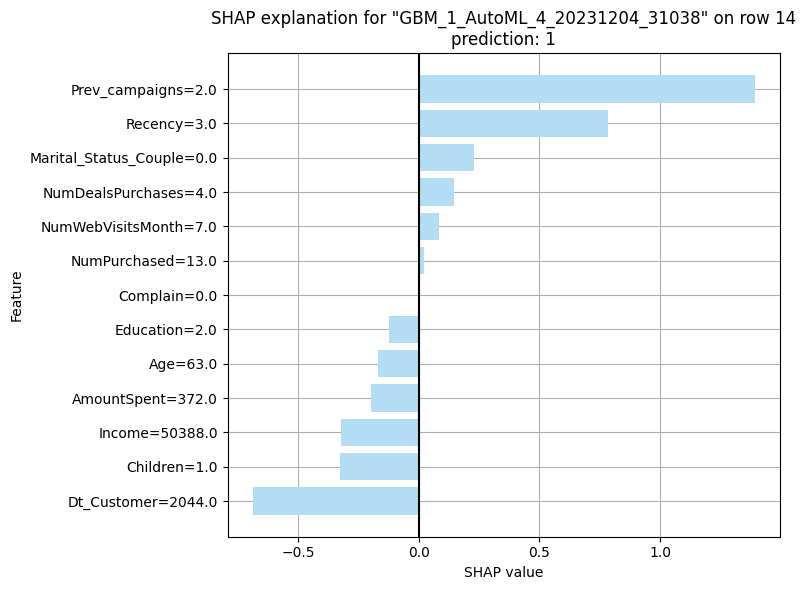

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

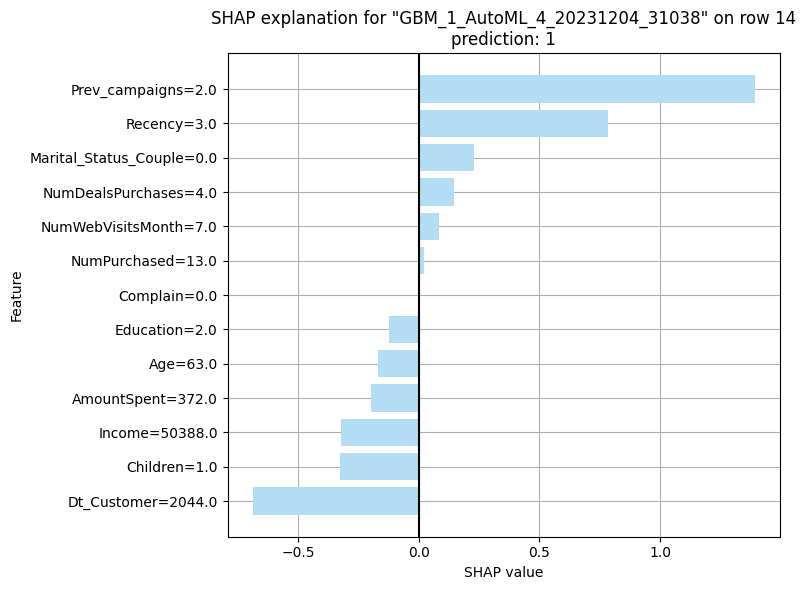

In [158]:
aml.explain_row(frame = test, row_index = 14, figsize = (8,6), exclude_explanations = "leaderboard")


# SHAP Analysis for Linear and Tree-Based Models


PermutationExplainer explainer: 1774it [02:24, 11.24it/s]


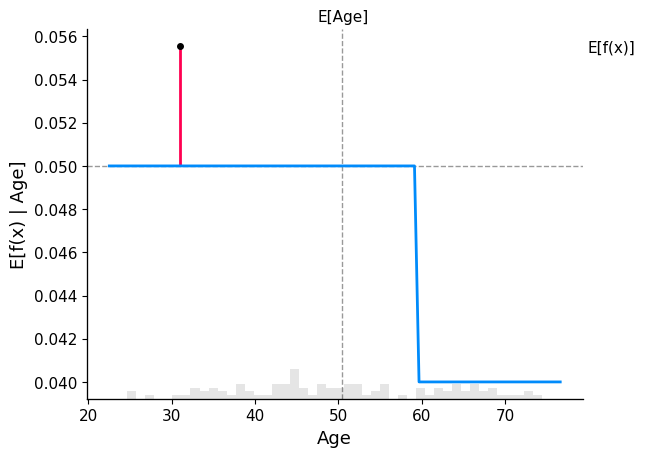

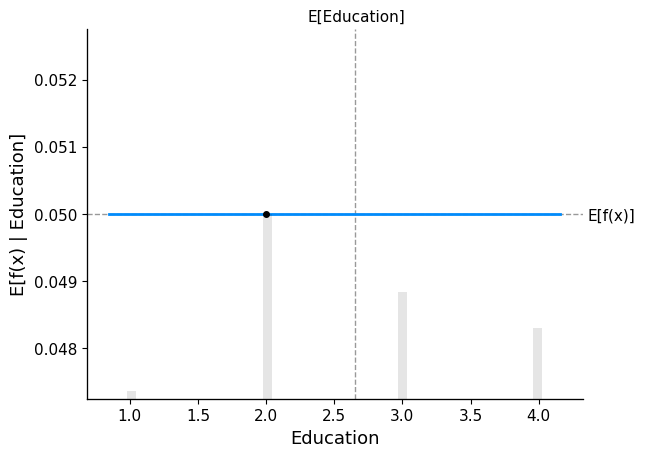

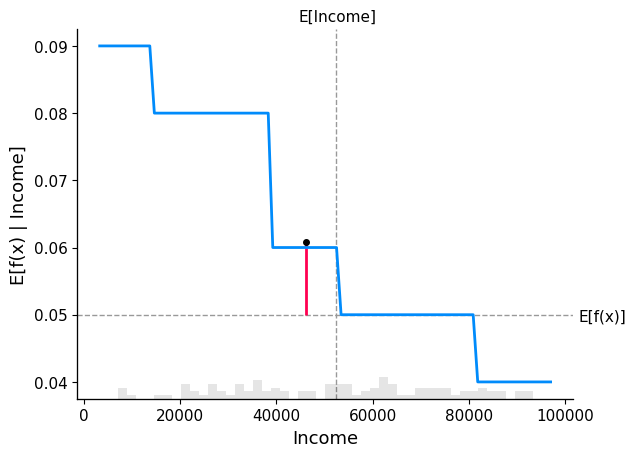

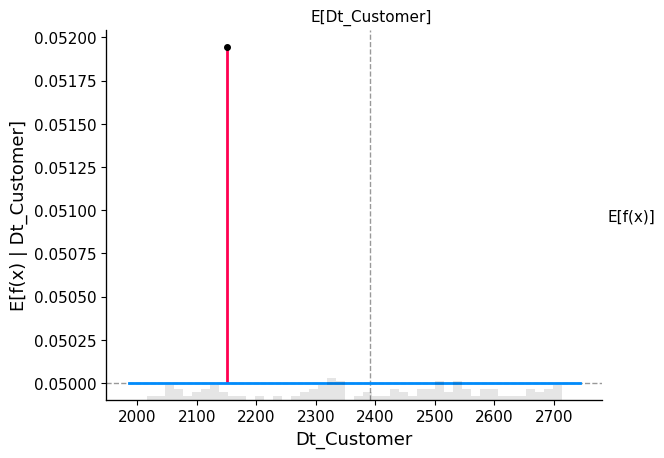

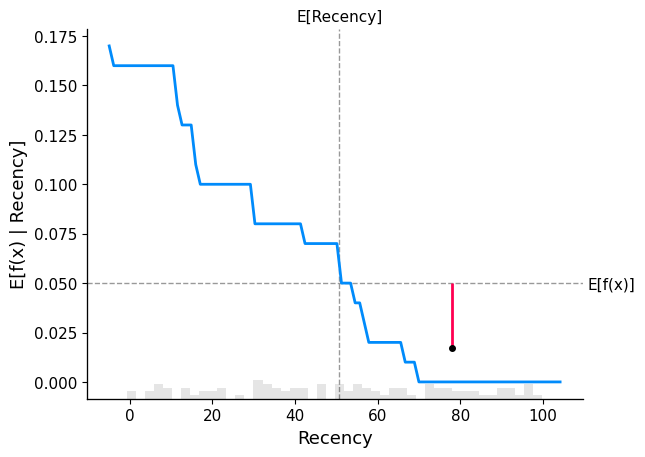

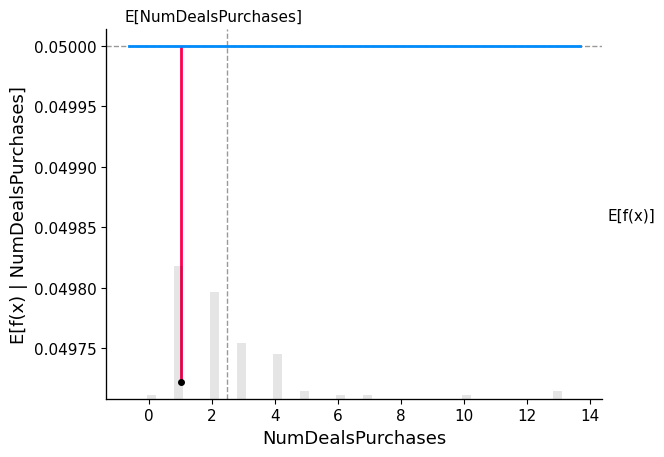

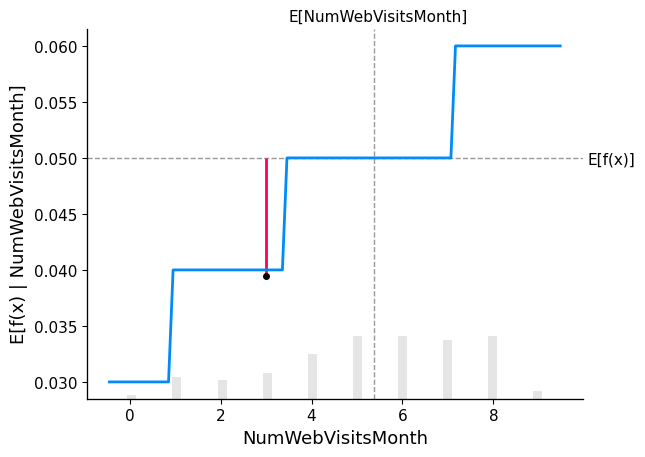

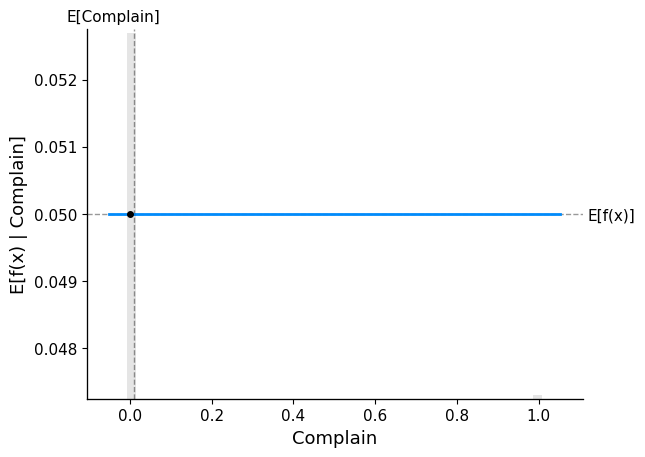

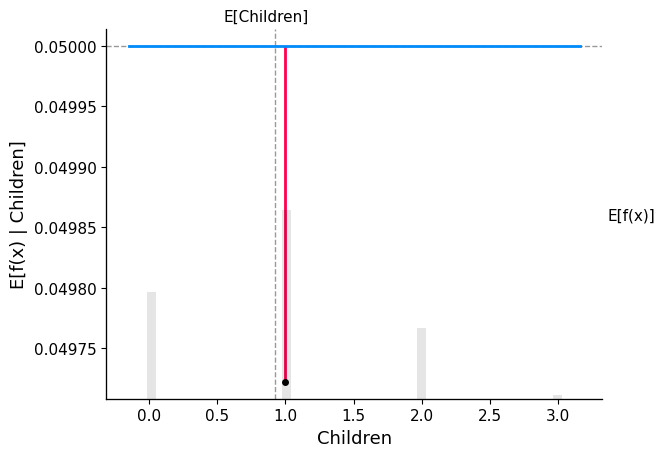

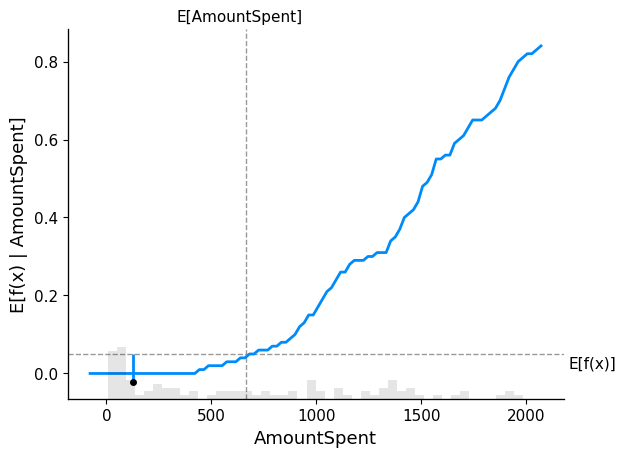

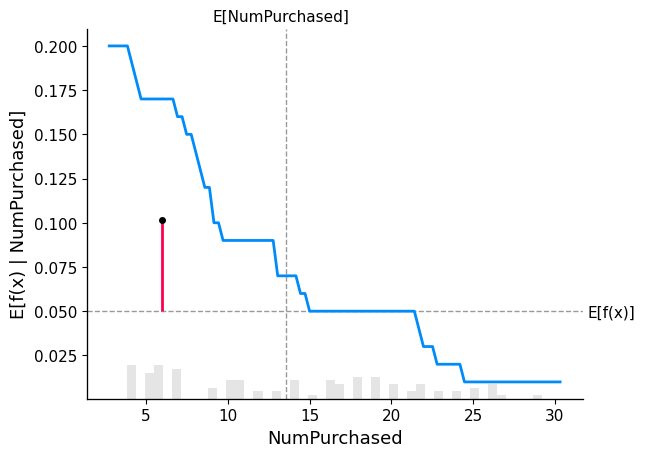

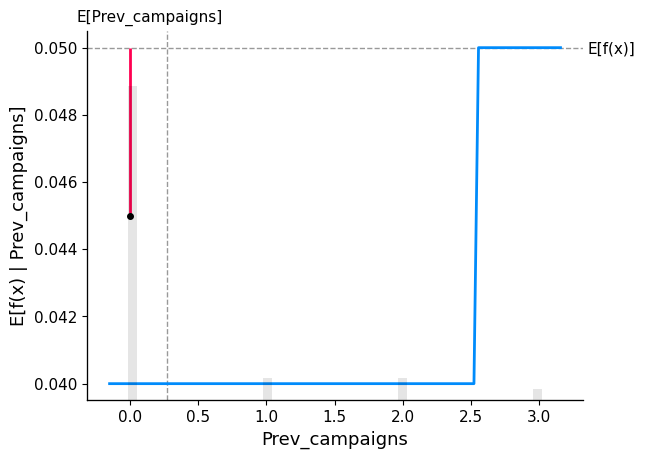

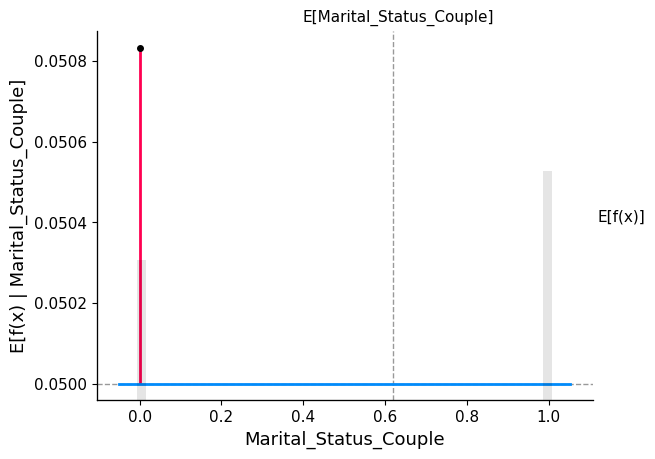

In [159]:
import shap

x_train_100 = shap.utils.sample(
    x_train, 100
)
# SHAP explanation of a Linear Model
linear_explainer = shap.Explainer(logreg.predict, x_train_100)
linear_shap_values = linear_explainer(x_train)
for i in x_train.columns:
    # make a standard partial dependence plot
    sample_ind = 18
    shap.partial_dependence_plot(
        i,
        logreg.predict,
        x_train_100,
        model_expected_value=True,
        feature_expected_value=True,
        ice=False,
        shap_values=linear_shap_values[sample_ind : sample_ind + 1, :],
    )

PermutationExplainer explainer: 1774it [01:24, 18.12it/s]


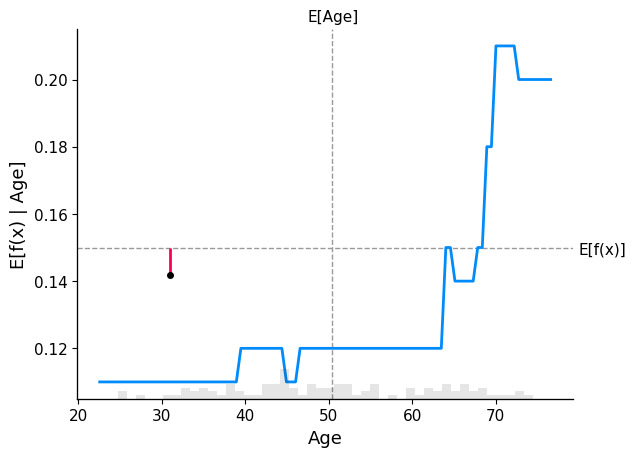

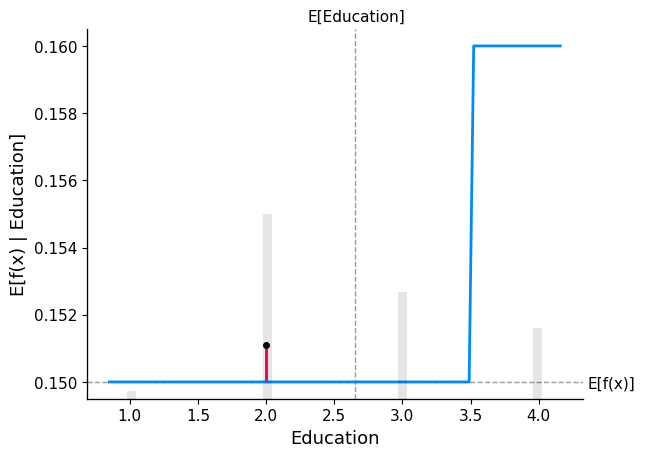

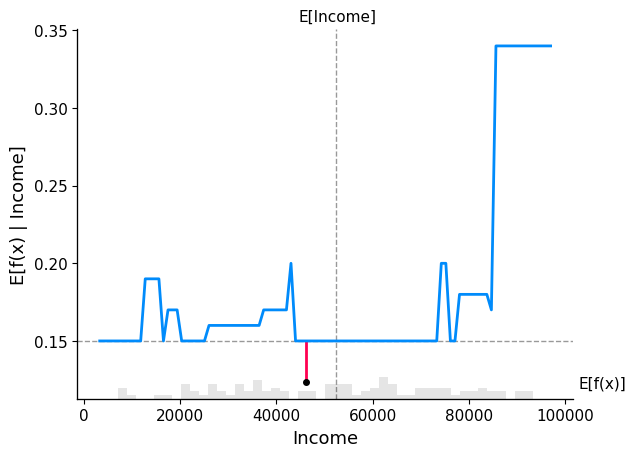

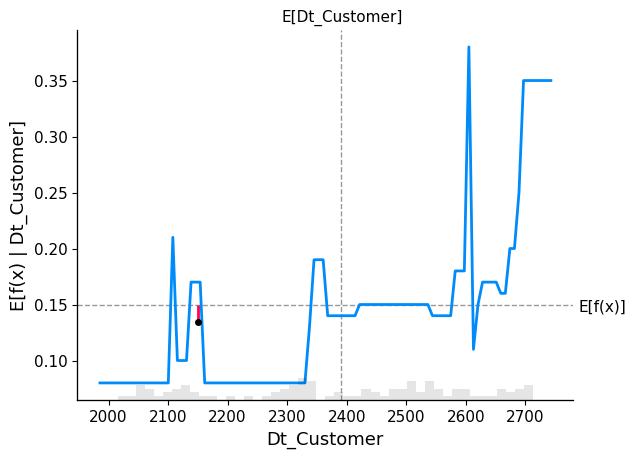

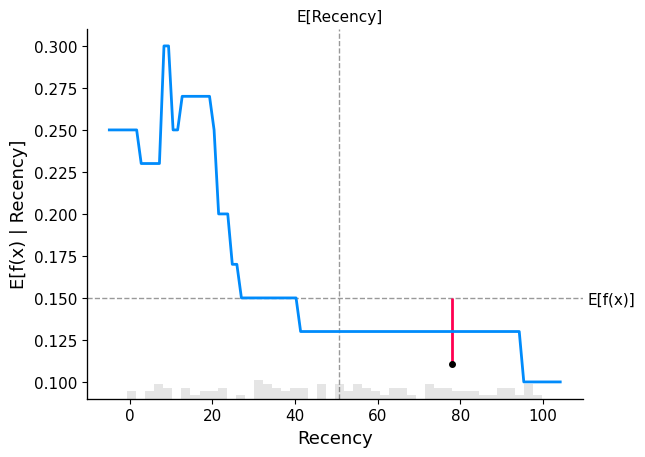

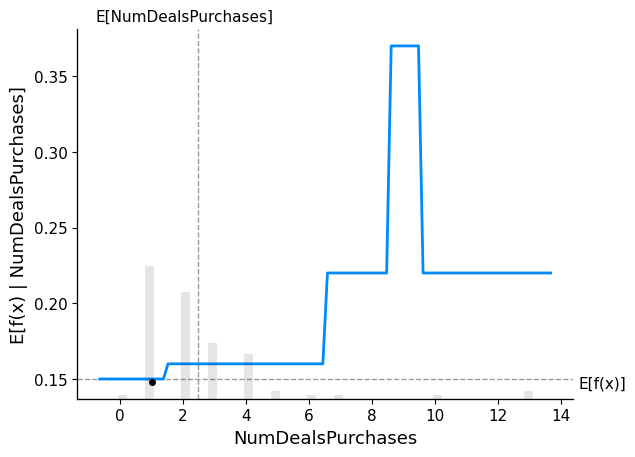

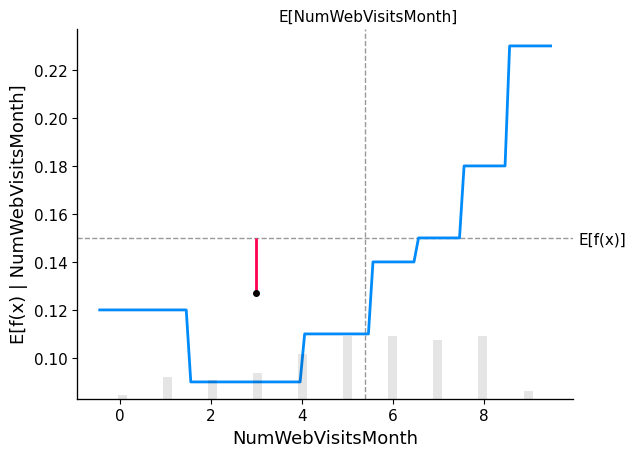

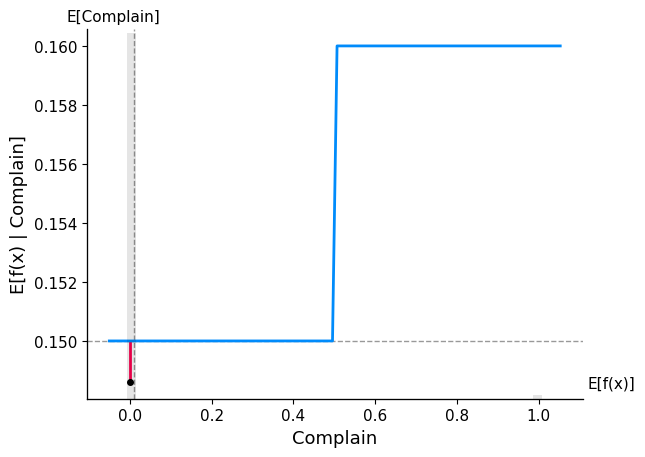

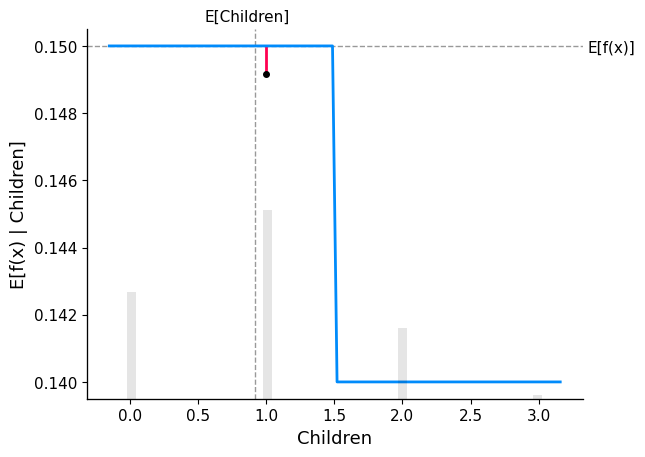

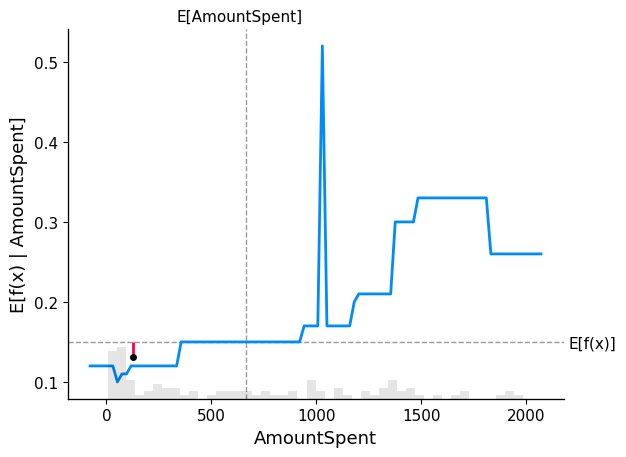

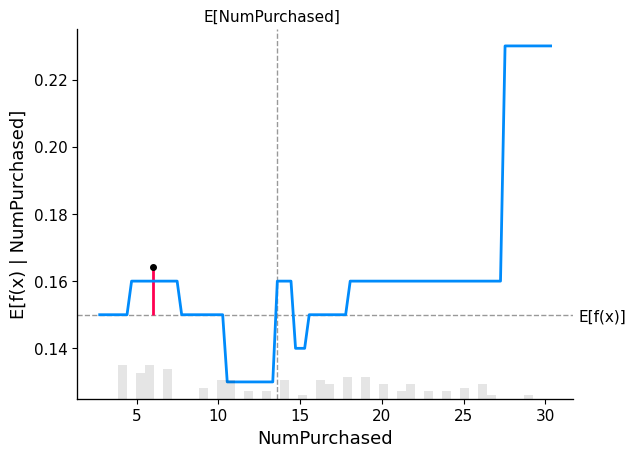

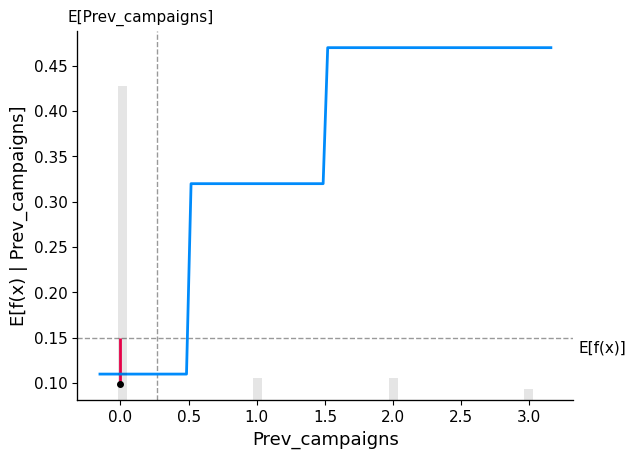

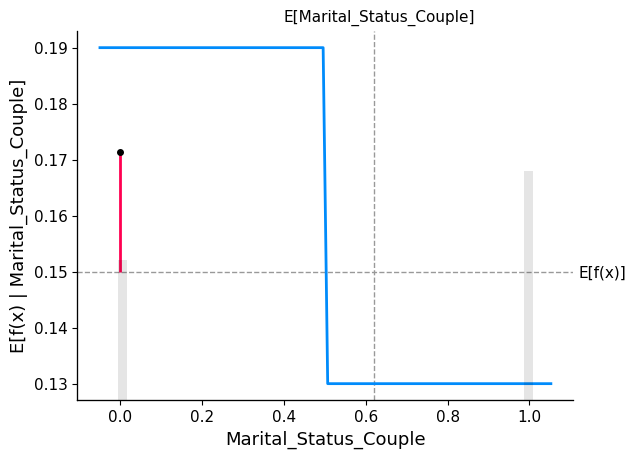

In [160]:
# SHAP explanation of a tree based model
tree_explainer = shap.Explainer(dtc.predict, x_train_100)
tree_shap_values = tree_explainer(x_train)
for i in x_train.columns:
    # make a standard partial dependence plot
    sample_ind = 18
    shap.partial_dependence_plot(
        i,
        dtc.predict,
        x_train_100,
        model_expected_value=True,
        feature_expected_value=True,
        ice=False,
        shap_values=tree_shap_values[sample_ind : sample_ind + 1, :],
    )

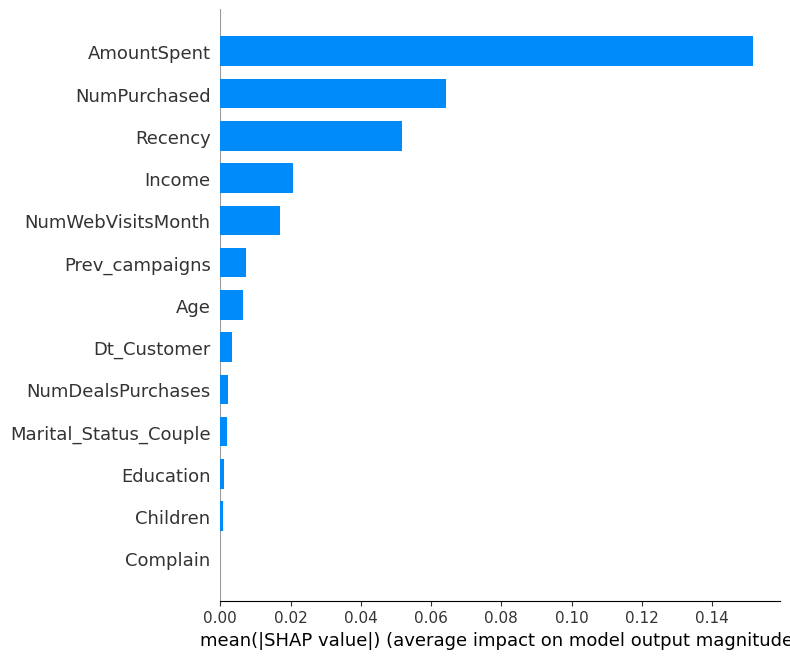

In [161]:
# SHAP variable importance for a Linear Model
shap.summary_plot(linear_shap_values, x_train, plot_type="bar")

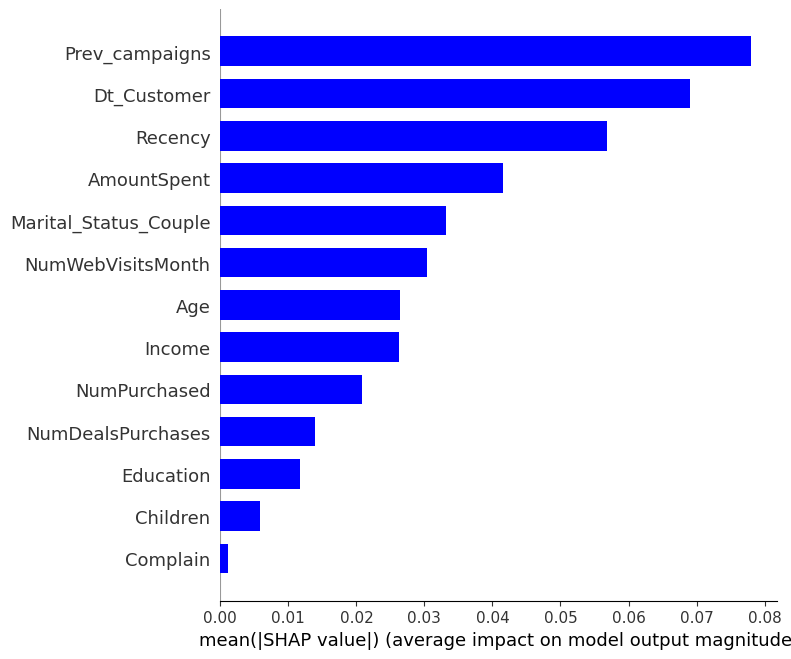

In [162]:
# SHAP variable importance for Tree based model
shap.summary_plot(tree_shap_values, x_train, plot_type="bar", color="blue")

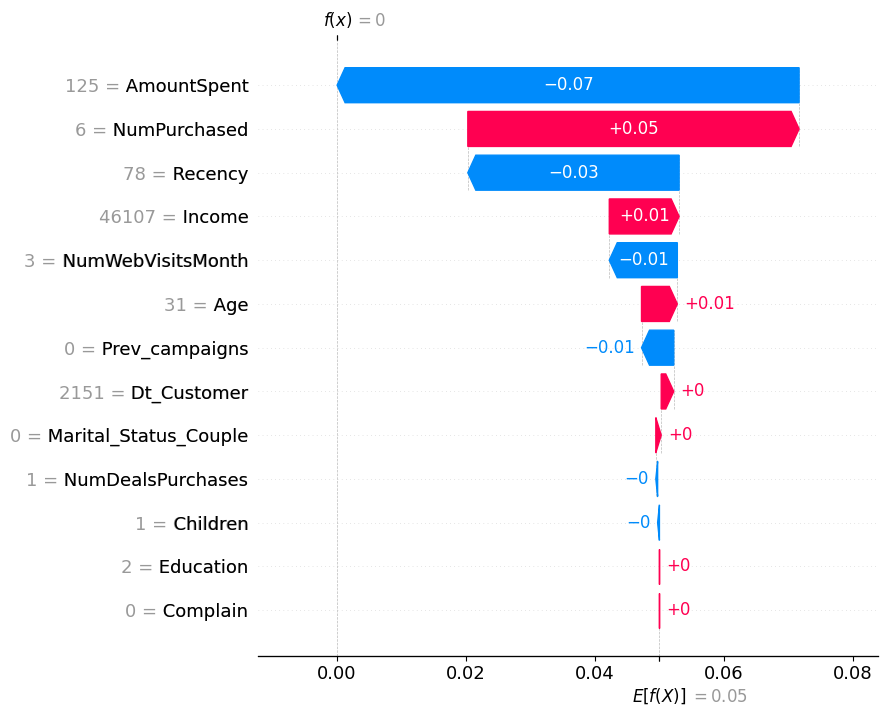

In [163]:
# Waterfall plot for linear model
shap.plots.waterfall(linear_shap_values[sample_ind], max_display=14)

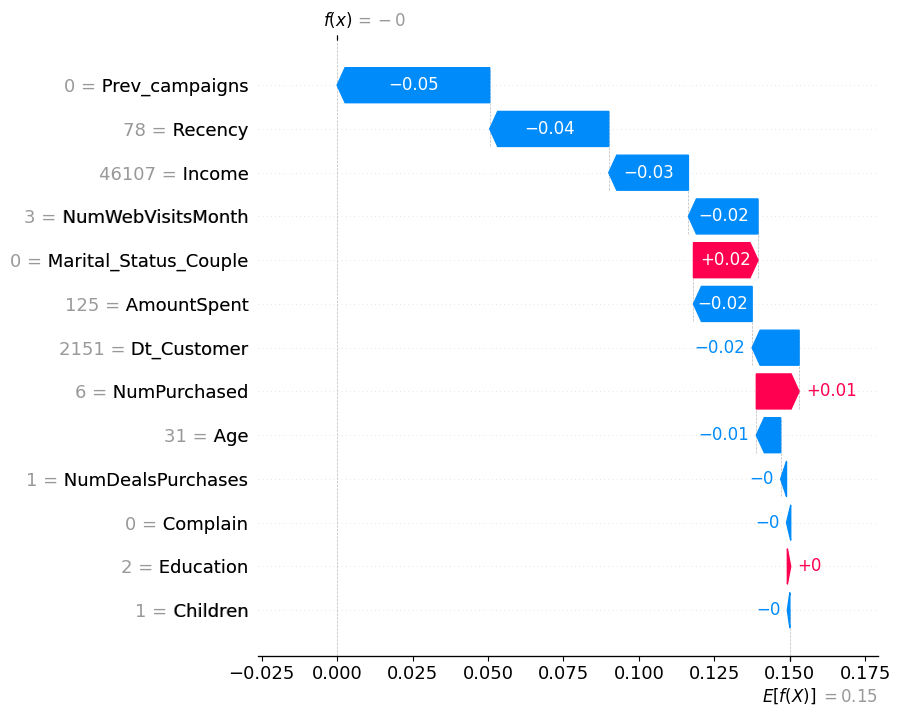

In [164]:
# Waterfall plot for Tree Based Model
shap.plots.waterfall(tree_shap_values[sample_ind], max_display=14)

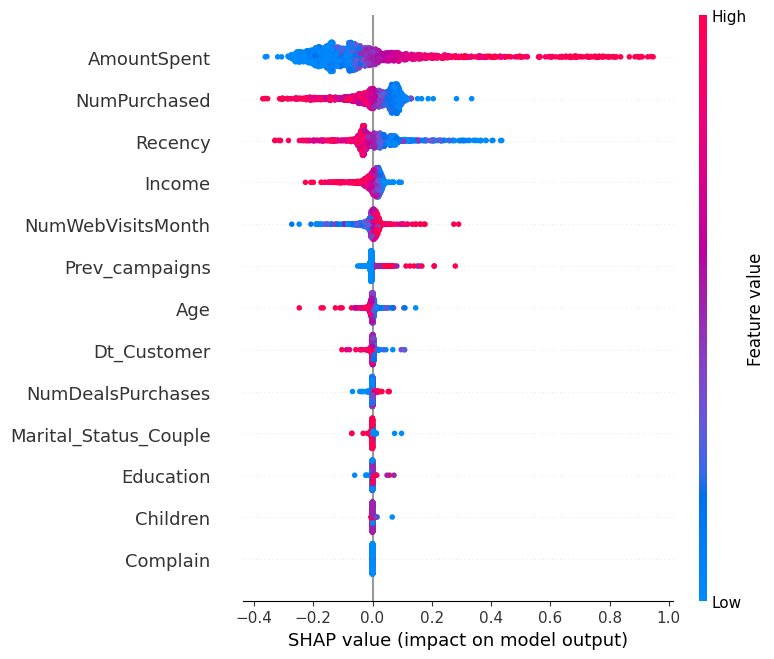

In [165]:
# SHAP summary for Linear Model
shap.summary_plot(linear_shap_values, x_train)

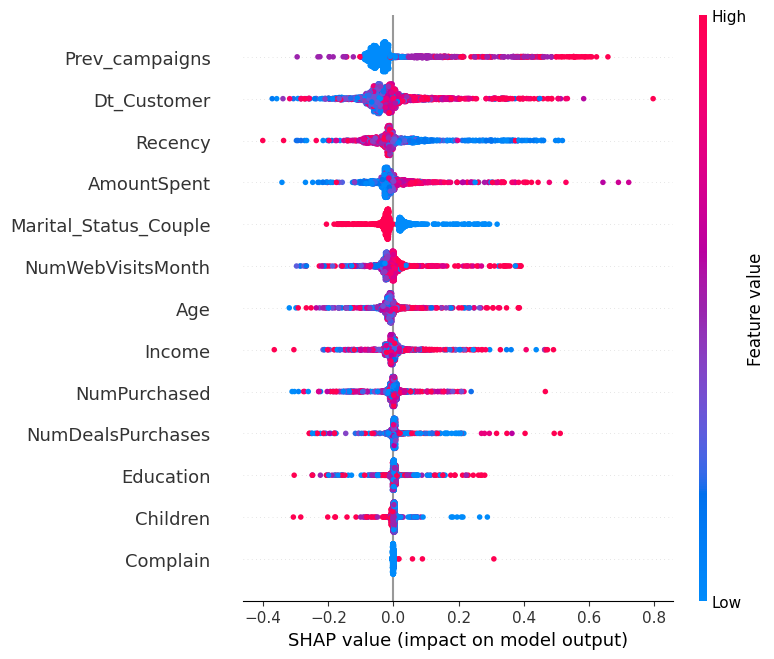

In [166]:
# SHAP summary for Tree Based Model
shap.summary_plot(tree_shap_values, x_train)

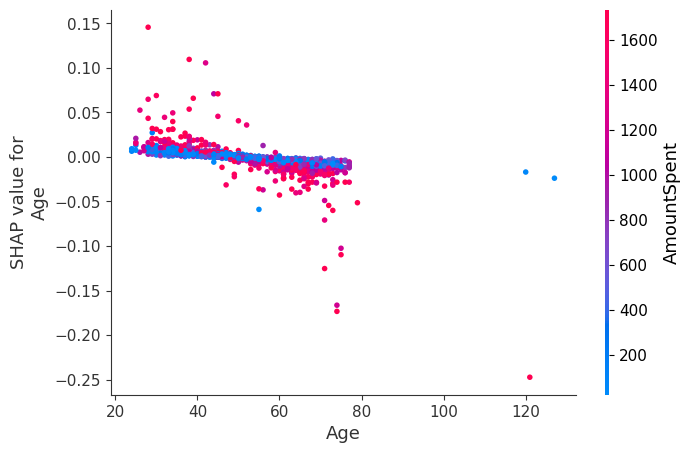

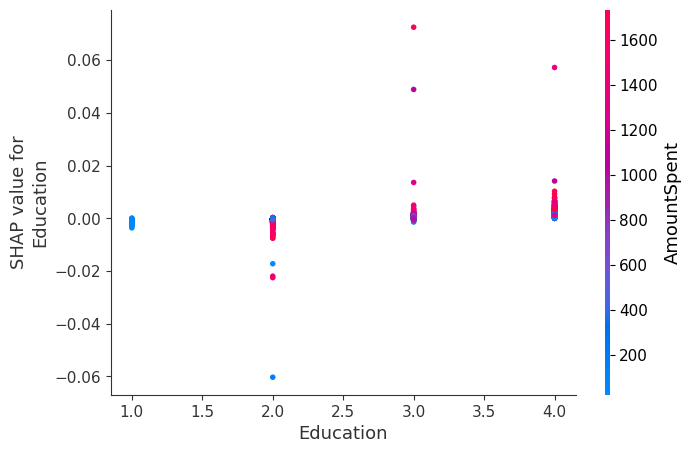

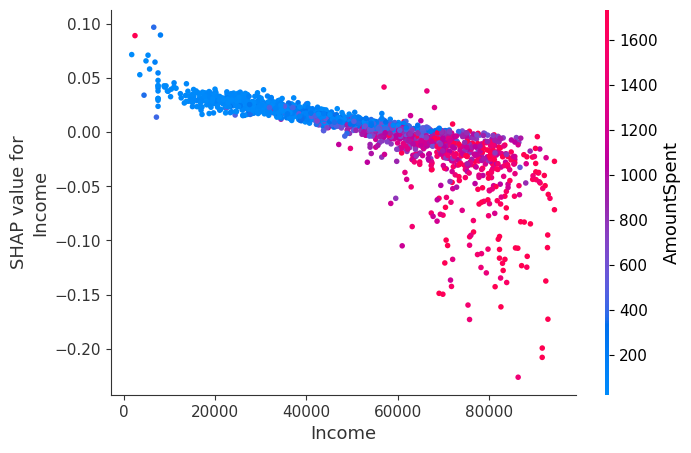

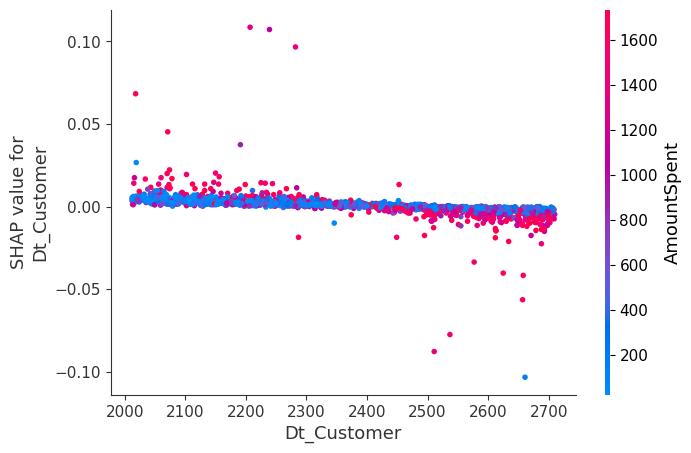

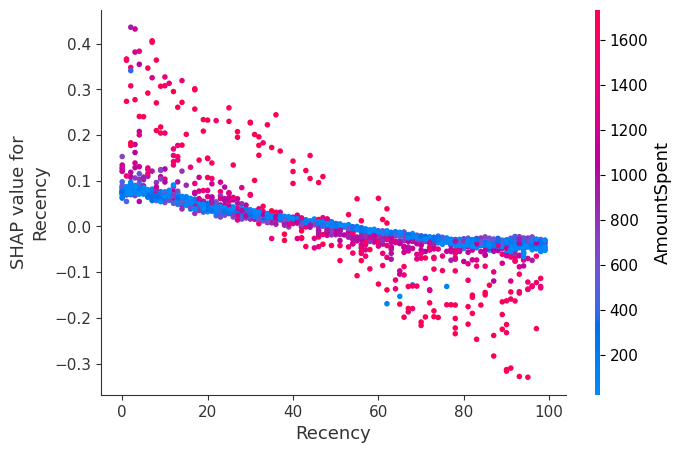

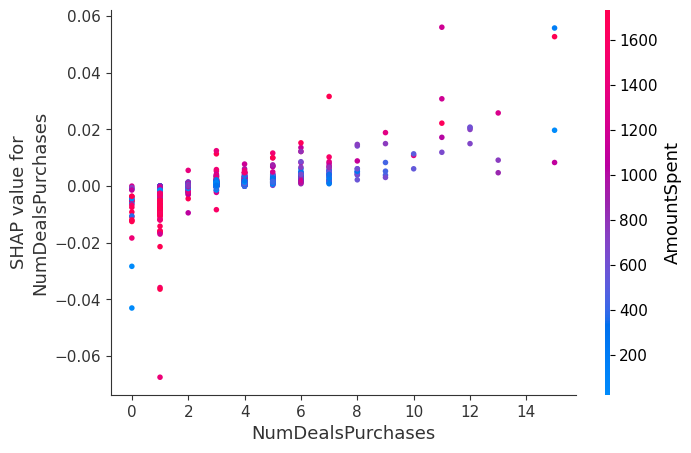

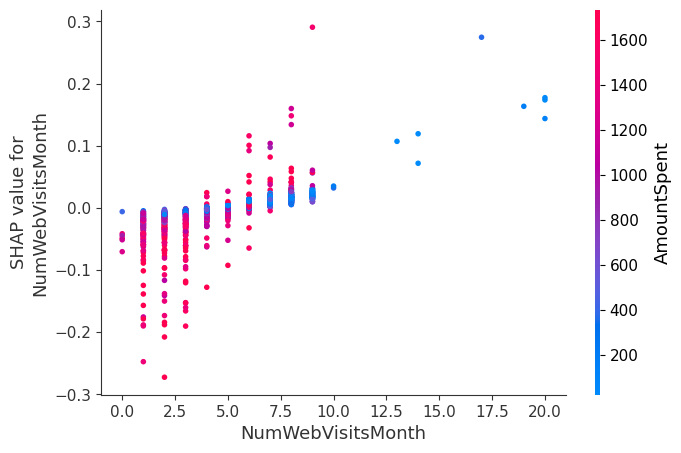

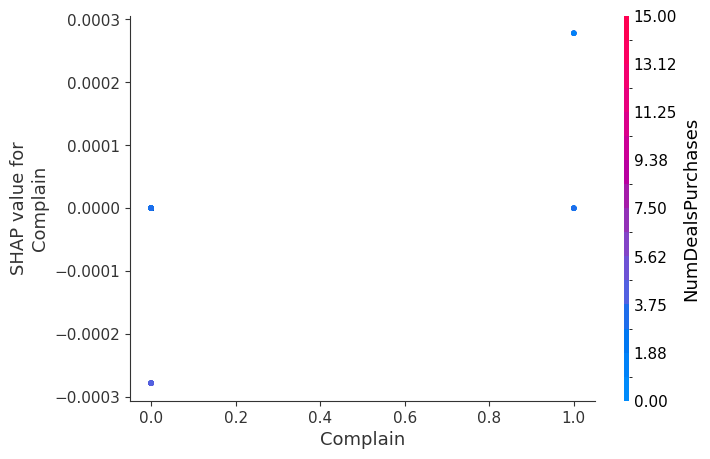

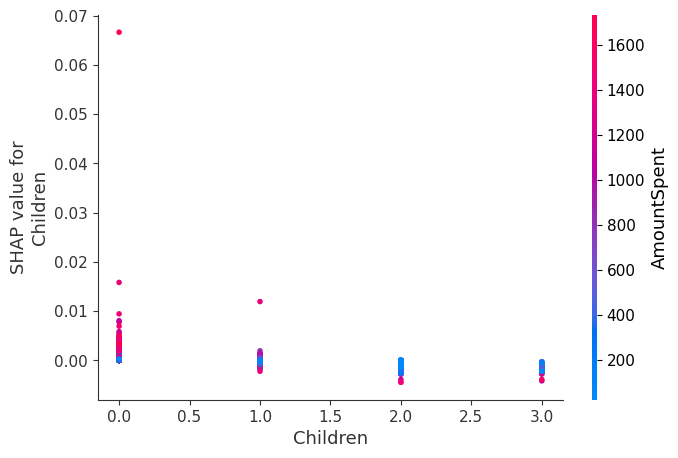

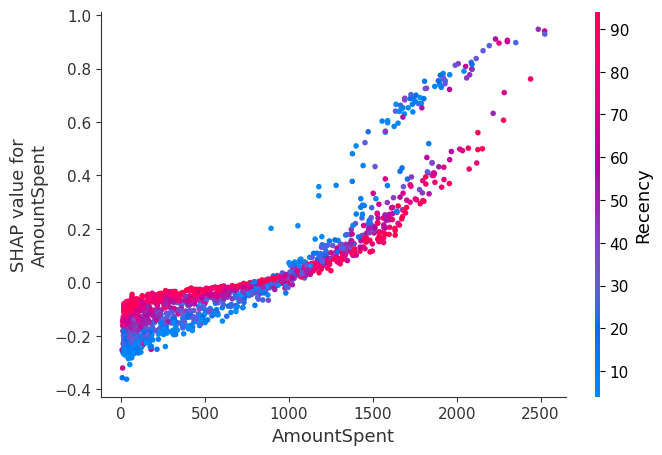

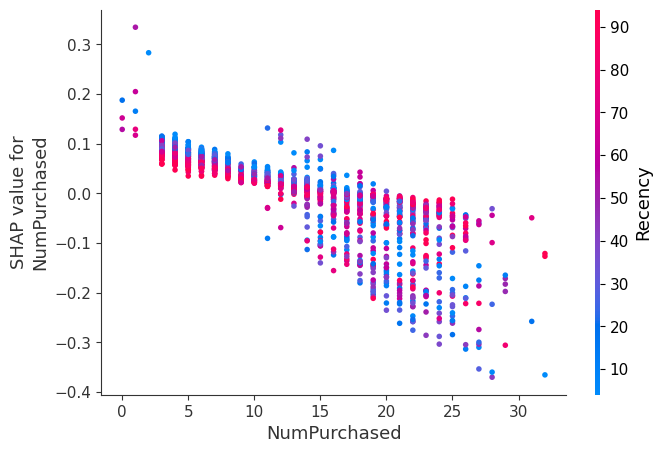

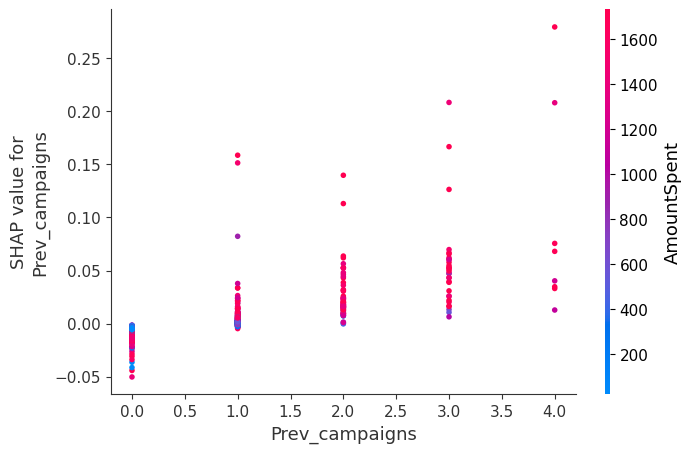

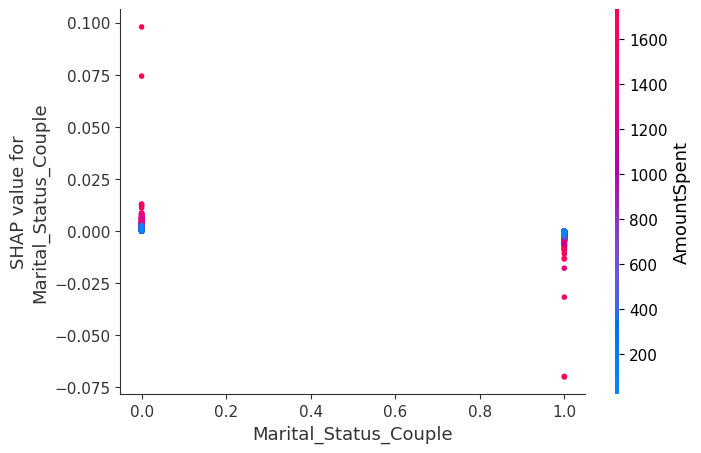

In [167]:
# SHAP partial dependence plot for linear model
for i in x_train.columns:
    shap.dependence_plot(i, linear_shap_values.values, x_train)

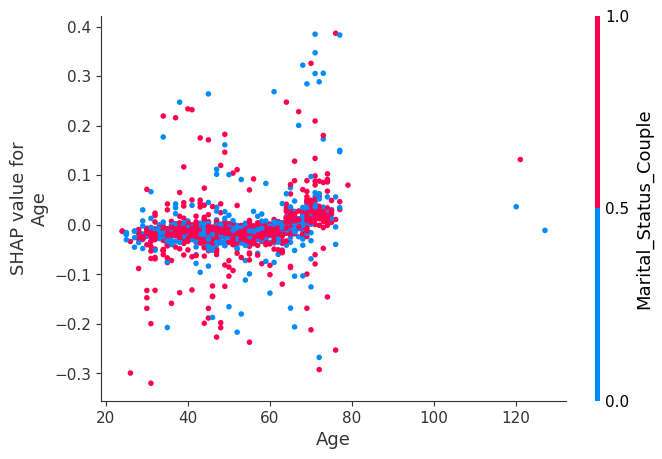

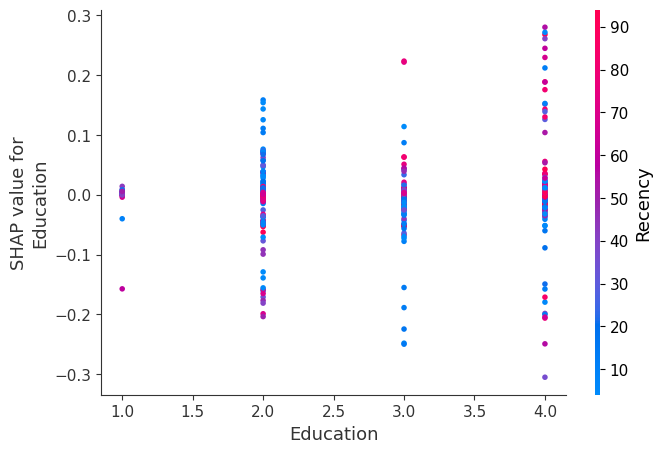

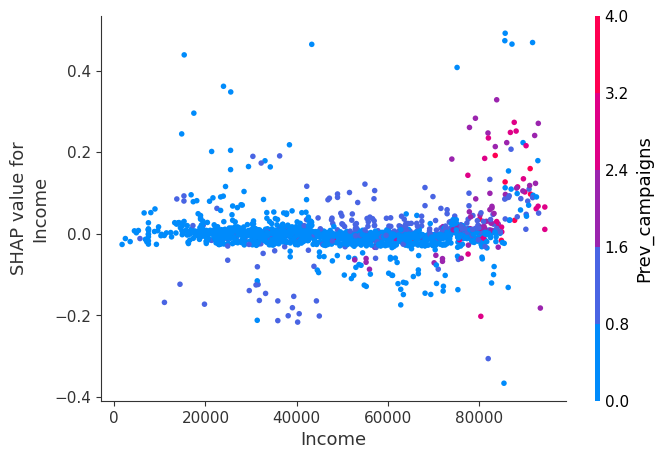

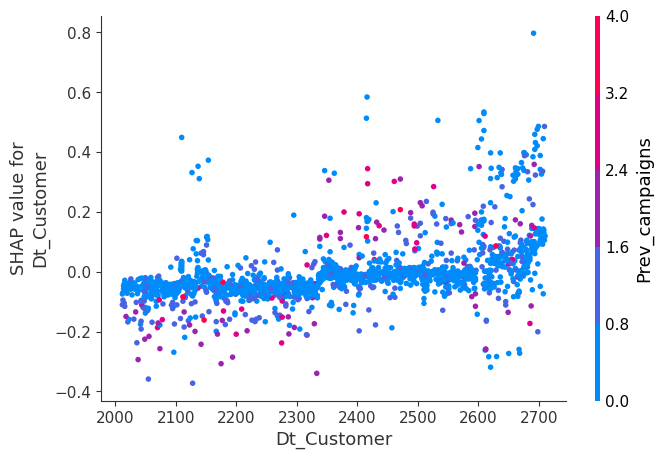

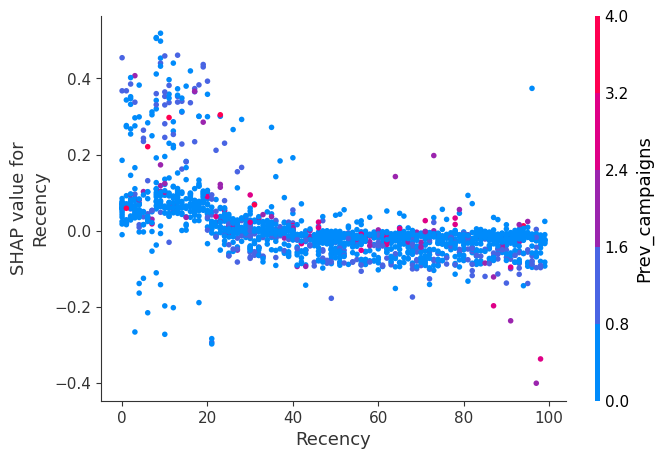

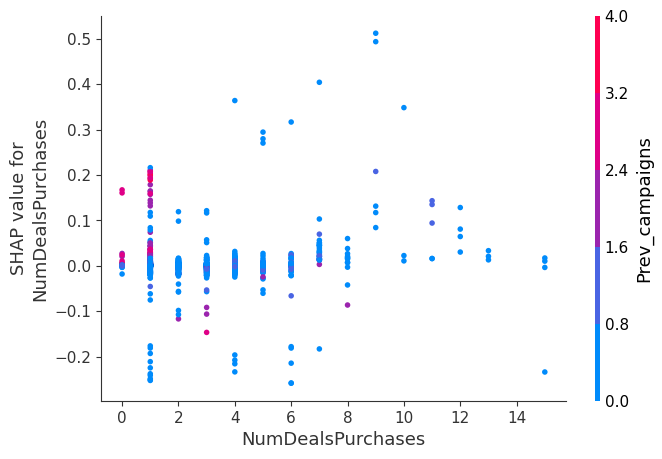

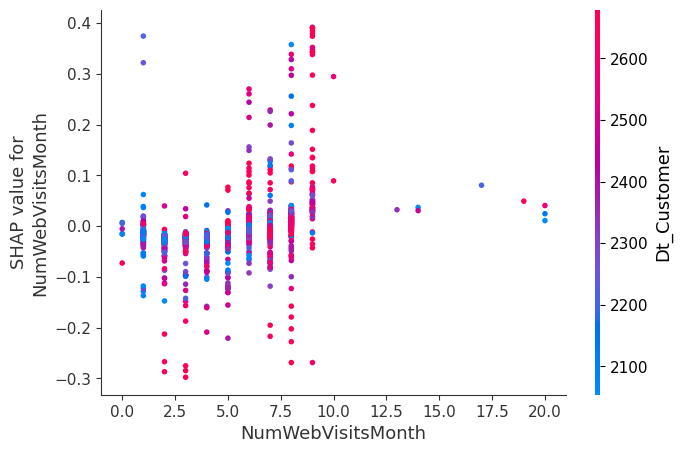

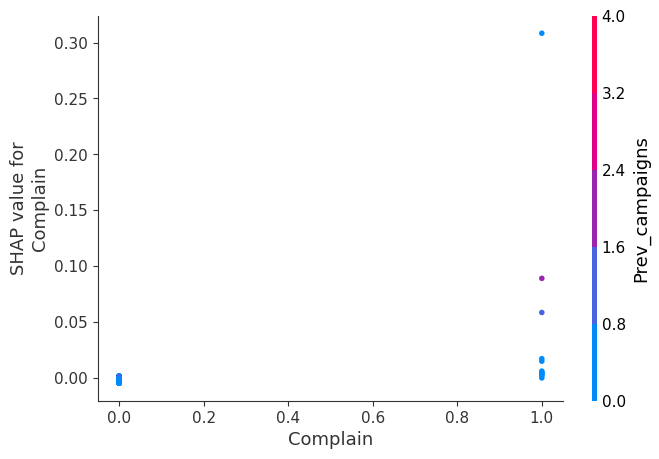

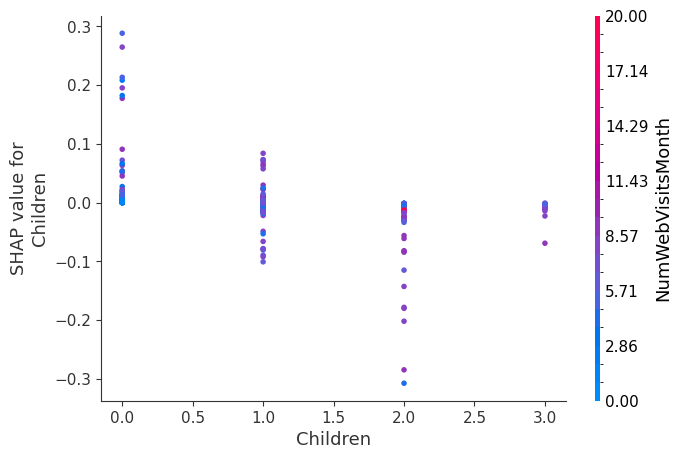

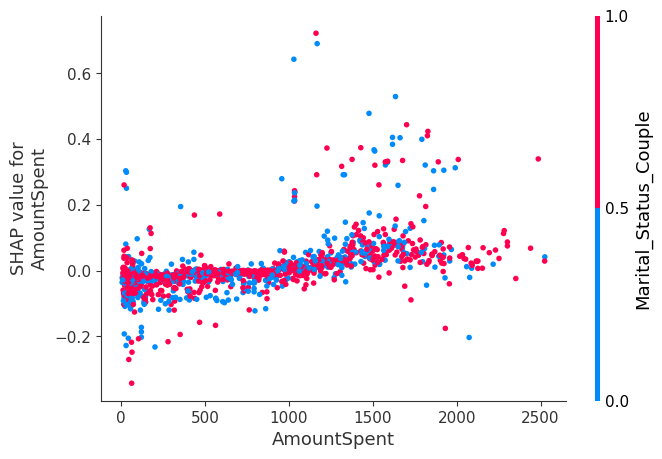

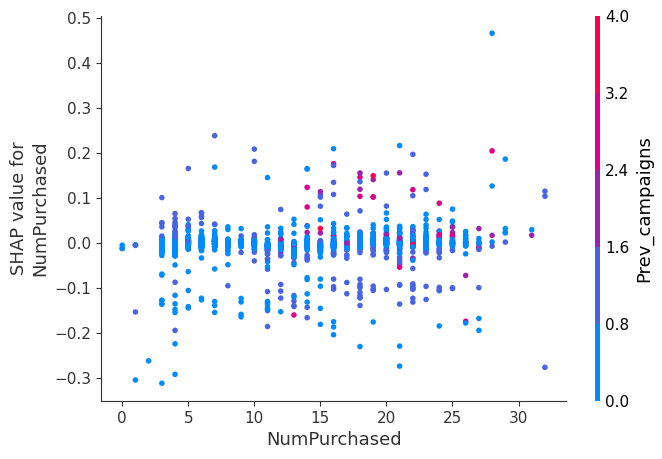

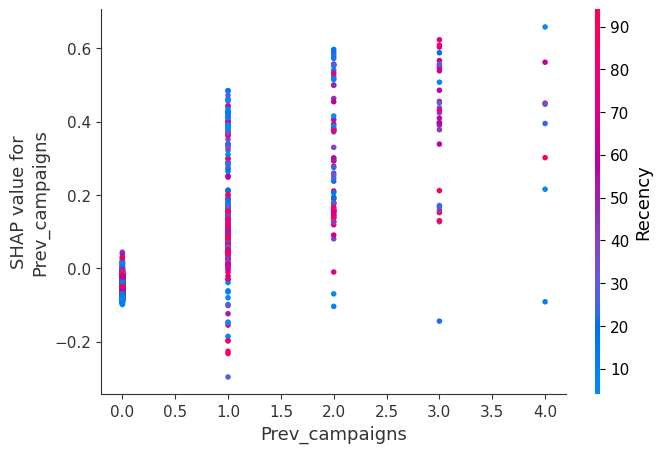

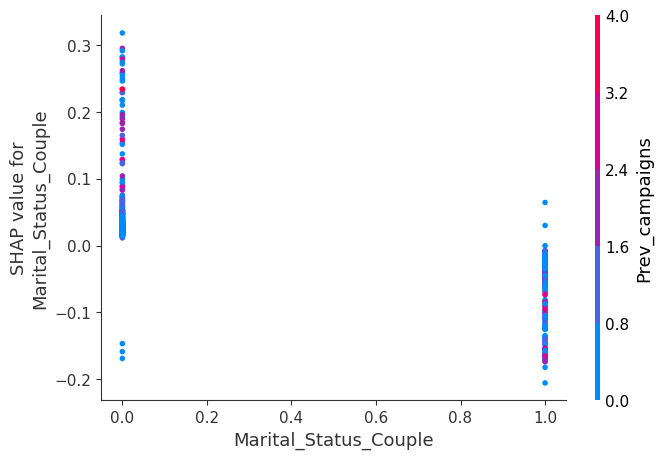

In [168]:
# SHAP partial dependence plot for a tree based model
for i in x_train.columns:
    shap.dependence_plot(i, tree_shap_values.values, x_train)

## Interpreting SHAP dependence plot for Linear and Tree-based model
The SHAP dependence plot shows the marginal effect one or two features have on the predicted outcome of a machine learning model. It tells whether the relationship between the target and a feature is linear, monotonic, or more complex. Let us interpret the linear and Tree-based models using the SHAP dependence plot.

The SHAP dependence plot shows the marginal effect one or two features have on the predicted outcome of a machine learning model. It tells whether the relationship between the target and a feature is linear, monotonic, or more complex. Let us interpret the linear and Tree-based models using the SHAP dependence plot.

Linear Model: Features: Amount Spent, Recency, Income a. Amount Spent:
Linear Dependency: In a linear model, a straight line on the SHAP dependence plot indicates a linear relationship. If the line slopes upwards, it suggests that as the amount spent increases, the prediction also increases linearly. The steeper the slope, the stronger the influence. b. Recency:

Linear Dependency: Similar to amount spent, if the plot for recency shows a straight line, it implies a linear relationship. A negative slope suggests that as recency decreases (i.e., time since last activity increases), the prediction decreases linearly. c. Income:

Linear Dependency: Again, a linear relationship with income would be represented by a straight line. A positive slope indicates that as income increases, the prediction also increases linearly. The key here is the linearity. If these relationships are linear, it means that a unit change in each feature corresponds to a consistent change in the prediction.

Tree-Based Model: Tree-based models, like Random Forests or Gradient Boosted Trees, can capture non-linear relationships and interactions between features. SHAP dependence plots for tree-based models might exhibit complex patterns.
a. Amount Spent:

Complex Dependency: Instead of a straight line, the SHAP dependence plot might show varying slopes or abrupt changes. This suggests that the relationship between amount spent and prediction is not linear. It could be influenced by interactions with other features or exhibit non-monotonic behavior.

b. Recency:

Complex Dependency: The plot might have multiple plateaus or irregular shapes, indicating that the relationship between recency and prediction is not straightforward. Tree-based models can capture interactions, so the influence of recency might depend on other features.

c. Income:

Complex Dependency: Similar to the other features, the SHAP plot for income may not follow a simple linear pattern. It could involve splits in the plot, indicating that the effect of income on prediction varies across different ranges or in conjunction with other features.

In tree-based models, the complexity arises from the combination of features in decision paths. Interpreting these plots involves understanding how different feature values contribute to the model's predictions. It's not just about the individual feature's effect but also about interactions between features.

In summary, while linear models assume a straightforward relationship between features and predictions, tree-based models allow for more complex and non-linear patterns. SHAP dependence plots help visualize these relationships and provide insights into how each feature contributes to the model's output.

# Partial Dependency Plot for Tree and Linear models

The below graph visualize partial dependence plots for marketing features using a logistic regression model. In the first section, necessary libraries are imported, including plot_partial_dependence from scikit-learn for generating partial dependence plots and matplotlib.pyplot for plotting. The core of the code involves calling plot_partial_dependence with the logistic regression model (logreg), the test data (x_test), and relevant parameters for parallel processing (n_jobs) and grid resolution (grid_resolution).

Following this, the code retrieves the current figure using plt.gcf(). Subsequently, it sets the title of the figure to "Partial dependence of Marketing Features" and adjusts the layout of subplots to enhance visual clarity. The plt.show() command then displays the figure containing the partial dependence plots.

In the final part of the code, the default figure size for subsequent plots is set to (32, 24) using plt.rcParams["figure.figsize"]. This ensures that future plots maintain a specified size. The overarching purpose of the code is to provide a visual representation of how individual marketing features influence the predicted outcome in the logistic regression model, aiding in the interpretation and understanding of feature contributions. It is important to substitute 'logreg' and 'x_test' with the relevant logistic regression model and test data for accurate execution.









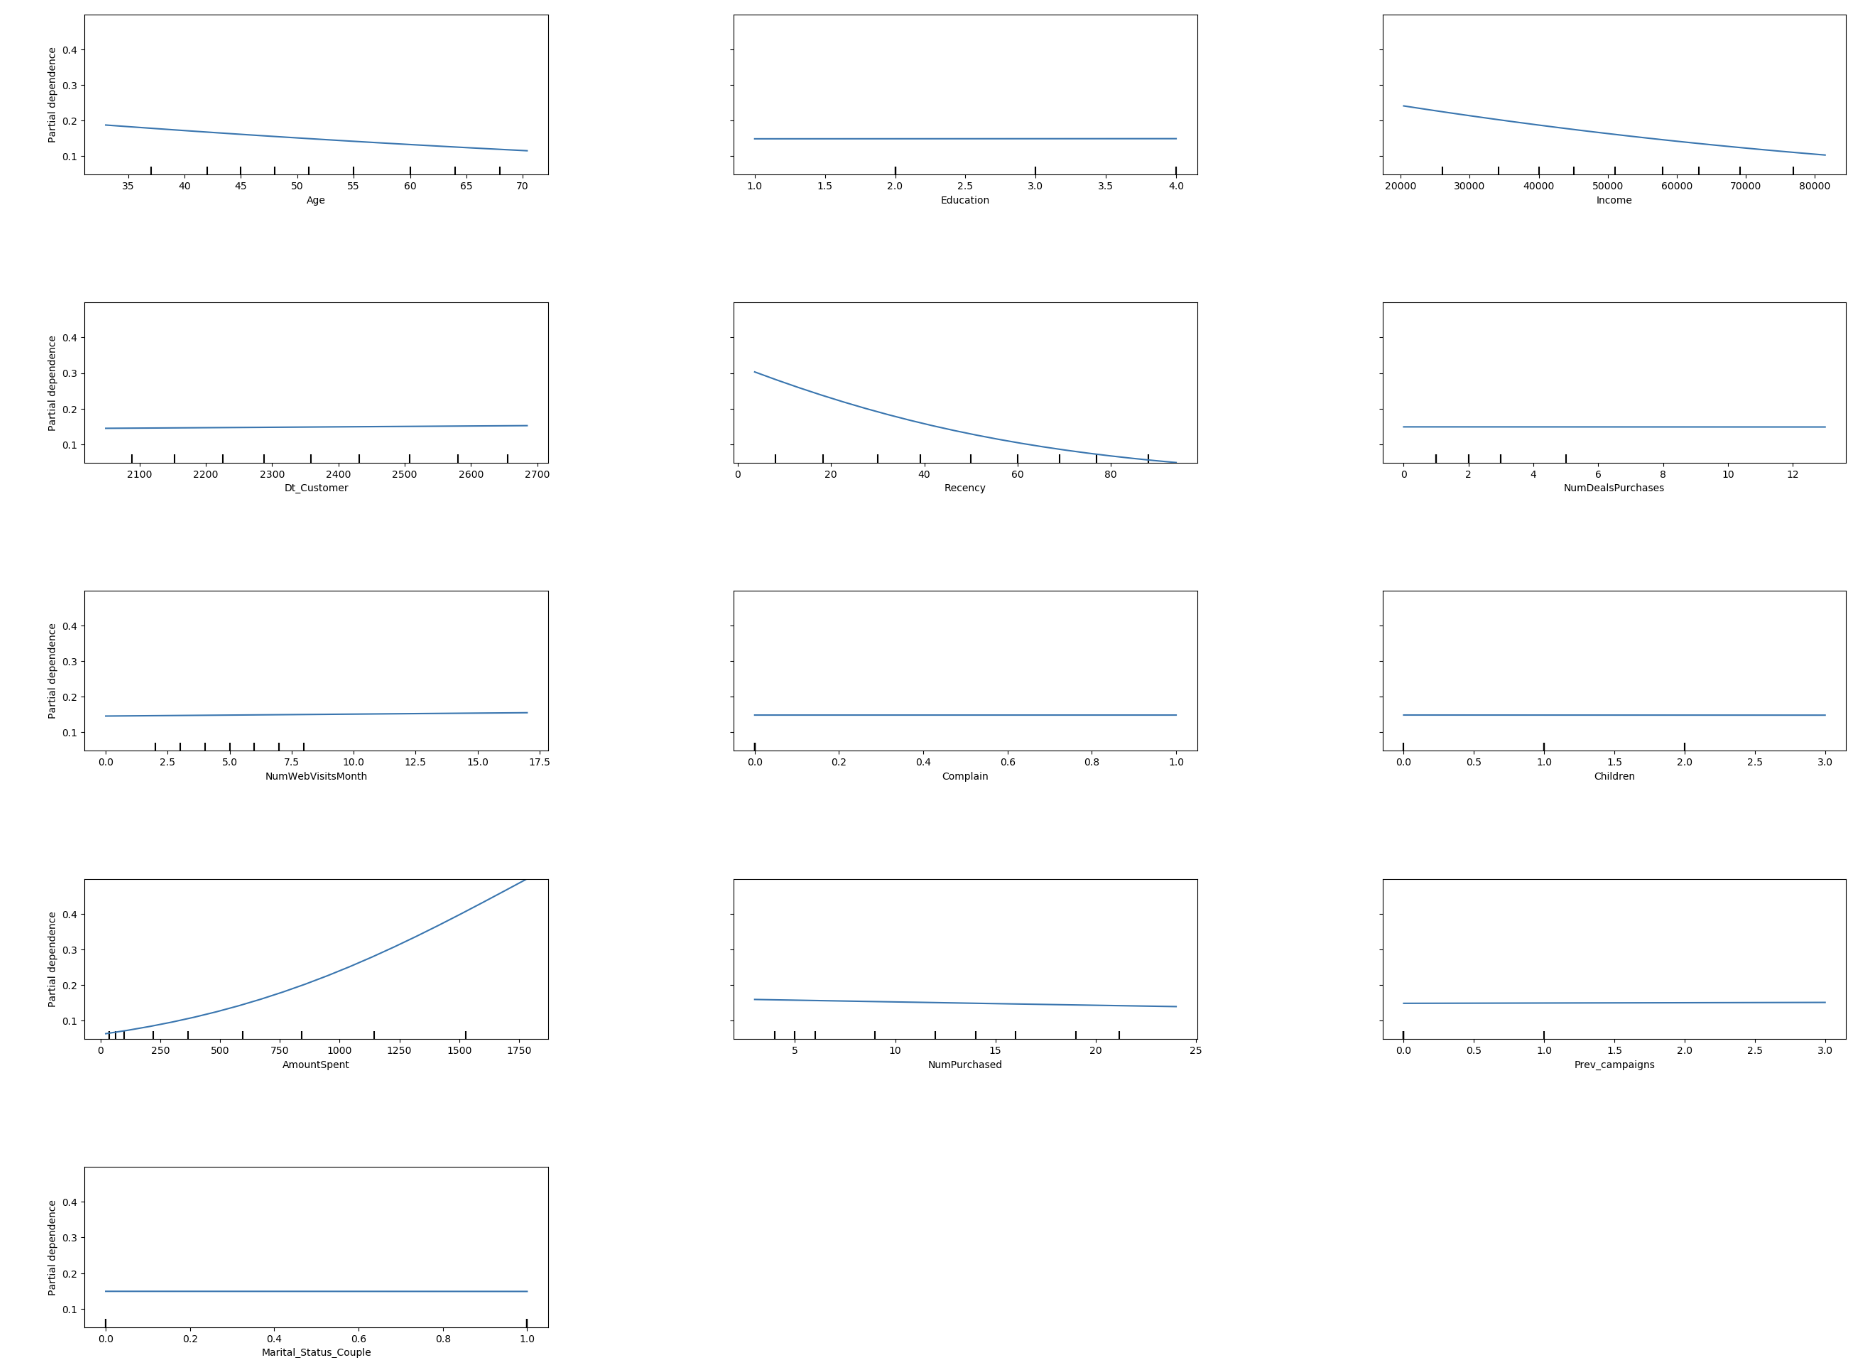

##Income, AmountSpent and Recency shows linear dependence which is similar to what to what we see in shap values

partial dependence plots for marketing features using a Decision Tree Classifier (dtc). These plots help understand how individual marketing features influence the predictions made by the model while holding other features constant. The code first generates the plots and then adjusts the figure for better presentation. Finally, it sets the default figure size for future plots. The main purpose is to visually interpret the impact of marketing features on the model's predictions. It's important to replace 'dtc' and 'x_test' with the appropriate Decision Tree model and test data for accurate results.


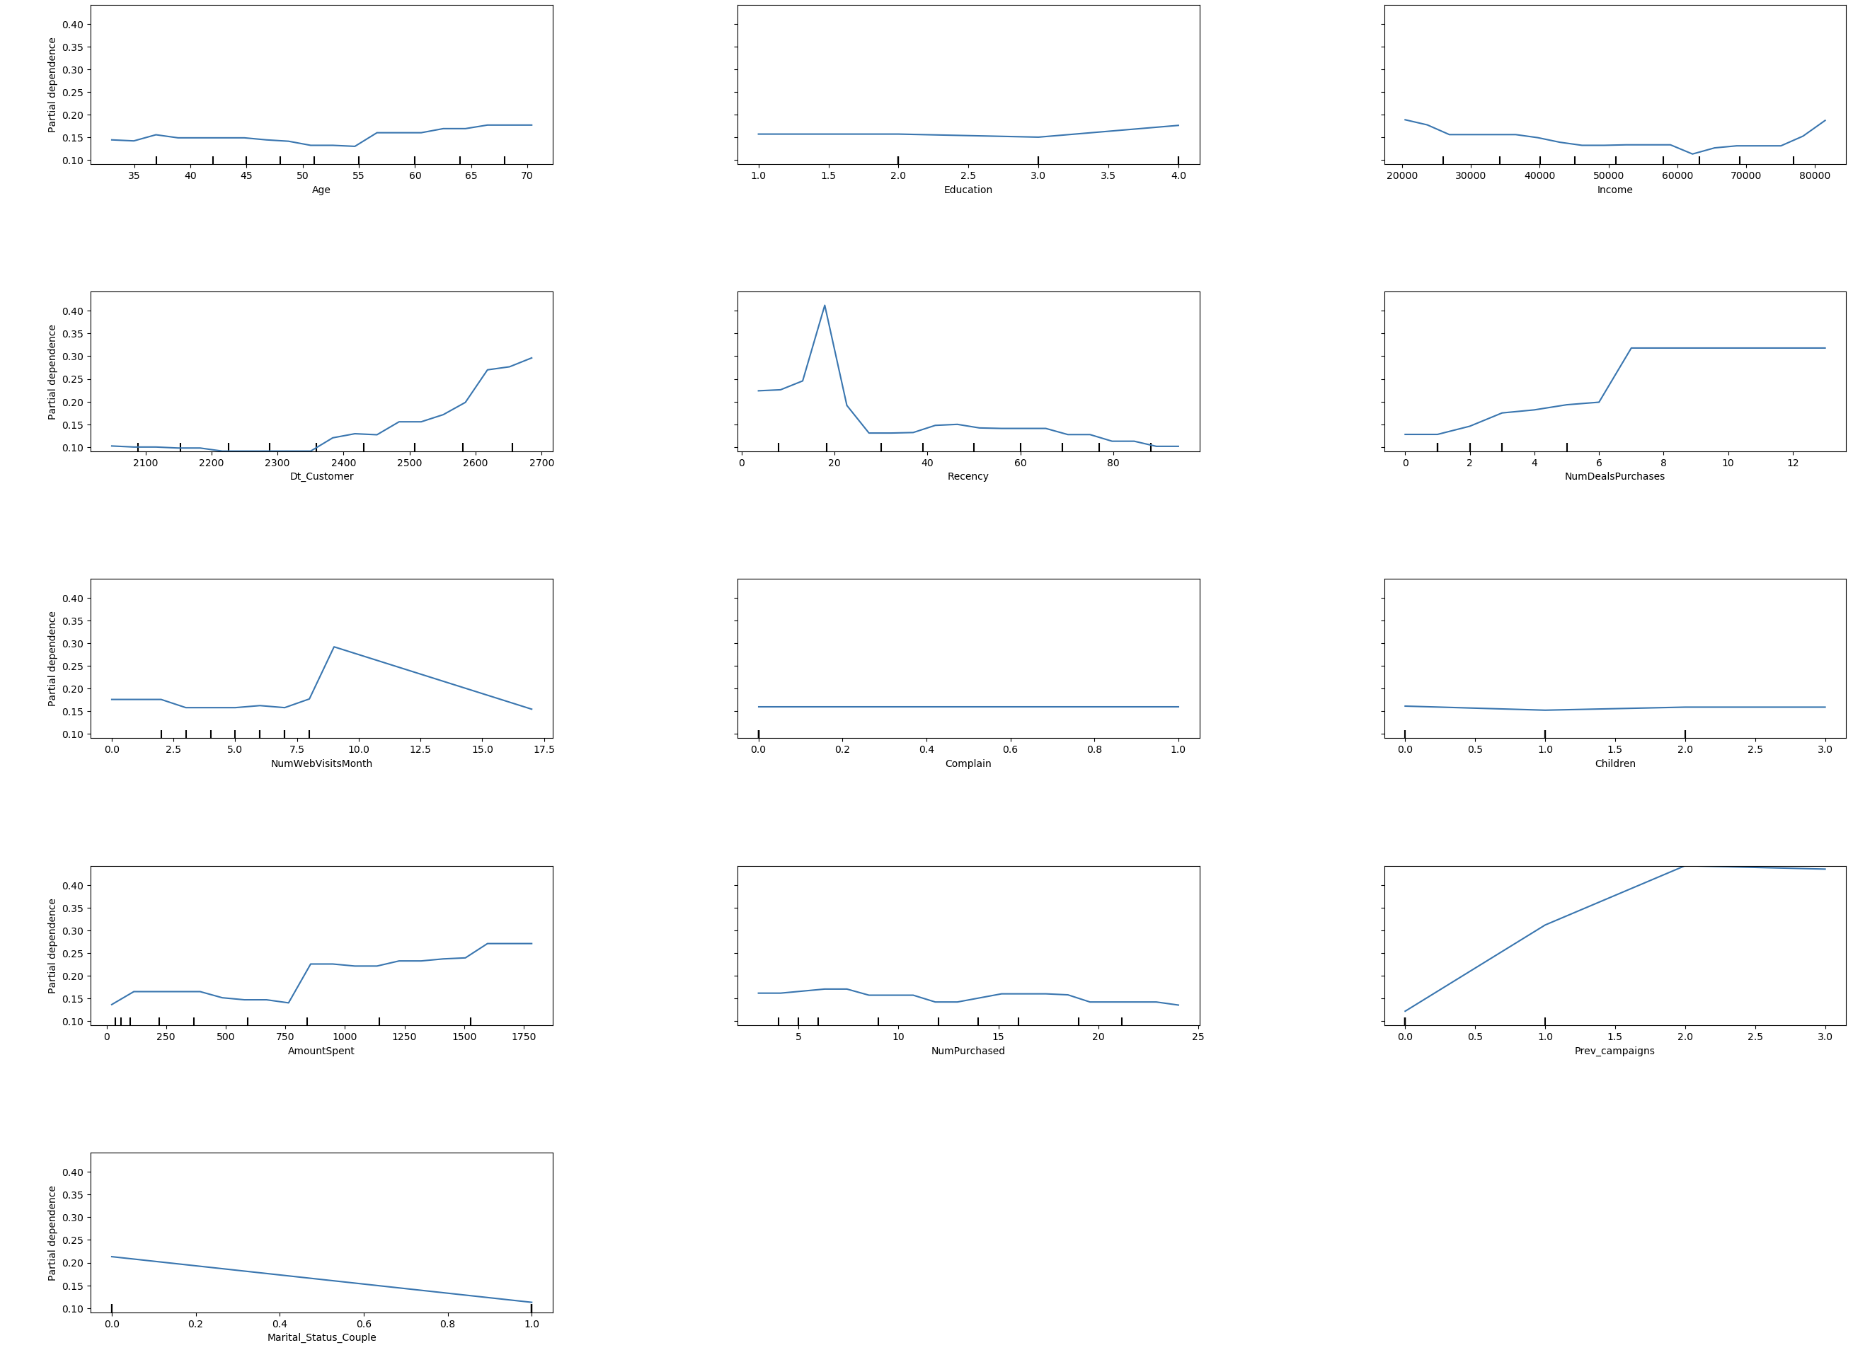

# Comparision between SHAP and Partial Dependence Plot Analysis
SHAP uses the black-box model to calculate the marginal contribution to the prediction for each feature and then relies on the theoretically sound game theory concept of Shapley values to calculate the feature importance. In this way

1. PDP gives the extent of effect a variable has on the output by freezing the rest of them
2. SHAP gives how much each variable contributes to the prediction

When choosing between SHAP (SHapley Additive exPlanations) and Partial Dependence Plots (PDP) for interpreting machine learning models, the decision hinges on the specific needs of the analysis and the trade-offs between model interpretability and complexity. PDPs offer a straightforward understanding of the extent to which a single variable affects the model's output by isolating its impact while keeping other variables constant. They are particularly suited for interpretable models but may struggle to capture complex relationships present in more sophisticated models. On the other hand, SHAP values provide a model-agnostic approach, offering insights into the contribution of each feature to individual predictions. This granularity is valuable for understanding interactions and non-linearities but comes at a higher computational cost. The decision should be guided by the balance between the desire for simplicity, the need to understand individual predictions, and the computational resources available. In practice, a thoughtful combination of both methods can provide a comprehensive and nuanced interpretation of machine learning model behavior.

# References
H20.ai- https://docs.h2o.ai/

OLS Model- http://net-informations.com/ds/mla/ols.html

Linear Regression- https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/

ChatGPT - https://chat.openai.com/chat

70% code is written by me with other 30% referenced and modified from various sources such as stackoverflow geeksforgeeks and ChatGPT

All code in this note is available as open source through the MIT license.

All text and images are free to use under the Creative Commons Attribution 3.0 license. https://creativecommons.org/licenses/by/3.0/us/

MIT License

Copyright (c) 2023 Venkata Sairam Mandapati

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.